**Table of Contents** <br>
* [1. Import libraries and datasets](#import)

* [2. Initial Exploration](#initialexploration)

* [3. Coherence Checking](#Coherence)

* [4. Split data](#Split)

* [5. Outliers Treatment](#outliers)
    * [5.1. Manual Limitation](#AutomaticLimitation)
    * [5.2. IQR](#IQR)
    * [5.3. 2-dimensional outliers](#2dim_outliers)

* [6. Missing values Treatment](#missings)

* [7. Scale the data](#scale)

* [8. Feature Engeneering](#FeatureEngeneering)

* [9. Redo outliers check](#redo-outliers)

* [10. Feature Selection](#FeatureSelection)
    * [10.1. Univariate Analysis](#univariate)
    * [10.2. Filter Methods](#filter)
        * [10.2.1 Correlation Matrix](#correlation)
        * [10.2.2 Chi-Squared](#chi-squared)
        * [10.2.3 ANOVA](#ANOVA)
    * [10.3. Wrapper methods](#warpper)
        * [10.3.1 RFE](#RFE)
        * [10.3.2 Forward Sequential Feature Selection](#forward)
        * [10.3.3 Backward Sequential Feature Selection](#backward)
    * [10.4. Embedded methods](#embedded)
        * [10.4.1 Ridge Regression](#ridge)
        * [10.4.2 Decision Tree for feature importance](#decision_tree_sel_feature)
        
* [11. Check for an imbalanced dataset](#imbalanced)
    * [11.1.  Adaptive Syntetic Oversampling](#Adaptive)
    
* [12. Modeling](#Modeling)
    * [12.1 Decision trees](#DT)
    * [12.2 Neural Network](#NN)
    * [12.3 Logistic Regression](#LR)
    * [12.4 KNN](#KNN)
    * [12.5 Support Vector Machine](#SVM)
    * [12.6 Ensemble models](#ENSEMBLE)
        * [12.6.1 Random Forest](#RF)
        * [12.6.2 Adaboost](#Adaboost)
        * [12.6.3 Gradiente Boosting](#GB)
        * [12.6.4 Voting Classifier](#VC)
        
[13. Model Comparison](#Model_comparison)

<hr>
<a class="anchor" id="import">
    
# 1. Import libraries and datasets
    
</a>

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import scipy.stats as stats
import datetime as dt
from matplotlib import pyplot
import seaborn as sns

from math import ceil

from numpy import mean,std
from numpy import arange
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
#from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from collections import OrderedDict

from imblearn.over_sampling import SMOTENC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_confusion_matrix

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from operator import itemgetter

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

import time

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score

import datetime
from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#!pip install imblearn

In [4]:
#!pip install metrics


In [5]:
#!pip install seaborn

In [6]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

<hr>
<a class="anchor" id="initialexploration">
    
# 2. Initial Exploration
    
</a>

In [7]:
df.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
3,103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
4,103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1


In [8]:
df.describe()

,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Buy
count,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.519728e+08,2.324232,81.205854,0.508051,34.559101,31.685869,1199.769430,0.022305,0.043181,5.963120,2.352535,3.957496,0.155216
std,2.024990e+08,3.340676,179.715545,1.279390,139.796989,44.550277,1958.276304,0.048776,0.048845,18.753626,1.715698,3.675159,0.362128
min,1.028633e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.731950e+08,0.000000,0.000000,0.000000,0.000000,7.000000,183.562500,0.000000,0.014300,0.000000,2.000000,2.000000,0.000000
50%,4.536169e+08,1.000000,7.500000,0.000000,0.000000,18.000000,599.000000,0.003200,0.025100,0.000000,2.000000,2.000000,0.000000
75%,6.259756e+08,4.000000,92.208350,0.000000,0.000000,38.000000,1470.270800,0.016800,0.050000,0.000000,2.000000,4.000000,0.000000
max,7.984440e+08,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522200,0.200000,0.200000,361.763700,13.000000,15.000000,1.000000


<AxesSubplot:>

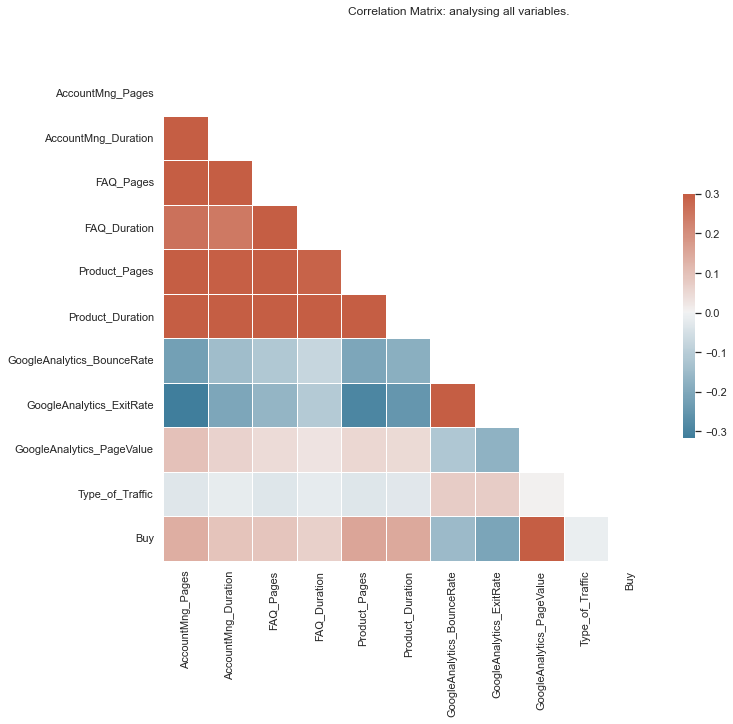

In [9]:
sns.set_theme(style="white")
%matplotlib inline

# Generate a large random dataset
rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),columns=list(ascii_letters[26:]))

# Compute the correlation matrix
f = ['AccountMng_Pages','AccountMng_Duration','FAQ_Pages','FAQ_Duration','Product_Pages','Product_Duration','GoogleAnalytics_BounceRate','GoogleAnalytics_ExitRate','GoogleAnalytics_PageValue'
          ,'Type_of_Traffic','Buy']
corr = df[f].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

title = "Correlation Matrix: analysing all variables."
plt.suptitle(title)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig(os.path.join('../techscape-ecommerce/figures', 'correlation1'), dpi=200)

KeyboardInterrupt: 

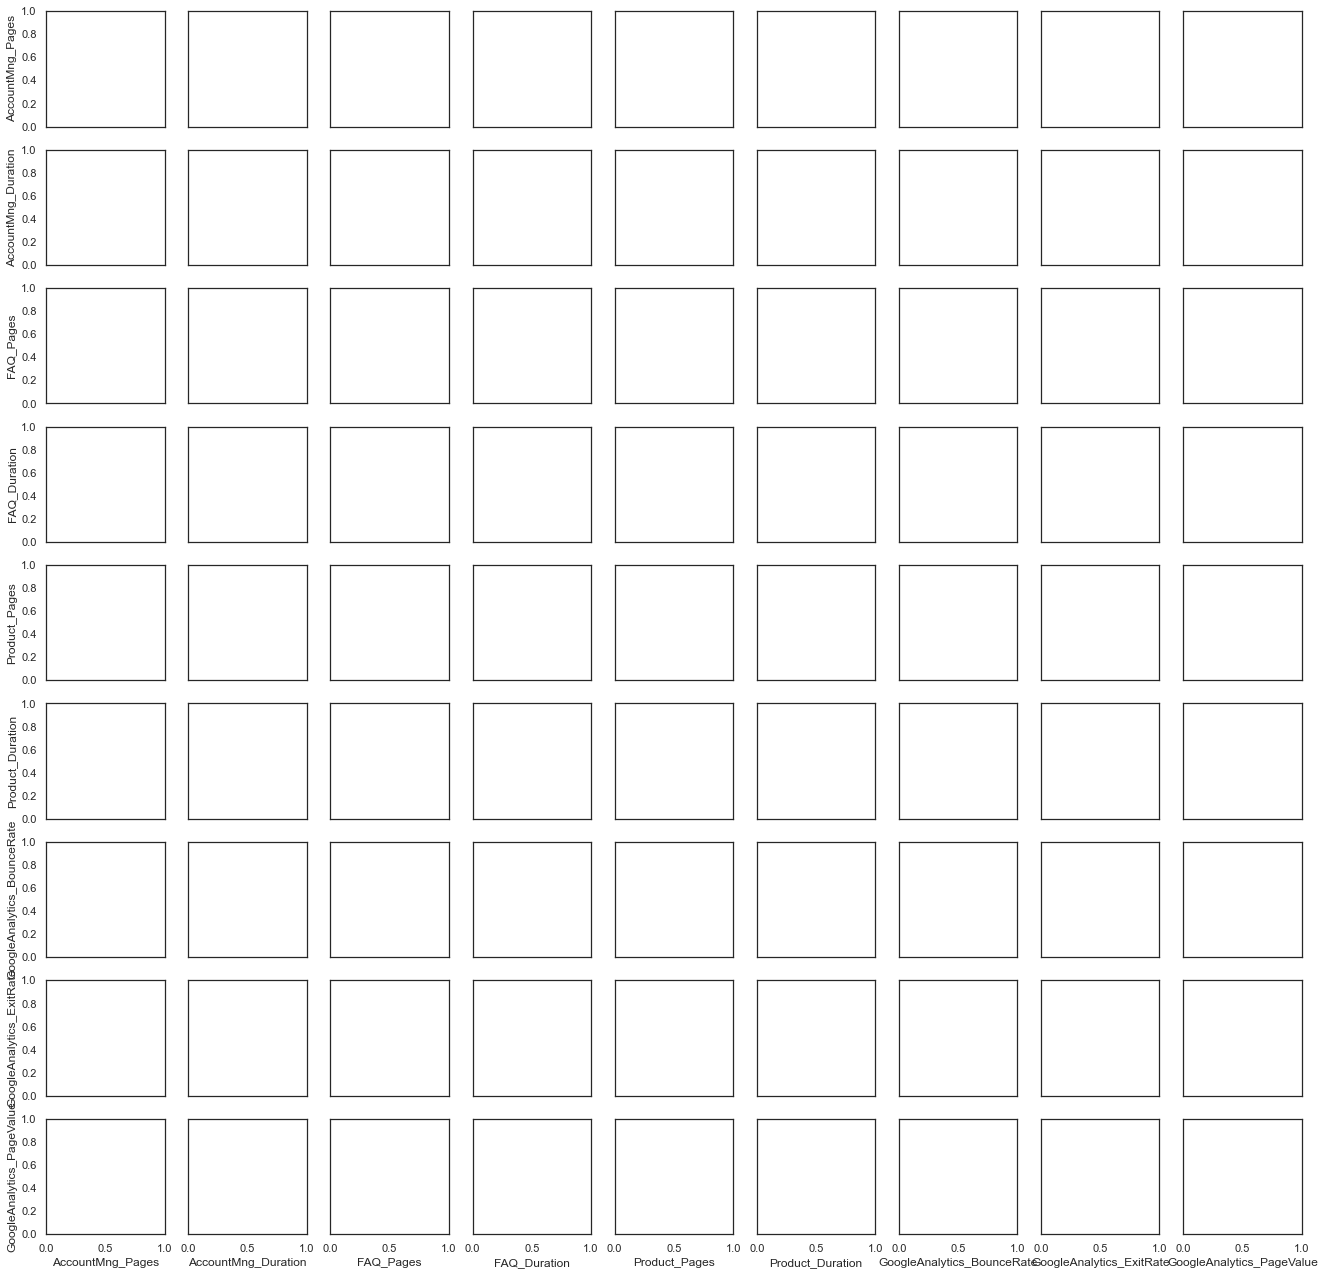

In [10]:
# Pairwise Relationship of Numerical Variables
import os

sns.set_theme(style="white")
# Setting pairplot

sns.pairplot(df[['AccountMng_Pages','AccountMng_Duration','FAQ_Pages','FAQ_Duration','Product_Pages','Product_Duration','GoogleAnalytics_BounceRate','GoogleAnalytics_ExitRate','GoogleAnalytics_PageValue','Buy']], diag_kind="hist", hue = 'Buy' )

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables with Buy", fontsize=20)
plt.savefig(os.path.join('../techscape-ecommerce/figures', 'pairwise'), dpi=200)


plt.show()

Text(0.5, 0.98, 'Scatter matrix plot: analysing most correlated variables')

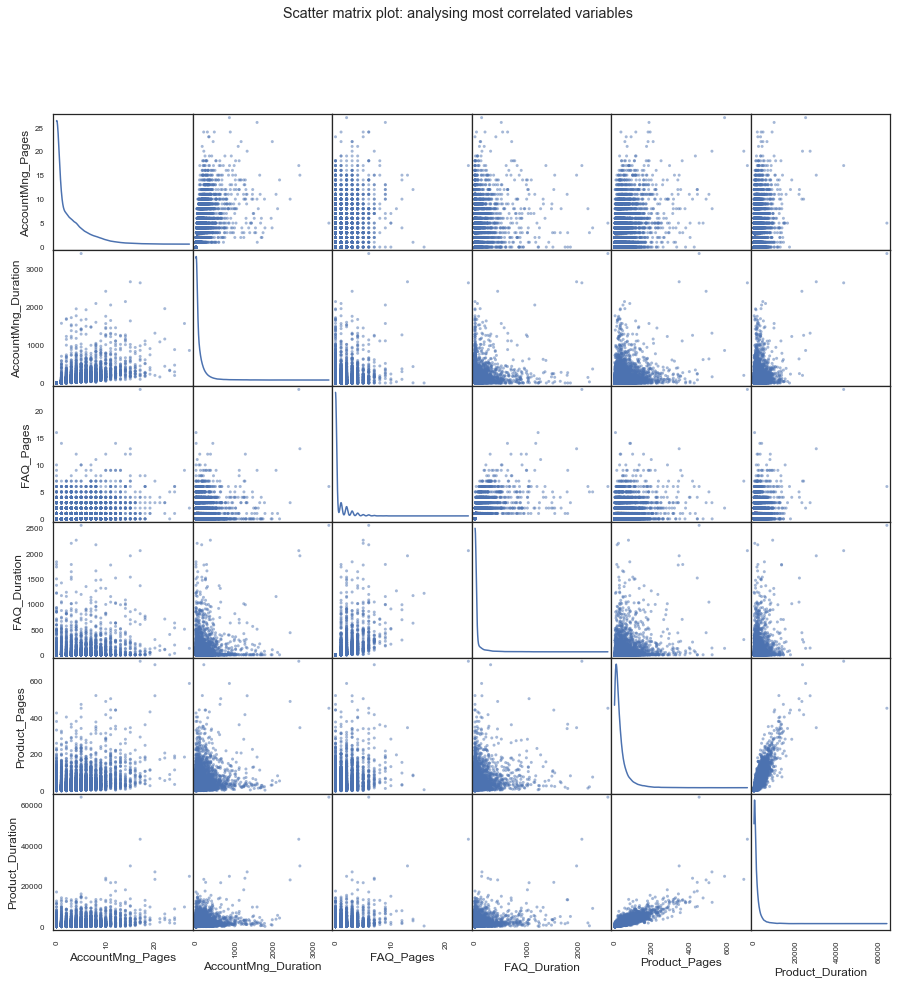

In [ ]:

sns.set_theme(style="white")
pd.plotting.scatter_matrix(df[['AccountMng_Pages','AccountMng_Duration','FAQ_Pages','FAQ_Duration','Product_Pages','Product_Duration']], figsize=(15, 15), diagonal="kde");
title = 'Scatter matrix plot: analysing most correlated variables'
plt.suptitle(title)
plt.savefig(os.path.join('../techscape-ecommerce/figures', 'scatter_correlated'), dpi=200)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

In [12]:
df.isna().sum()

Access_ID                     0
Date                          0
AccountMng_Pages              0
AccountMng_Duration           0
FAQ_Pages                     0
FAQ_Duration                  0
Product_Pages                 0
Product_Duration              0
GoogleAnalytics_BounceRate    0
GoogleAnalytics_ExitRate      0
GoogleAnalytics_PageValue     0
OS                            0
Browser                       0
Country                       0
Type_of_Traffic               0
Type_of_Visitor               0
Buy                           0
dtype: int64

In [13]:
#techScapeReport = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#techScapeReport.to_notebook_iframe()

## Data Preparation

### Access_ID

<b>Unique identification of the user access to the website
* The Access_ID variable is 100% distinct across all records, hence we can use it as an index.

In [14]:
df = df.set_index(["Access_ID"])
test = test.set_index(["Access_ID"])

### Date

<b>Website visit date

* For practicality it was decided to convert the date variable to a datetime object

In [15]:
df

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
Access_ID,,,,,,,,,,,,,,,,
102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798279589,8-May-20,3,159.0,2,55.5,23,1100.1250,0.0000,0.0111,0.0000,MacOSX,2,Brazil,14,Returner,0
798314158,17-Jul-20,6,175.1,0,0.0,3,27.6000,0.0000,0.0111,0.0000,Windows,10,Spain,5,New_Access,0
798339820,23-Mar-20,0,0.0,0,0.0,27,644.0000,0.0077,0.0519,0.0000,MacOSX,2,France,3,Returner,0


In [16]:
df["Date"] = pd.to_datetime(df["Date"], format = "%d-%b-%y")
test["Date"] = pd.to_datetime(test["Date"], format = "%d-%b-%y")

In [17]:
# Checking datatypes
df.dtypes

Date                          datetime64[ns]
AccountMng_Pages                       int64
AccountMng_Duration                  float64
FAQ_Pages                              int64
FAQ_Duration                         float64
Product_Pages                          int64
Product_Duration                     float64
GoogleAnalytics_BounceRate           float64
GoogleAnalytics_ExitRate             float64
GoogleAnalytics_PageValue            float64
OS                                    object
Browser                                int64
Country                               object
Type_of_Traffic                        int64
Type_of_Visitor                       object
Buy                                    int64
dtype: object

In [18]:
def conversion_type(df):

    df['AccountMng_Pages']=df['AccountMng_Pages'].astype(pd.Int32Dtype())
    df['AccountMng_Duration']=df['AccountMng_Duration'].astype(pd.Float32Dtype())
    df['FAQ_Pages']=df['FAQ_Pages'].astype(pd.Int32Dtype())
    df['FAQ_Duration']=df['FAQ_Duration'].astype(pd.Float32Dtype())
    df['Product_Pages']=df['Product_Pages'].astype(pd.Int32Dtype())
    df['Product_Duration']=df['Product_Duration'].astype(pd.Float32Dtype())
    df['GoogleAnalytics_BounceRate']=df['GoogleAnalytics_BounceRate'].astype(pd.Float32Dtype())
    df['GoogleAnalytics_ExitRate']=df['GoogleAnalytics_ExitRate'].astype(pd.Float32Dtype())
    df['GoogleAnalytics_PageValue']=df['GoogleAnalytics_PageValue'].astype(pd.Float32Dtype())
    df['OS']=df['OS'].astype(pd.StringDtype())
    df['Browser']=df['Browser'].astype(pd.Int32Dtype())
    df['Country']=df['Country'].astype(pd.StringDtype())
    df['Type_of_Traffic']=df['Type_of_Traffic'].astype(pd.Int32Dtype())
    df['Type_of_Visitor']=df['Type_of_Visitor'].astype(pd.StringDtype())
    


In [19]:
conversion_type(df)
conversion_type(test)
df['Buy']=df['Buy'].astype(pd.Int32Dtype())

In [20]:
df.dtypes

Date                          datetime64[ns]
AccountMng_Pages                       Int32
AccountMng_Duration                  Float32
FAQ_Pages                              Int32
FAQ_Duration                         Float32
Product_Pages                          Int32
Product_Duration                     Float32
GoogleAnalytics_BounceRate           Float32
GoogleAnalytics_ExitRate             Float32
GoogleAnalytics_PageValue            Float32
OS                                    string
Browser                                Int32
Country                               string
Type_of_Traffic                        Int32
Type_of_Visitor                       string
Buy                                    Int32
dtype: object

<hr>
<a class="anchor" id="Coherence">
    
# 3. Coherence Checking
    
</a>

In [21]:
df

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
Access_ID,,,,,,,,,,,,,,,,
102863333,2020-03-21,0,0.0,0,0.0,3,64.0,0.0,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0
103117814,2020-05-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0
103201891,2020-12-04,0,0.0,0,0.0,8,95.0,0.025,0.0583,0.0,Windows,4,Italy,1,Returner,0
103226087,2020-12-22,0,0.0,0,0.0,9,608.75,0.0,0.025,42.422501,Windows,2,United Kingdom,2,Returner,1
103234445,2020-11-24,0,0.0,2,386.0,36,1609.939697,0.0,0.0093,12.5033,Windows,2,Spain,3,Returner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798279589,2020-05-08,3,159.0,2,55.5,23,1100.125,0.0,0.0111,0.0,MacOSX,2,Brazil,14,Returner,0
798314158,2020-07-17,6,175.100006,0,0.0,3,27.6,0.0,0.0111,0.0,Windows,10,Spain,5,New_Access,0
798339820,2020-03-23,0,0.0,0,0.0,27,644.0,0.0077,0.0519,0.0,MacOSX,2,France,3,Returner,0


In [22]:
# confirming that the first and last day of every month is correct
df['day']=df['Date'].dt.day
df.groupby(df['Date'].dt.month).agg(['min', 'max'])['day']

,min,max
Date,,
2,1,29
3,1,31
5,1,31
6,1,30
7,1,31
8,1,31
9,1,30
10,1,31
11,1,30


In [23]:
df[(df['AccountMng_Duration']>0) & (df['AccountMng_Pages']==0)]
df[(df['AccountMng_Duration']==0) & (df['AccountMng_Pages']>0)] 
#df[(df['FAQ_Pages']>0) & (df['FAQ_Duration']==0)]#176
#df[(df['FAQ_Pages']==0) & (df['FAQ_Duration']>0)]
#df[(df['Product_Pages']==0) & (df['Product_Pages']>0)]
#df[(df['Product_Pages']>0) & (df['Product_Pages']==0)]

df[ (df['Product_Pages']>0) & (df['Product_Duration']==0)]


       #  ((df['AccountMng_Duration']==0) & (df['AccountMng_Pages']>0))| --113
       #  ((df['FAQ_Pages']>0) & (df['FAQ_Duration']==0))|--176
       #  ((df['FAQ_Pages']==0) & (df['FAQ_Duration']>0))|
       #  ((df['Product_Pages']==0) & (df['Product_Duration']>0))|
       #  ((df['Product_Pages']>0) & (df['Product_Duration']==0))| --595
       #  (df['GoogleAnalytics_BounceRate']>1)|
       #  (df['GoogleAnalytics_BounceRate']<0)|

       #  (df['GoogleAnalytics_ExitRate']>1)|
       #  (df['GoogleAnalytics_ExitRate']<0)|
       #  (df['GoogleAnalytics_BounceRate']>1)|
       #  (df['GoogleAnalytics_BounceRate']<0)|
       #  (df['Date']>dt.datetime(2020,12,31))|
       #  (df['Date']<dt.datetime(2020,1,31))

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,
103674236,2020-12-22,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,Windows,2,Switzerland,1,Returner,0,22
103778619,2020-09-01,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,Android,1,France,2,Returner,0,1
104571401,2020-12-21,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,Windows,2,Brazil,13,Returner,0,21
105317095,2020-05-02,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,Android,1,Brazil,1,Returner,0,2
105337816,2020-03-24,4,539.5,0,0.0,1,0.0,0.0,0.05,0.0,MacOSX,2,Germany,8,New_Access,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797357021,2020-02-09,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,Windows,2,Brazil,1,Returner,0,9
797646846,2020-05-06,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,Android,1,Spain,3,Returner,0,6
797733043,2020-03-19,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,Windows,2,Italy,1,Returner,0,19


In [24]:
df['Product_Pages'] = np.where(
    ((df['Product_Pages']>0) & (df['Product_Duration']==0)), 0,df['Product_Pages']) 


df['AccountMng_Pages'] = np.where(
    ((df['AccountMng_Pages']>0) & (df['AccountMng_Duration']==0)), 0,df['AccountMng_Pages']) 

df['FAQ_Pages'] = np.where(
    ((df['FAQ_Pages']>0) & (df['FAQ_Duration']==0)), 0,df['FAQ_Pages']) 

df['Product_Pages']=df['Product_Pages'].astype(pd.Int32Dtype())
df['AccountMng_Pages']=df['AccountMng_Pages'].astype(pd.Int32Dtype())
df['FAQ_Pages']=df['FAQ_Pages'].astype(pd.Int32Dtype())

In [25]:
df[ (df['FAQ_Pages']>0) & (df['FAQ_Duration']==0)]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,


In [26]:
df[~(
    
        ((df['AccountMng_Duration']>0) & (df['AccountMng_Pages']==0))|
        ((df['AccountMng_Duration']==0) & (df['AccountMng_Pages']>0))|
        ((df['FAQ_Pages']>0) & (df['FAQ_Duration']==0))|
        ((df['FAQ_Pages']==0) & (df['FAQ_Duration']>0))|
        ((df['Product_Pages']==0) & (df['Product_Duration']>0))|
        ((df['Product_Pages']>0) & (df['Product_Duration']==0))|
        (df['GoogleAnalytics_BounceRate']>1)|
        (df['GoogleAnalytics_BounceRate']<0)|

        (df['GoogleAnalytics_ExitRate']>1)|
        (df['GoogleAnalytics_ExitRate']<0)|
        (df['GoogleAnalytics_BounceRate']>1)|
        (df['GoogleAnalytics_BounceRate']<0)|
        (df['Date']>dt.datetime(2020,12,31))|
        (df['Date']<dt.datetime(2020,1,31))
    
        )]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,
102863333,2020-03-21,0,0.0,0,0.0,3,64.0,0.0,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0,21
103117814,2020-05-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0,20
103201891,2020-12-04,0,0.0,0,0.0,8,95.0,0.025,0.0583,0.0,Windows,4,Italy,1,Returner,0,4
103226087,2020-12-22,0,0.0,0,0.0,9,608.75,0.0,0.025,42.422501,Windows,2,United Kingdom,2,Returner,1,22
103234445,2020-11-24,0,0.0,2,386.0,36,1609.939697,0.0,0.0093,12.5033,Windows,2,Spain,3,Returner,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798279589,2020-05-08,3,159.0,2,55.5,23,1100.125,0.0,0.0111,0.0,MacOSX,2,Brazil,14,Returner,0,8
798314158,2020-07-17,6,175.100006,0,0.0,3,27.6,0.0,0.0111,0.0,Windows,10,Spain,5,New_Access,0,17
798339820,2020-03-23,0,0.0,0,0.0,27,644.0,0.0077,0.0519,0.0,MacOSX,2,France,3,Returner,0,23


In [27]:
df[df['Date']>dt.datetime(2020,1,31)]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,
102863333,2020-03-21,0,0.0,0,0.0,3,64.0,0.0,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0,21
103117814,2020-05-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0,20
103201891,2020-12-04,0,0.0,0,0.0,8,95.0,0.025,0.0583,0.0,Windows,4,Italy,1,Returner,0,4
103226087,2020-12-22,0,0.0,0,0.0,9,608.75,0.0,0.025,42.422501,Windows,2,United Kingdom,2,Returner,1,22
103234445,2020-11-24,0,0.0,2,386.0,36,1609.939697,0.0,0.0093,12.5033,Windows,2,Spain,3,Returner,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798279589,2020-05-08,3,159.0,2,55.5,23,1100.125,0.0,0.0111,0.0,MacOSX,2,Brazil,14,Returner,0,8
798314158,2020-07-17,6,175.100006,0,0.0,3,27.6,0.0,0.0111,0.0,Windows,10,Spain,5,New_Access,0,17
798339820,2020-03-23,0,0.0,0,0.0,27,644.0,0.0077,0.0519,0.0,MacOSX,2,France,3,Returner,0,23


In [28]:
df

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,
102863333,2020-03-21,0,0.0,0,0.0,3,64.0,0.0,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0,21
103117814,2020-05-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0,20
103201891,2020-12-04,0,0.0,0,0.0,8,95.0,0.025,0.0583,0.0,Windows,4,Italy,1,Returner,0,4
103226087,2020-12-22,0,0.0,0,0.0,9,608.75,0.0,0.025,42.422501,Windows,2,United Kingdom,2,Returner,1,22
103234445,2020-11-24,0,0.0,2,386.0,36,1609.939697,0.0,0.0093,12.5033,Windows,2,Spain,3,Returner,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798279589,2020-05-08,3,159.0,2,55.5,23,1100.125,0.0,0.0111,0.0,MacOSX,2,Brazil,14,Returner,0,8
798314158,2020-07-17,6,175.100006,0,0.0,3,27.6,0.0,0.0111,0.0,Windows,10,Spain,5,New_Access,0,17
798339820,2020-03-23,0,0.0,0,0.0,27,644.0,0.0077,0.0519,0.0,MacOSX,2,France,3,Returner,0,23


<hr>
<a class="anchor" id="Split">
    
# 2. Split the data
    
</a>

In [29]:
X = df.drop("Buy", axis = 1)
y = df["Buy"]

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X,y, stratify = y, train_size = 0.70,random_state = 0, shuffle = True)

### Separate Numerical from Categorical 

In [31]:
non_num_feat=['Date', 'OS', 'Country', 'Type_of_Traffic', 'Type_of_Visitor', 'day','Browser']
X_train_num = X_train.drop(columns=non_num_feat)
X_train_cat=X_train[non_num_feat]

X_val_num = X_val.drop(columns=non_num_feat)
X_val_cat=X_val[non_num_feat]

<hr>
<a class="anchor" id="outliers">
    
# 2. Outliers Treatment
    
</a>

<b>Using drop_outliers to drop unwanted outliers from df </b>
* Having analysed the distrbution of this variable, it became apparent that there may be outliers.
* It was decided to drop the outliers and then later on reintroduce them if, as a result, the accuracy of the model suffered. Dropped ___ records (1.3%).

<hr>
<a class="anchor" id="AutomaticLimitation">
    
## Manual Limitation
    
</a>

Text(0.5, 0.98, "Numeric Variables' Histograms")

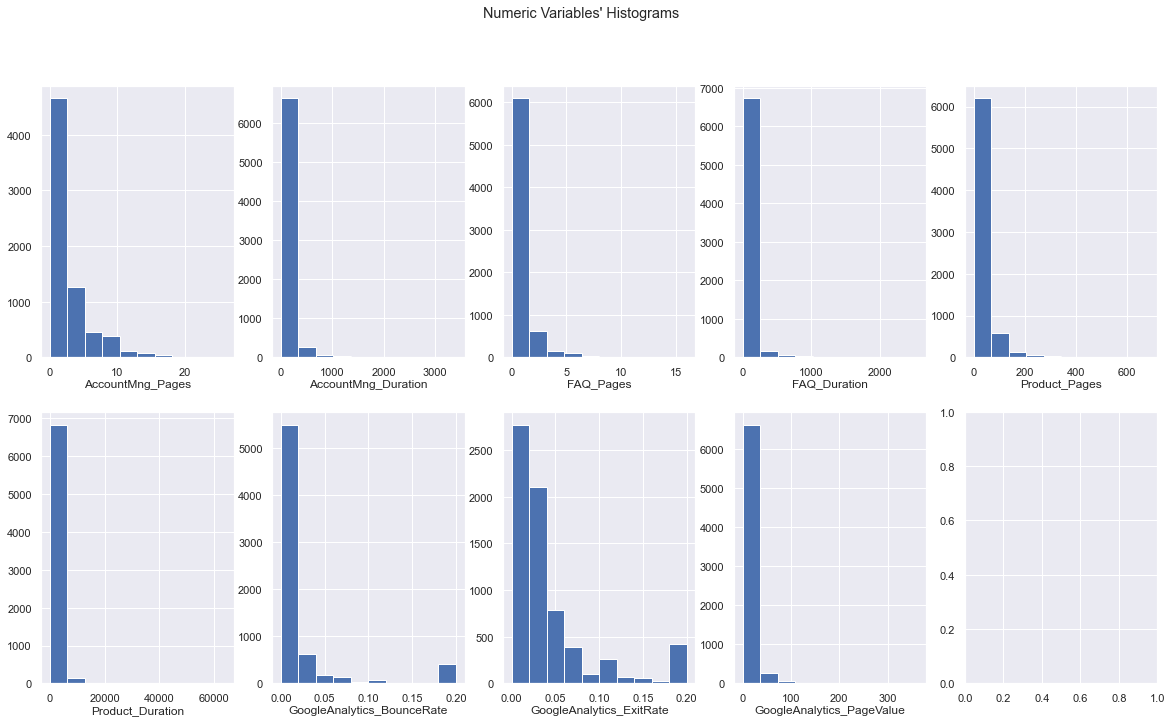

In [32]:
# All Numeric Variables' Histograms in one figure

%matplotlib inline


sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_num.columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), (X_train_num.columns.tolist())): # Notice the zip() function and flatten() method
    ax.hist(X_train_num[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)


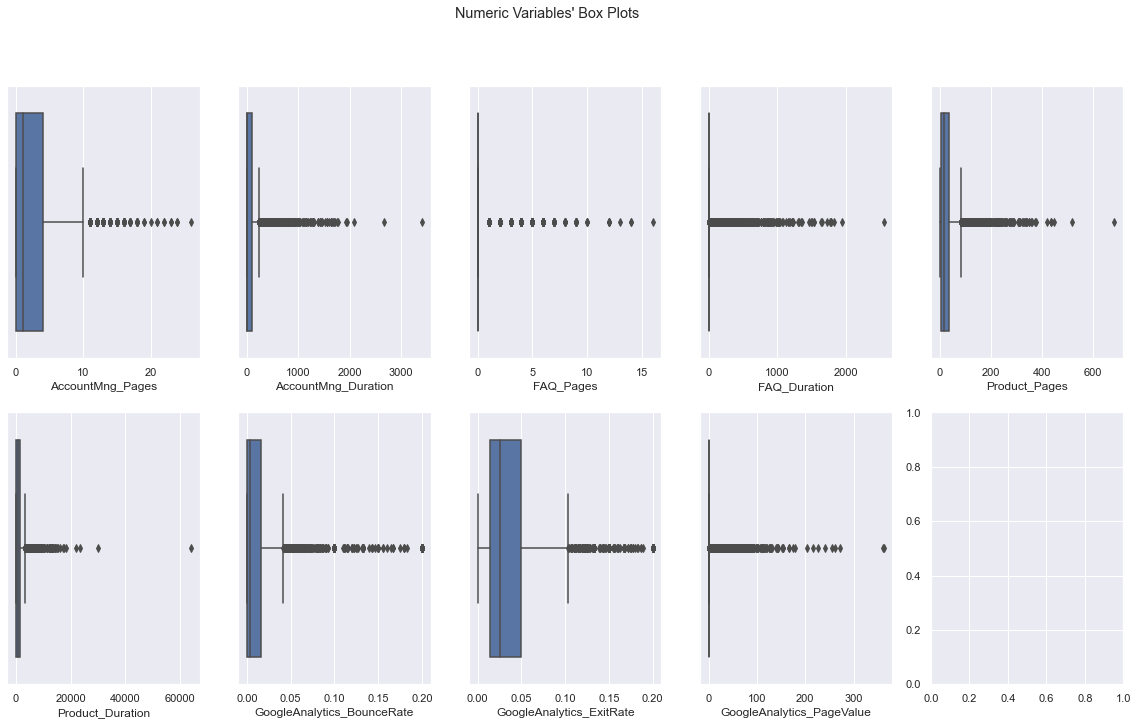

In [33]:
# All Numeric Variables' Box Plots in one figure
%matplotlib inline

sns.set_theme(style="white")
# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_num.columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), X_train_num.columns.tolist()): # Notice the zip() function and flatten() method
    sns.boxplot(x=X_train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)
plt.savefig(os.path.join('../techscape-ecommerce/figures', 'box_plotwithOut'), dpi=200)

plt.show()

In [34]:
(6797-6708)/6797 

0.013094012064145948

In [35]:
len(X_train)

6999

In [36]:
filters1 = (
         (X_train['AccountMng_Pages']<=19)
         &
         (X_train['AccountMng_Duration']<=2000)
         &
         (X_train['FAQ_Pages']<=6)
         &
         (X_train['FAQ_Duration']<=1100)
         &
         (X_train['Product_Pages']<=400)
         &
         (X_train['Product_Duration']<=15000)
         &
         (X_train['GoogleAnalytics_BounceRate']<=0.20)
         &
         (X_train['GoogleAnalytics_ExitRate']<=0.20)
         &
         (X_train['GoogleAnalytics_PageValue']<=165)
         )

teste=X_train[filters1]
teste

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,day
Access_ID,,,,,,,,,,,,,,,,
485098673,2020-03-18,0,0.0,1,60.0,43,1131.80835,0.0288,0.0473,0.0,Android,1,Portugal,3,Returner,18
740418308,2020-11-20,1,19.0,0,0.0,100,3457.2854,0.0061,0.0282,0.0,Windows,2,Portugal,2,Returner,20
538092603,2020-12-04,4,207.0,0,0.0,31,1592.233276,0.0,0.0116,57.065498,Windows,2,Brazil,1,Returner,4
105875577,2020-12-25,0,0.0,0,0.0,3,98.0,0.0,0.0667,0.0,Android,1,United Kingdom,2,Returner,25
601182749,2020-12-05,0,0.0,0,0.0,9,339.5,0.0,0.0139,0.0,Android,2,Spain,2,New_Access,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512160533,2020-11-22,0,0.0,0,0.0,10,83.416702,0.0,0.0222,0.0,Android,1,Portugal,2,Returner,22
601178452,2020-05-01,1,5.0,0,0.0,7,35.0,0.1143,0.1238,0.0,Android,1,Brazil,12,Returner,1
168625548,2020-05-10,6,91.5,0,0.0,9,115.5,0.0182,0.0182,0.0,MacOSX,2,United Kingdom,3,Returner,10


In [37]:
#def manual_filter(df):
def filter_outlier(df):
    filters1 = (
         (df['AccountMng_Pages']<=19)
         &
         (df['AccountMng_Duration']<=2000)
         &
         (df['FAQ_Pages']<=6)
         &
         (df['FAQ_Duration']<=1100)
         &
         (df['Product_Pages']<=400)
         &
         (df['Product_Duration']<=15000)
         &
         (df['GoogleAnalytics_BounceRate']<=0.20)
         &
         (df['GoogleAnalytics_ExitRate']<=0.20)
         &
         (df['GoogleAnalytics_PageValue']<=165)
         )
    return df[filters1],df[~filters1].index

In [38]:
1-(6902)/6999

0.013859122731818885

In [39]:
index_out_train=filter_outlier(X_train)[1].tolist()
#index_out_val=filter_outlier(X_val)[1].tolist()

In [40]:
X_train_no_out=filter_outlier(X_train)[0]
X_val_no_out=X_val.copy()

In [41]:
X_train_out=X_train.copy()
X_val_out=X_val.copy()

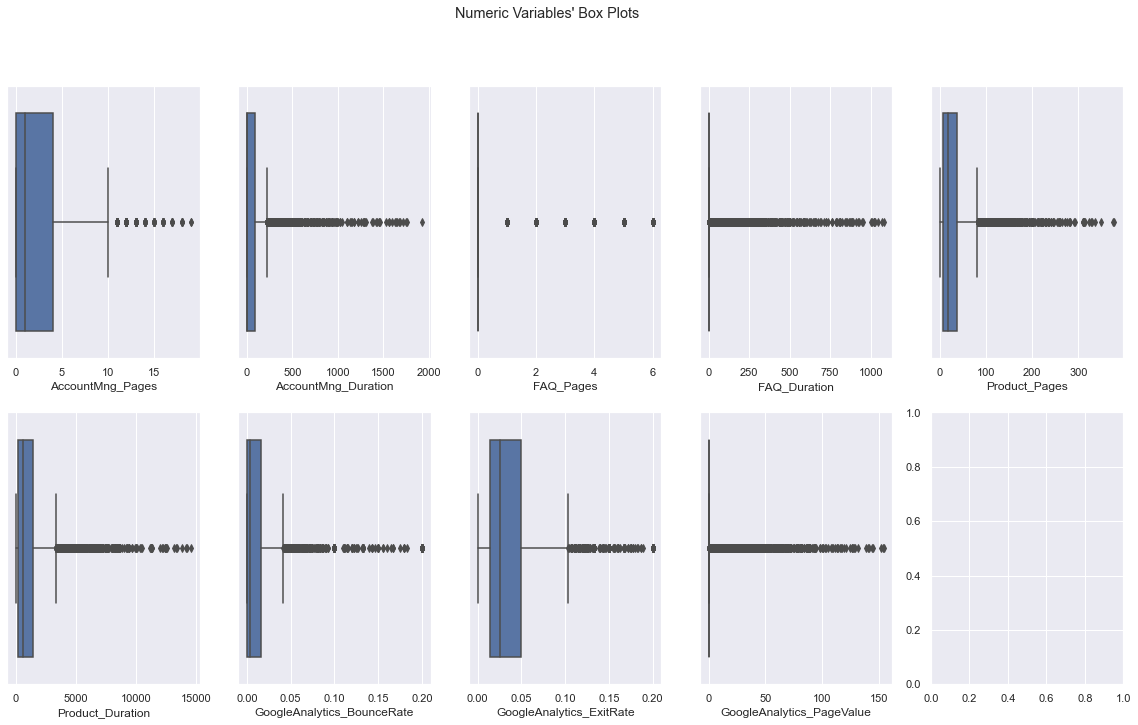

In [42]:
# All Numeric Variables' Box Plots in one figure
%matplotlib inline

sns.set_theme(style="white")
# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_no_out.drop(columns=non_num_feat, axis=1).columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), teste.drop(columns=non_num_feat, axis=1).columns.tolist()): # Notice the zip() function and flatten() method
    sns.boxplot(x=(X_train_no_out[feat]), ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)
plt.savefig(os.path.join('../techscape-ecommerce/figures', 'box_plotoutoutliers'), dpi=200)

plt.show()

In [43]:
X_train_no_out[X_train_no_out['FAQ_Pages']>4]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,day
Access_ID,,,,,,,,,,,,,,,,
780687553,2020-11-30,7,167.375,6,135.0,155,4263.977539,0.0054,0.012,112.6661,Android,2,Portugal,2,Returner,30
351386702,2020-12-14,7,177.5,6,312.0,40,1123.050781,0.0087,0.0247,0.0,Android,1,Spain,2,Returner,14
743264226,2020-05-20,2,60.0,6,459.0,17,1370.067871,0.0217,0.0351,0.0,Android,1,Other,1,Returner,20
442488118,2020-05-08,0,0.0,5,161.5,60,2789.166748,0.0,0.005,31.318899,Windows,2,Other,2,Returner,8
651464584,2020-10-25,2,82.599998,6,316.0,34,1446.733276,0.0,0.0024,0.0,iOS,1,Brazil,2,New_Access,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251382158,2020-05-30,3,604.5,6,75.666702,50,2387.435791,0.0194,0.0378,0.0,Android,1,Spain,12,Returner,30
701868956,2020-05-14,2,58.0,5,115.0,71,1563.93103,0.0066,0.0172,0.0,MacOSX,2,Portugal,4,Returner,14
269080453,2020-12-29,8,167.910706,6,547.75,111,6340.152344,0.0034,0.0094,44.219799,MacOSX,2,Other,2,Returner,29


In [44]:
# remove outliers records from y_train
y_train_df=pd.DataFrame(y_train)

y_train_df=y_train_df[~y_train_df.index.isin(index_out_train)]
y_roc=y_train_df

In [45]:
# remove outliers records from y_val
y_val_df=pd.DataFrame(y_val)
#y_val_df=y_val_df[~y_val_df.index.isin(index_out_val)]

In [46]:
X_train_no_out_num = X_train_no_out.drop(columns=non_num_feat)
X_train_no_out_cat=X_train_no_out[non_num_feat]

<hr>
<a class="anchor" id="2dim_outliers">
    
## Multi-dimentional outliers
    
</a>

In [42]:
# Pairwise Relationship of Numerical Variables

sns.set_theme(style="white")
# Setting pairplot
sns.pairplot(X_train_no_out_num, diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.savefig(os.path.join('../techscape-ecommerce/figures', 'multi-outliers'), dpi=200)

plt.show()

<hr>
<a class="anchor" id="FeatureEngeneering">
    
# Feature Engineering
    
</a>

In [47]:
def feat_eng(df):

    df['month']=df['Date'].dt.month

    summer = [7, 8, 9]
    autumn = [10, 11, 12]
    winter = [1, 2, 3]
    spring = [4, 5, 6]

    mobile = ['Android', 'iOS']
    computer = ['Chrome OS', 'Fedora', 'Ubuntu', 'Windows', 'MacOSX']

    weekend = [5, 6]

    df['summer'] = np.where(df['month'].isin(summer), 1, 0)
    df['autumn'] = np.where(df['month'].isin(autumn), 1, 0)
    df['winter'] = np.where(df['month'].isin(winter), 1, 0)
    df['spring'] = np.where(df['month'].isin(spring), 1, 0)


    df['mobile'] = np.where(df['OS'].isin(mobile), 1, 0)
    df['computer'] = np.where(df['OS'].isin(computer), 1, 0)

    df['Traffic2_and_computer'] = np.where((df['Type_of_Traffic'] == 2) & (df['computer'] == 1), 1, 0)

    df['Returning_and_computer'] = np.where((df['Type_of_Visitor'] == 'Returner') & (df['computer'] == 1), 1, 0)

    df['weekday'] = pd.to_datetime(df['Date']).apply(lambda x: x.weekday())
    df['weekend'] = np.where(df['weekday'].isin(weekend), 1, 0)

    
    df['avg_duration_account'] = np.where(
        df['AccountMng_Pages']==0, 0,np.divide(df['AccountMng_Duration'],df['AccountMng_Pages'])) 

    df['avg_duration_FAQ'] = np.where(
        df['FAQ_Pages']==0, 0,np.divide(df['FAQ_Duration'],df['FAQ_Pages'])) 

    df['avg_duration_product'] = np.where(
        df['Product_Pages']==0, 0,np.divide(df['Product_Duration'],df['Product_Pages'])) 
   
    df['log_AccountMng_Duration']=np.log10(df['AccountMng_Duration']+1)
    df['log_AccountMng_Pages']=np.log10(df['AccountMng_Pages']+1)
    df['log_FAQ_Duration']=np.log10(df['FAQ_Duration']+1)
    df['log_FAQ_Pages']=np.log10(df['FAQ_Pages']+1)
    df['log_Product_Duration']=np.log10(df['Product_Duration']+1)
    df['log_Product_Pages']=np.log10(df['Product_Pages']+1)
    df['log_BounceRate']=np.log10(df['GoogleAnalytics_BounceRate']+1)
    df['log_ExitRate']=np.log10(df['GoogleAnalytics_ExitRate']+1)
    df['log_PageValue']=np.log10(df['GoogleAnalytics_PageValue']+1)
    df['during_covid']=np.where(df['month']<=3,0,1) 

In [48]:
feat_eng(X_train_no_out)
feat_eng(X_val_no_out)
feat_eng(test)

feat_eng(X_train_out)
feat_eng(X_val_out)

In [49]:
X_train_no_out.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,6902.0,2.237612,3.193157,0.0,0.000000,1.000000,4.000000,19.000000
AccountMng_Duration,6902.0,76.241026,161.529617,0.0,0.000000,6.000000,87.824974,1922.000000
FAQ_Pages,6902.0,0.426253,1.056165,0.0,0.000000,0.000000,0.000000,6.000000
FAQ_Duration,6902.0,26.159985,96.699867,0.0,0.000000,0.000000,0.000000,1079.833252
Product_Pages,6902.0,30.416401,39.343624,0.0,7.000000,17.500000,37.000000,378.000000
Product_Duration,6902.0,1137.180672,1587.484619,0.0,175.850021,586.049988,1440.000000,14577.084961
GoogleAnalytics_BounceRate,6902.0,0.022494,0.049242,0.0,0.000000,0.003100,0.016700,0.200000
GoogleAnalytics_ExitRate,6902.0,0.043424,0.049210,0.0,0.014300,0.025400,0.050000,0.200000
GoogleAnalytics_PageValue,6902.0,5.484497,15.816298,0.0,0.000000,0.000000,0.000000,154.095505
Browser,6902.0,2.358737,1.728566,1.0,2.000000,2.000000,2.000000,13.000000


Repeating the process for dataset with outliers

## One Hot_encoding

#### Train dataset

In [50]:
ohc_feat_list = ['Browser','Country','OS','Type_of_Visitor','Type_of_Traffic']

In [51]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(X_train_no_out[ohc_feat_list])
ohc_feat_names = ohc.get_feature_names()
ohc_X_train = pd.DataFrame(ohc_feat, index=X_train_no_out.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_X_train.columns

Index(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_10',
       'x0_11', 'x0_12', 'x0_13', 'x1_Brazil', 'x1_France', 'x1_Germany',
       'x1_Italy', 'x1_Other', 'x1_Portugal', 'x1_Spain', 'x1_Switzerland',
       'x1_United Kingdom', 'x2_Android', 'x2_Chrome OS', 'x2_Fedora',
       'x2_MacOSX', 'x2_Other', 'x2_Ubuntu', 'x2_Windows', 'x2_iOS',
       'x3_New_Access', 'x3_Other', 'x3_Returner', 'x4_1', 'x4_2', 'x4_3',
       'x4_4', 'x4_5', 'x4_6', 'x4_7', 'x4_8', 'x4_9', 'x4_10', 'x4_11',
       'x4_12', 'x4_13', 'x4_14', 'x4_15'],
      dtype='object')

In [52]:
ohc_X_train.rename(columns={'x0_1':'browser1','x0_2':'browser2','x0_3':'browser3','x0_4':'browser4','x0_5':'browser5','x0_6':'browser6','x0_7':'browser7','x0_8':'browser8','x0_9':'browser9','x0_10':'browser10','x0_11':'browser11','x0_12':'browser12','x0_13':'browser13','x4_1':'traffic1','x4_2':'traffic2', 'x4_3':'traffic3', 'x4_4':'traffic4', 'x4_5':'traffic5', 'x4_6':'traffic6', 'x4_7':'traffic7', 'x4_8':'traffic8',
       'x4_9':'traffic9', 'x4_10':'traffic10', 'x4_11':'traffic11', 'x4_12':'traffic12', 'x4_13':'traffic13', 'x4_14':'traffic14', 'x4_15':'traffic15'},inplace=True)

In [53]:
X_train_eng = X_train_no_out.join(ohc_X_train)
X_train_eng_minus1=X_train_eng.copy() #create a dataframe to test -1 and 1 minmax

In [54]:
X_train_eng.columns

Index(['Date', 'AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages',
       'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor', 'day', 'month', 'summer',
       'autumn', 'winter', 'spring', 'mobile', 'computer',
       'Traffic2_and_computer', 'Returning_and_computer', 'weekday', 'weekend',
       'avg_duration_account', 'avg_duration_FAQ', 'avg_duration_product',
       'log_AccountMng_Duration', 'log_AccountMng_Pages', 'log_FAQ_Duration',
       'log_FAQ_Pages', 'log_Product_Duration', 'log_Product_Pages',
       'log_BounceRate', 'log_ExitRate', 'log_PageValue', 'during_covid',
       'browser1', 'browser2', 'browser3', 'browser4', 'browser5', 'browser6',
       'browser7', 'browser8', 'browser10', 'browser11', 'browser12',
       'browser13', 'x1_Brazil', 'x1_France', 'x1_Germany', 'x1_Italy',
       'x1_Ot

#### Test dataset

In [55]:
ohc_feat_test = ohc.fit_transform(test[ohc_feat_list])
ohc_feat_test_names = ohc.get_feature_names()
ohc_X_test = pd.DataFrame(ohc_feat_test, index = test.index, columns = ohc_feat_test_names)  # Why the index=df_ohc.index?
ohc_X_test.columns

Index(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_9',
       'x0_10', 'x0_11', 'x0_12', 'x0_13', 'x1_Brazil', 'x1_France',
       'x1_Germany', 'x1_Italy', 'x1_Other', 'x1_Portugal', 'x1_Spain',
       'x1_Switzerland', 'x1_United Kingdom', 'x2_Android', 'x2_Chrome OS',
       'x2_Fedora', 'x2_MacOSX', 'x2_Other', 'x2_Ubuntu', 'x2_Windows',
       'x2_iOS', 'x3_New_Access', 'x3_Other', 'x3_Returner', 'x4_1', 'x4_2',
       'x4_3', 'x4_4', 'x4_5', 'x4_6', 'x4_7', 'x4_8', 'x4_9', 'x4_10',
       'x4_11', 'x4_12', 'x4_13', 'x4_14', 'x4_15'],
      dtype='object')

In [56]:
ohc_X_test.rename(columns={'x0_1':'browser1','x0_2':'browser2','x0_3':'browser3','x0_4':'browser4','x0_5':'browser5','x0_6':'browser6','x0_7':'browser7','x0_8':'browser8','x0_9':'browser9','x0_10':'browser10','x0_11':'browser11','x0_12':'browser12','x0_13':'browser13','x4_1':'traffic1','x4_2':'traffic2', 'x4_3':'traffic3', 'x4_4':'traffic4', 'x4_5':'traffic5', 'x4_6':'traffic6', 'x4_7':'traffic7', 'x4_8':'traffic8',
       'x4_9':'traffic9', 'x4_10':'traffic10', 'x4_11':'traffic11', 'x4_12':'traffic12', 'x4_13':'traffic13', 'x4_14':'traffic14', 'x4_15':'traffic15'},inplace=True)

In [57]:
X_test_eng = test.join(ohc_X_test)

In [58]:
X_test_robust=X_test_eng.copy()

#### Validation dataset

In [59]:
ohc_feat_val = ohc.fit_transform(X_val_no_out[ohc_feat_list])
ohc_feat_val_names = ohc.get_feature_names()
ohc_X_val = pd.DataFrame(ohc_feat_val, index = X_val_no_out.index, columns = ohc_feat_val_names)  # Why the index=df_ohc.index?
ohc_X_val.columns

Index(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_10',
       'x0_12', 'x0_13', 'x1_Brazil', 'x1_France', 'x1_Germany', 'x1_Italy',
       'x1_Other', 'x1_Portugal', 'x1_Spain', 'x1_Switzerland',
       'x1_United Kingdom', 'x2_Android', 'x2_Chrome OS', 'x2_MacOSX',
       'x2_Other', 'x2_Ubuntu', 'x2_Windows', 'x2_iOS', 'x3_New_Access',
       'x3_Other', 'x3_Returner', 'x4_1', 'x4_2', 'x4_3', 'x4_4', 'x4_5',
       'x4_6', 'x4_7', 'x4_8', 'x4_9', 'x4_10', 'x4_11', 'x4_12', 'x4_13',
       'x4_14', 'x4_15'],
      dtype='object')

In [60]:
ohc_X_val.rename(columns={'x0_1':'browser1','x0_2':'browser2','x0_3':'browser3','x0_4':'browser4','x0_5':'browser5','x0_6':'browser6','x0_7':'browser7','x0_8':'browser8','x0_9':'browser9','x0_10':'browser10','x0_11':'browser11','x0_12':'browser12','x0_13':'browser13','x4_1':'traffic1','x4_2':'traffic2', 'x4_3':'traffic3', 'x4_4':'traffic4', 'x4_5':'traffic5', 'x4_6':'traffic6', 'x4_7':'traffic7', 'x4_8':'traffic8',
       'x4_9':'traffic9', 'x4_10':'traffic10', 'x4_11':'traffic11', 'x4_12':'traffic12', 'x4_13':'traffic13', 'x4_14':'traffic14', 'x4_15':'traffic15'},inplace=True)

In [61]:
X_val_eng = X_val_no_out.join(ohc_X_val)
X_val_eng_minus1=X_val_eng.copy()

In [62]:
#binary_list=ohc_X_train.columns.to_list()+['during_covid', 'computer', 'mobile', 'summer', 'autumn', 'winter', 'spring', 'Traffic2_and_computer', 'Returning_and_computer', 'weekday', 'weekend']
binary_list=ohc_X_train.columns.to_list()+['during_covid', 'computer', 'mobile', 'summer', 'autumn', 'winter', 'spring', 'Traffic2_and_computer', 'Returning_and_computer', 'weekend']


In [63]:
non_num_feat1=non_num_feat+binary_list+['month','weekday']

In [64]:
X_train_eng_num = X_train_eng.drop(columns=non_num_feat1)

In [65]:
X_train_eng_num.columns

Index(['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
       'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue',
       'avg_duration_account', 'avg_duration_FAQ', 'avg_duration_product',
       'log_AccountMng_Duration', 'log_AccountMng_Pages', 'log_FAQ_Duration',
       'log_FAQ_Pages', 'log_Product_Duration', 'log_Product_Pages',
       'log_BounceRate', 'log_ExitRate', 'log_PageValue'],
      dtype='object')

In [66]:
non_num_feat_alter=non_num_feat1.copy()
non_num_feat_alter.remove('browser11')
non_num_feat_alter.remove('x2_Fedora')

In [67]:
X_val_eng_num = X_val_eng.drop(columns=non_num_feat_alter,axis=1)

## FOR OUTLIERS ONE HOT ENCODING

In [68]:
ohc_feat = ohc.fit_transform(X_train_out[ohc_feat_list])
ohc_feat_names = ohc.get_feature_names()
ohc_X_train_out = pd.DataFrame(ohc_feat, index=X_train_out.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_X_train_out.columns

ohc_X_train_out.rename(columns={'x0_1':'browser1','x0_2':'browser2','x0_3':'browser3','x0_4':'browser4','x0_5':'browser5','x0_6':'browser6','x0_7':'browser7','x0_8':'browser8','x0_9':'browser9','x0_10':'browser10','x0_11':'browser11','x0_12':'browser12','x0_13':'browser13','x4_1':'traffic1','x4_2':'traffic2', 'x4_3':'traffic3', 'x4_4':'traffic4', 'x4_5':'traffic5', 'x4_6':'traffic6', 'x4_7':'traffic7', 'x4_8':'traffic8',
       'x4_9':'traffic9', 'x4_10':'traffic10', 'x4_11':'traffic11', 'x4_12':'traffic12', 'x4_13':'traffic13', 'x4_14':'traffic14', 'x4_15':'traffic15'},inplace=True)

X_train_out = X_train_out.join(ohc_X_train_out)

X_train_out.columns

Index(['Date', 'AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages',
       'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor', 'day', 'month', 'summer',
       'autumn', 'winter', 'spring', 'mobile', 'computer',
       'Traffic2_and_computer', 'Returning_and_computer', 'weekday', 'weekend',
       'avg_duration_account', 'avg_duration_FAQ', 'avg_duration_product',
       'log_AccountMng_Duration', 'log_AccountMng_Pages', 'log_FAQ_Duration',
       'log_FAQ_Pages', 'log_Product_Duration', 'log_Product_Pages',
       'log_BounceRate', 'log_ExitRate', 'log_PageValue', 'during_covid',
       'browser1', 'browser2', 'browser3', 'browser4', 'browser5', 'browser6',
       'browser7', 'browser8', 'browser10', 'browser11', 'browser12',
       'browser13', 'x1_Brazil', 'x1_France', 'x1_Germany', 'x1_Italy',
       'x1_Ot

In [69]:
ohc_feat = ohc.fit_transform(X_val_out[ohc_feat_list])
ohc_feat_names = ohc.get_feature_names()
ohc_X_val_out = pd.DataFrame(ohc_feat, index=X_val_out.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_X_val_out.columns

ohc_X_val_out.rename(columns={'x0_1':'browser1','x0_2':'browser2','x0_3':'browser3','x0_4':'browser4','x0_5':'browser5','x0_6':'browser6','x0_7':'browser7','x0_8':'browser8','x0_9':'browser9','x0_10':'browser10','x0_11':'browser11','x0_12':'browser12','x0_13':'browser13','x4_1':'traffic1','x4_2':'traffic2', 'x4_3':'traffic3', 'x4_4':'traffic4', 'x4_5':'traffic5', 'x4_6':'traffic6', 'x4_7':'traffic7', 'x4_8':'traffic8',
       'x4_9':'traffic9', 'x4_10':'traffic10', 'x4_11':'traffic11', 'x4_12':'traffic12', 'x4_13':'traffic13', 'x4_14':'traffic14', 'x4_15':'traffic15'},inplace=True)

X_val_out = X_val_out.join(ohc_X_val_out)

X_val_out.columns

Index(['Date', 'AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages',
       'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor', 'day', 'month', 'summer',
       'autumn', 'winter', 'spring', 'mobile', 'computer',
       'Traffic2_and_computer', 'Returning_and_computer', 'weekday', 'weekend',
       'avg_duration_account', 'avg_duration_FAQ', 'avg_duration_product',
       'log_AccountMng_Duration', 'log_AccountMng_Pages', 'log_FAQ_Duration',
       'log_FAQ_Pages', 'log_Product_Duration', 'log_Product_Pages',
       'log_BounceRate', 'log_ExitRate', 'log_PageValue', 'during_covid',
       'browser1', 'browser2', 'browser3', 'browser4', 'browser5', 'browser6',
       'browser7', 'browser8', 'browser10', 'browser12', 'browser13',
       'x1_Brazil', 'x1_France', 'x1_Germany', 'x1_Italy', 'x1_Other',
       'x1_Por

In [70]:
X_train_out[binary_list].describe().T

,count,mean,std,min,25%,50%,75%,max
browser1,6999.0,0.198743,0.399082,0.0,0.0,0.0,0.0,1.0
browser2,6999.0,0.648807,0.477377,0.0,0.0,1.0,1.0,1.0
browser3,6999.0,0.006858,0.082535,0.0,0.0,0.0,0.0,1.0
browser4,6999.0,0.059151,0.235925,0.0,0.0,0.0,0.0,1.0
browser5,6999.0,0.036005,0.186316,0.0,0.0,0.0,0.0,1.0
browser6,6999.0,0.014574,0.119846,0.0,0.0,0.0,0.0,1.0
browser7,6999.0,0.004143,0.064241,0.0,0.0,0.0,0.0,1.0
browser8,6999.0,0.010716,0.102968,0.0,0.0,0.0,0.0,1.0
browser10,6999.0,0.015145,0.122138,0.0,0.0,0.0,0.0,1.0
browser11,6999.0,0.000429,0.020700,0.0,0.0,0.0,0.0,1.0


<hr>
<a class="anchor" id="scale">
    
# Scaling Data
    
</a>

# MIN-MAX 0 AND 1

In [71]:
metric_feat=X_train_eng_num.columns.to_list()

In [72]:
scaler = MinMaxScaler().fit(X_train_eng[metric_feat])
X_train_eng_num_scaled_min = scaler.transform(X_train_eng[metric_feat]) 

# Convert the array to a pandas dataframe
X_train_eng[metric_feat] = pd.DataFrame(X_train_eng_num_scaled_min, columns = metric_feat).set_index(X_train_eng[metric_feat].index)

X_train_eng.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,6902.0,0.117769,0.168061,0.0,0.000000,0.052632,0.210526,1.0
AccountMng_Duration,6902.0,0.039668,0.084042,0.0,0.000000,0.003122,0.045695,1.0
FAQ_Pages,6902.0,0.071042,0.176028,0.0,0.000000,0.000000,0.000000,1.0
FAQ_Duration,6902.0,0.024226,0.089551,0.0,0.000000,0.000000,0.000000,1.0
Product_Pages,6902.0,0.080467,0.104084,0.0,0.018519,0.046296,0.097884,1.0
...,...,...,...,...,...,...,...,...
traffic11,6902.0,0.019704,0.138993,0.0,0.000000,0.000000,0.000000,1.0
traffic12,6902.0,0.004347,0.065790,0.0,0.000000,0.000000,0.000000,1.0
traffic13,6902.0,0.059258,0.236124,0.0,0.000000,0.000000,0.000000,1.0
traffic14,6902.0,0.002608,0.051005,0.0,0.000000,0.000000,0.000000,1.0


In [73]:
X_val_num_scaled = scaler.transform(X_val_eng[metric_feat])
X_val_eng[metric_feat] = pd.DataFrame(X_val_num_scaled, columns = metric_feat).set_index(X_val_eng.index)
X_val_eng.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,3000.0,0.121175,0.176741,0.0,0.000000,0.052632,0.210526,1.421053
AccountMng_Duration,3000.0,0.043881,0.097902,0.0,0.000000,0.004839,0.050078,1.367978
FAQ_Pages,3000.0,0.079667,0.211085,0.0,0.000000,0.000000,0.000000,4.000000
FAQ_Duration,3000.0,0.031929,0.130749,0.0,0.000000,0.000000,0.000000,2.090060
Product_Pages,3000.0,0.082826,0.124582,0.0,0.018519,0.047619,0.097884,1.865079
...,...,...,...,...,...,...,...,...
traffic11,3000.0,0.021333,0.144517,0.0,0.000000,0.000000,0.000000,1.000000
traffic12,3000.0,0.004667,0.068165,0.0,0.000000,0.000000,0.000000,1.000000
traffic13,3000.0,0.061000,0.239370,0.0,0.000000,0.000000,0.000000,1.000000
traffic14,3000.0,0.002667,0.051579,0.0,0.000000,0.000000,0.000000,1.000000


In [74]:
X_test_eng_scaled = scaler.transform(X_test_eng[metric_feat])
X_test_eng[metric_feat] = pd.DataFrame(X_test_eng_scaled, columns = X_test_eng[metric_feat].columns).set_index(X_test_eng[metric_feat].index)
X_test_eng.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,2300.0,0.120526,0.171174,0.0,0.000000,0.052632,0.210526,1.210526
AccountMng_Duration,2300.0,0.041509,0.085561,0.0,0.000000,0.004448,0.050911,1.415453
FAQ_Pages,2300.0,0.081087,0.205719,0.0,0.000000,0.000000,0.000000,2.000000
FAQ_Duration,2300.0,0.031733,0.134744,0.0,0.000000,0.000000,0.000000,2.085538
Product_Pages,2300.0,0.084467,0.116800,0.0,0.021164,0.047619,0.100529,1.412698
...,...,...,...,...,...,...,...,...
traffic11,2300.0,0.017391,0.130753,0.0,0.000000,0.000000,0.000000,1.000000
traffic12,2300.0,0.002609,0.051020,0.0,0.000000,0.000000,0.000000,1.000000
traffic13,2300.0,0.061739,0.240733,0.0,0.000000,0.000000,0.000000,1.000000
traffic14,2300.0,0.002609,0.051020,0.0,0.000000,0.000000,0.000000,1.000000


In [75]:
X_test_eng.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,2300.0,0.120526,0.171174,0.0,0.000000,0.052632,0.210526,1.210526
AccountMng_Duration,2300.0,0.041509,0.085561,0.0,0.000000,0.004448,0.050911,1.415453
FAQ_Pages,2300.0,0.081087,0.205719,0.0,0.000000,0.000000,0.000000,2.000000
FAQ_Duration,2300.0,0.031733,0.134744,0.0,0.000000,0.000000,0.000000,2.085538
Product_Pages,2300.0,0.084467,0.116800,0.0,0.021164,0.047619,0.100529,1.412698
...,...,...,...,...,...,...,...,...
traffic11,2300.0,0.017391,0.130753,0.0,0.000000,0.000000,0.000000,1.000000
traffic12,2300.0,0.002609,0.051020,0.0,0.000000,0.000000,0.000000,1.000000
traffic13,2300.0,0.061739,0.240733,0.0,0.000000,0.000000,0.000000,1.000000
traffic14,2300.0,0.002609,0.051020,0.0,0.000000,0.000000,0.000000,1.000000


# Comparing Scales

# Scale between -1 and 1

In [76]:
metric_feat_test=[ 'FAQ_Duration',
 'Product_Duration',
 'GoogleAnalytics_BounceRate',
 'GoogleAnalytics_ExitRate',
 'GoogleAnalytics_PageValue']


In [77]:
min_max2 = MinMaxScaler(feature_range=(-1,1)).fit(X_train_eng_minus1[metric_feat_test])

min_max2_X_train = min_max2.transform(X_train_eng_minus1[metric_feat_test]) ## NOVA

min_max2_X_val = min_max2.transform(X_val_eng_minus1[metric_feat_test])

model_min_max2 = KNeighborsClassifier(n_neighbors=5).fit(min_max2_X_train, y_train_df.squeeze().to_list(),)
mean(cross_val_score(model_min_max2, min_max2_X_val,  y_val_df.squeeze().to_list(), cv=5,scoring=make_scorer(f1_score, average='binary')))
#model_min_max2.f1_score(min_max2_X_val,y_val_df.squeeze().to_list())

0.5782008162197918

# Scale between 0 and 1

In [78]:
model_min_max1 = KNeighborsClassifier(n_neighbors=5).fit(X_train_eng[metric_feat_test], y_train_df.squeeze().to_list())

model_min_max1.score(X_val_eng[metric_feat_test], y_val_df.squeeze().to_list())
mean(cross_val_score(model_min_max1, X_val_eng[metric_feat_test],  y_val_df.squeeze().to_list(), cv=5,scoring=make_scorer(f1_score, average='binary')))

0.5782008162197918

<AxesSubplot:>

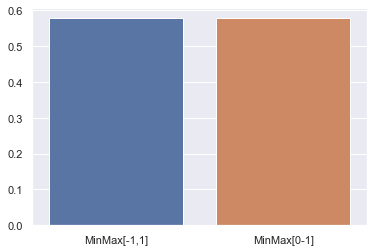

In [79]:
sns.set_theme(style="white")
x = ['MinMax[-1,1]','MinMax[0-1]']
y = [mean(cross_val_score(model_min_max2, min_max2_X_val,  y_val_df.squeeze().to_list(), cv=5,scoring=make_scorer(f1_score, average='binary'))),
     
mean(cross_val_score(model_min_max1, X_val_eng[metric_feat_test],  y_val_df.squeeze().to_list(), cv=5,scoring=make_scorer(f1_score, average='binary')))]

sns.barplot(x, y)
plt.savefig(os.path.join('../techscape-ecommerce/figures', 'scale_comparison'), dpi=200)


## Robust for outliers

In [80]:
transformer = RobustScaler().fit(X_train_out[metric_feat])
X_train_out_scaled = transformer.transform(X_train_out[metric_feat]) 
X_train_out_robust=X_train_out.copy()

X_train_out_robust[metric_feat] = pd.DataFrame(X_train_out_scaled, columns = metric_feat).set_index(X_train_out_robust[metric_feat].index)

X_train_out_robust.describe().T


,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,6999.0,0.329261,0.835581,-0.250000,-0.250000,0.0,0.750000,6.250000
AccountMng_Duration,6999.0,0.800692,1.933686,-0.076923,-0.076923,0.0,0.923077,37.271978
FAQ_Pages,6999.0,0.494499,1.283902,0.000000,0.000000,0.0,0.000000,16.000000
FAQ_Duration,6999.0,34.593775,139.207232,0.000000,0.000000,0.0,0.000000,2549.375000
Product_Pages,6999.0,0.442907,1.403253,-0.580645,-0.354839,0.0,0.645161,21.548387
...,...,...,...,...,...,...,...,...
traffic11,6999.0,0.020146,0.140509,0.000000,0.000000,0.0,0.000000,1.000000
traffic12,6999.0,0.004286,0.065334,0.000000,0.000000,0.0,0.000000,1.000000
traffic13,6999.0,0.058866,0.235390,0.000000,0.000000,0.0,0.000000,1.000000
traffic14,6999.0,0.002715,0.052035,0.000000,0.000000,0.0,0.000000,1.000000


In [81]:
X_val_out_scaled = transformer.transform(X_val_out[metric_feat])
X_val_out_robust=X_val_out.copy()
X_val_out_robust[metric_feat] = pd.DataFrame(X_val_out_scaled, columns = metric_feat).set_index(X_val_out[metric_feat].index)
X_val_out_robust.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,3000.0,0.325583,0.839519,-0.250000,-0.250000,0.000000,0.750000,6.500000
AccountMng_Duration,3000.0,0.849877,2.067771,-0.076923,-0.076923,0.025275,0.980769,28.815977
FAQ_Pages,3000.0,0.478000,1.266511,0.000000,0.000000,0.000000,0.000000,24.000000
FAQ_Duration,3000.0,34.478208,141.186621,0.000000,0.000000,0.000000,0.000000,2256.916748
Product_Pages,3000.0,0.429301,1.519102,-0.580645,-0.354839,0.000000,0.612903,22.161290
...,...,...,...,...,...,...,...,...
traffic11,3000.0,0.021333,0.144517,0.000000,0.000000,0.000000,0.000000,1.000000
traffic12,3000.0,0.004667,0.068165,0.000000,0.000000,0.000000,0.000000,1.000000
traffic13,3000.0,0.061000,0.239370,0.000000,0.000000,0.000000,0.000000,1.000000
traffic14,3000.0,0.002667,0.051579,0.000000,0.000000,0.000000,0.000000,1.000000


In [82]:
X_test_scaled = transformer.transform(X_test_robust[metric_feat])
X_test_robust[metric_feat] = pd.DataFrame(X_test_scaled, columns = metric_feat).set_index(X_test_robust[metric_feat].index)
X_test_robust.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,2300.0,0.322500,0.813075,-0.250000,-0.250000,0.000000,0.750000,5.500000
AccountMng_Duration,2300.0,0.799790,1.807117,-0.076923,-0.076923,0.017033,0.998352,29.818681
FAQ_Pages,2300.0,0.486522,1.234311,0.000000,0.000000,0.000000,0.000000,12.000000
FAQ_Duration,2300.0,34.266832,145.500683,0.000000,0.000000,0.000000,0.000000,2252.033203
Product_Pages,2300.0,0.449313,1.424201,-0.580645,-0.322581,0.000000,0.645161,16.645161
...,...,...,...,...,...,...,...,...
traffic11,2300.0,0.017391,0.130753,0.000000,0.000000,0.000000,0.000000,1.000000
traffic12,2300.0,0.002609,0.051020,0.000000,0.000000,0.000000,0.000000,1.000000
traffic13,2300.0,0.061739,0.240733,0.000000,0.000000,0.000000,0.000000,1.000000
traffic14,2300.0,0.002609,0.051020,0.000000,0.000000,0.000000,0.000000,1.000000


In [83]:
y_train_out=y_train.squeeze().to_list()
y_val_out=y_val.squeeze().to_list()

## to test with outliers
X_train_out_robust -- y_train_out
X_val_out_robust --- y_val_out
X_test_robust

In [84]:
y_train_no_out=y_train_df

<hr>
<a class="anchor" id="redo-outliers">
    
# Redo outliers check
    
</a>

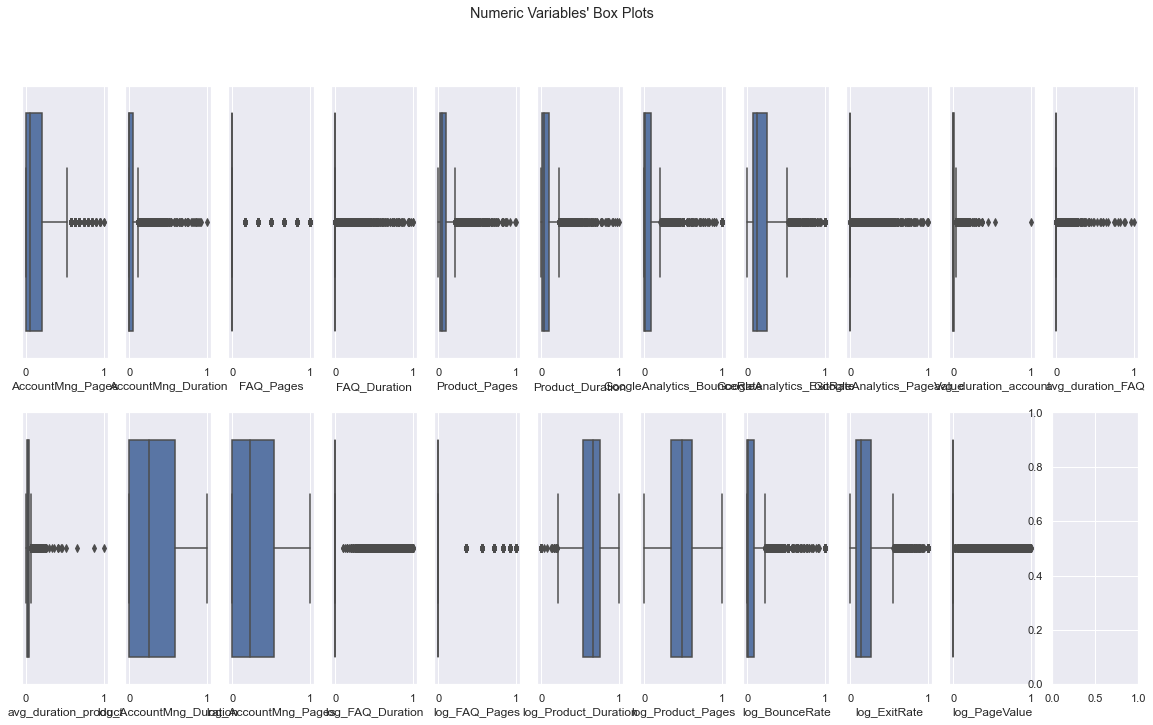

In [80]:
# All Numeric Variables' Box Plots in one figure
%matplotlib inline
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_eng[metric_feat].columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), X_train_eng[metric_feat].columns.tolist()): # Notice the zip() function and flatten() method
    sns.boxplot(x=X_train_eng[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()


<a class="anchor" id="FeatureSelection">
    
# Feature Selection
    
</a>

In [85]:
metric_feat_2methods = [
'AccountMng_Pages', 
'avg_duration_FAQ', 
'avg_duration_product',
'GoogleAnalytics_BounceRate', 
'GoogleAnalytics_ExitRate', 
'GoogleAnalytics_PageValue', 
'log_BounceRate', 
'log_ExitRate', 
'log_PageValue', 
'log_Product_Duration', 
'Product_Pages'
]

metric_feat_3methods = [
'AccountMng_Pages',
'GoogleAnalytics_BounceRate',
'GoogleAnalytics_ExitRate',
'GoogleAnalytics_PageValue',
'log_ExitRate',
'log_PageValue',
'log_Product_Duration',
'Product_Pages'
]

metric_feat_4methods = [
'AccountMng_Pages',
'GoogleAnalytics_PageValue',
'log_ExitRate',
'log_PageValue',
'log_Product_Duration'
]


binary_1model = [
'browser6',
'x3_New_Access',
'traffic2',
'traffic4',
'traffic8',
'traffic10',
'traffic11',
'traffic13',
'during_covid',
]

binary_2models = ['during_covid']


<a class="anchor" id="univariate">
    
## Univariate analysis
    
</a>

In [86]:
X_train_eng[metric_feat].var()

AccountMng_Pages              0.028244
AccountMng_Duration           0.007063
FAQ_Pages                     0.030986
FAQ_Duration                  0.008019
Product_Pages                 0.010833
Product_Duration              0.011860
GoogleAnalytics_BounceRate    0.060620
GoogleAnalytics_ExitRate      0.060541
GoogleAnalytics_PageValue     0.010535
avg_duration_account          0.000853
avg_duration_FAQ              0.002458
avg_duration_product          0.001074
log_AccountMng_Duration       0.096379
log_AccountMng_Pages          0.082445
log_FAQ_Duration              0.061763
log_FAQ_Pages                 0.056665
log_Product_Duration          0.046194
log_Product_Pages             0.042416
log_BounceRate                0.061299
log_ExitRate                  0.061001
log_PageValue                 0.061553
dtype: float64

None of the variables is univariate so we don't have to drop any variable, at least according with this method

In [87]:
# https://scikit-learn.org/stable/modules/feature_selection.html 
pd.DataFrame(X_train_eng[binary_list].var())

,0
browser1,0.160249
browser2,0.228449
browser3,0.006907
browser4,0.056010
browser5,0.034780
browser6,0.014281
browser7,0.004041
browser8,0.010750
browser10,0.014843
browser11,0.000435


In [88]:
0.8*(1-0.8)

# summer is IMPORTANT for Prediction
# autumn is IMPORTANT for Prediction
# winter is IMPORTANT for Prediction
# spring is IMPORTANT for Prediction
# Traffic2_and_computer is IMPORTANT for Prediction
# Returning_and_computer is IMPORTANT for Prediction
# weekend is IMPORTANT for Prediction


0.15999999999999998

<hr>
<a class="anchor" id="filter">
    
## Filter Methods
    
</a>

<hr>
<a class="anchor" id="correlation">
    
### Correlation Matrix
    
</a>

In [89]:
# Dataframe with the dependent and independent variables
all_train_num = X_train_eng[metric_feat].join(y_train_df)

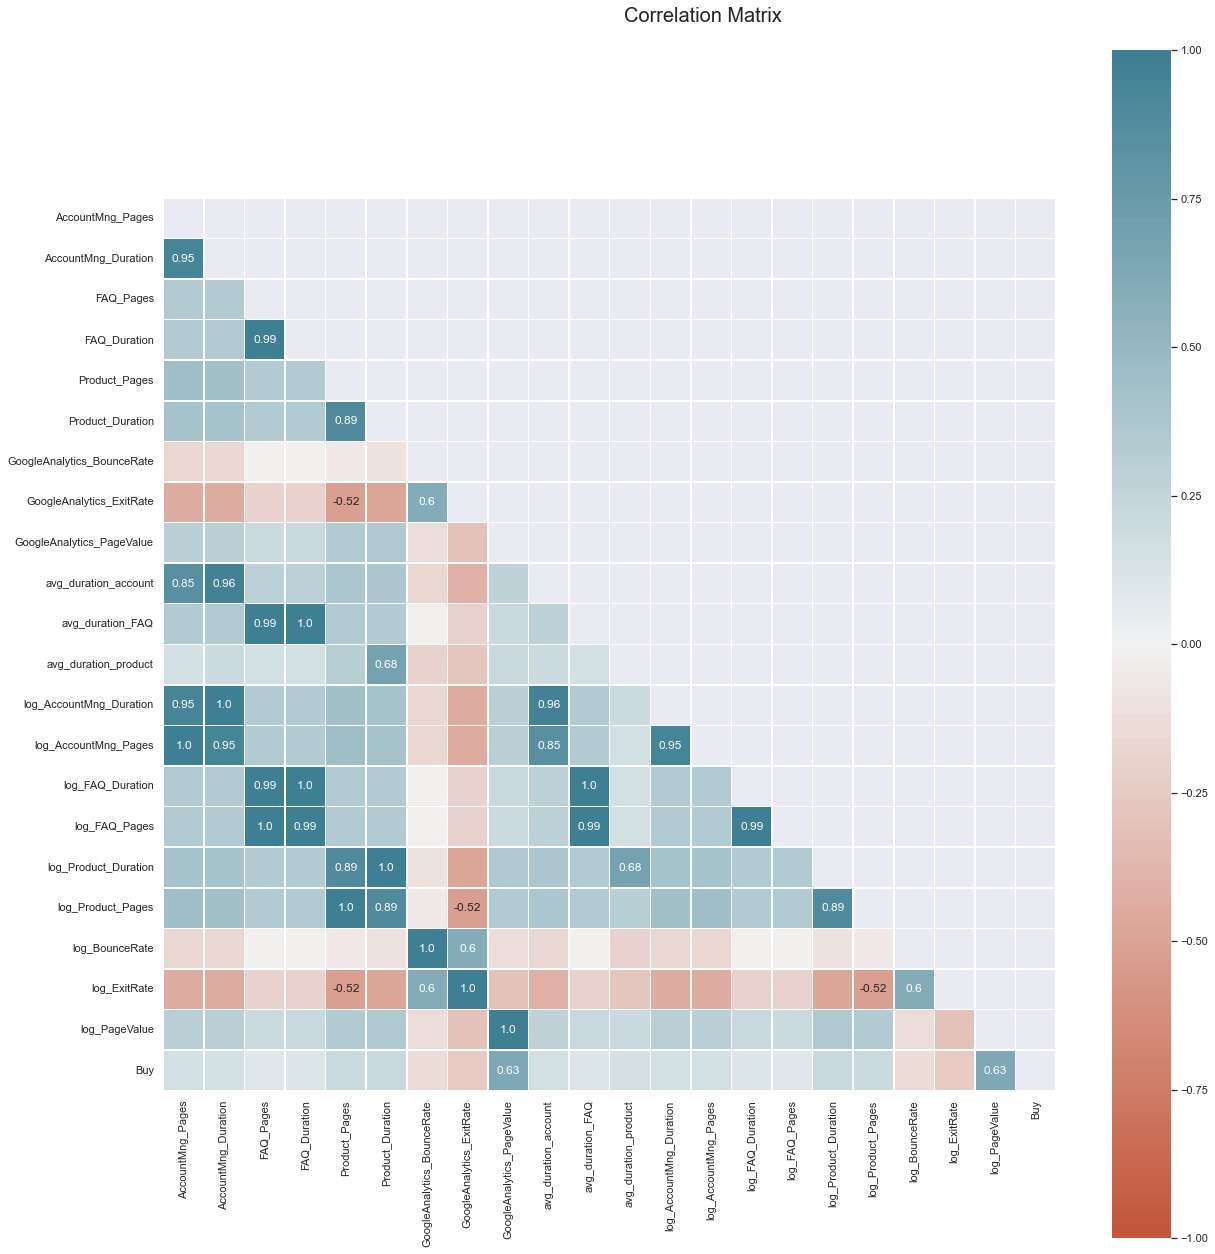

In [86]:

sns.set_theme(style="white")
# Prepare figure
fig = plt.figure(figsize=(20, 20))

# Obtain correlation matrix. Round the values to 2 decimal cases.
corr = np.round(all_train_num.corr(method="spearman"),2)
matrix = np.triu(corr)
# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot,mask=matrix,cmap=sns.diverging_palette(20, 220, n=200), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)


plt.savefig(os.path.join('../techscape-ecommerce/figures', 'correlation_feat_eng'), dpi=200)

plt.show()

In [87]:
# cor_spearman = all_train_num.corr(method ='spearman')

In [88]:
# cor_heatmap(cor_spearman)

GoogleAnalytics_PageValue and log_PageValue are highly correlated with the target variable so we should keep them one of them since they are redundant.

- There are pairs of variables highly correlated, namely:
    - avg_duration_account vs AccountMng_Pages (0.9) <br>
    - avg_duration_account vs AccountMng_Duration (1) <br>
    - log_AccountMng_Duration vs AccountMng_Pages (0.9) <br>
    - log_FAQ_Duration vs FAQ_Pages (1) <br>
    - log_FAQ_Pages vs FAQ_Duration (1) <br>
    - log_Product_Duration vs Product_Pages (0.9) <br>
    - log_Product_Pages vs Product_Duration (0.9) <br>
    - log_BounceRate vs GoogleAnalytics_ExitRate (0.5) <br>
    - log_ExitRate vs GoogleAnalytics_BounceRate (0.9) <br>

<hr>
<a class="anchor" id="chi-squared">
    
### Chi-Squared
    
</a>

In [90]:
X_chisquare=X_train_eng[binary_list]

In [91]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [92]:
for var in X_chisquare.columns.to_list():
    TestIndependence(X_chisquare[var].squeeze(),y_train_df.squeeze(), var)

browser1 is NOT an important predictor. (Discard browser1 from model)
browser2 is NOT an important predictor. (Discard browser2 from model)
browser3 is NOT an important predictor. (Discard browser3 from model)
browser4 is NOT an important predictor. (Discard browser4 from model)
browser5 is NOT an important predictor. (Discard browser5 from model)
browser6 is IMPORTANT for Prediction
browser7 is NOT an important predictor. (Discard browser7 from model)
browser8 is NOT an important predictor. (Discard browser8 from model)
browser10 is NOT an important predictor. (Discard browser10 from model)
browser11 is NOT an important predictor. (Discard browser11 from model)
browser12 is NOT an important predictor. (Discard browser12 from model)
browser13 is NOT an important predictor. (Discard browser13 from model)
x1_Brazil is NOT an important predictor. (Discard x1_Brazil from model)
x1_France is NOT an important predictor. (Discard x1_France from model)
x1_Germany is NOT an important predictor.

<hr>
<a class="anchor" id="ANOVA">
    
### ANOVA
    
</a>

In [93]:
def select_features(X_train, y_train):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X_train, y_train)
    
    X_train_fs = pd.DataFrame(fs.transform(X_train))
    
    #X_test_fs = fs.transform(X_test)
    return X_train_fs, fs

In [94]:
select_features(X_train_eng[metric_feat], y_train_df)

(            0         1         2         3         4         5       6   \
 0     0.000000  0.000000  0.166667  0.055564  0.113757  0.077643  0.1440   
 1     0.052632  0.009886  0.000000  0.000000  0.264550  0.237173  0.0305   
 2     0.210526  0.107700  0.000000  0.000000  0.082011  0.109229  0.0000   
 3     0.000000  0.000000  0.000000  0.000000  0.007937  0.006723  0.0000   
 4     0.000000  0.000000  0.000000  0.000000  0.023810  0.023290  0.0000   
 ...        ...       ...       ...       ...       ...       ...     ...   
 6897  0.000000  0.000000  0.000000  0.000000  0.026455  0.005722  0.0000   
 6898  0.052632  0.002601  0.000000  0.000000  0.018519  0.002401  0.5715   
 6899  0.315789  0.047607  0.000000  0.000000  0.023810  0.007923  0.0910   
 6900  0.052632  0.049324  0.000000  0.000000  0.015873  0.015305  0.0000   
 6901  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.0000   
 
           7         8         9   ...        11        12        13      

In [95]:
X_train_fs, fs =select_features(X_train_eng[metric_feat], y_train_df)
dict_feat={}

for i in range(len(fs.scores_)):
    dict_feat[X_train_eng[metric_feat].columns[i]]=fs.scores_[i]
    
dict(sorted(dict_feat.items(), key=lambda item: item[1]))
 

{'avg_duration_product': 12.687953033760234,
 'avg_duration_FAQ': 18.015782894575583,
 'avg_duration_account': 41.02154557572737,
 'FAQ_Duration': 47.25635776955001,
 'AccountMng_Duration': 59.49608450026434,
 'FAQ_Pages': 65.49977850004322,
 'log_FAQ_Pages': 73.17770179510076,
 'log_FAQ_Duration': 82.86839869685718,
 'AccountMng_Pages': 118.77298575199032,
 'GoogleAnalytics_BounceRate': 155.28753078447173,
 'log_BounceRate': 159.5348836455491,
 'log_AccountMng_Pages': 166.05396589267855,
 'Product_Pages': 180.04931673317103,
 'log_AccountMng_Duration': 187.3621484212587,
 'Product_Duration': 196.62157719603428,
 'log_Product_Duration': 284.1546812449993,
 'log_Product_Pages': 284.2843026478342,
 'GoogleAnalytics_ExitRate': 303.76759812733167,
 'log_ExitRate': 314.9147510870929,
 'GoogleAnalytics_PageValue': 2761.787906506965,
 'log_PageValue': 4667.626885561976}

Feature 0: 118.772986
Feature 1: 59.496085
Feature 2: 65.499779
Feature 3: 47.256358
Feature 4: 180.049317
Feature 5: 196.621577
Feature 6: 155.287531
Feature 7: 303.767598
Feature 8: 2761.787907
Feature 9: 41.021546
Feature 10: 18.015783
Feature 11: 12.687953
Feature 12: 187.362148
Feature 13: 166.053966
Feature 14: 82.868399
Feature 15: 73.177702
Feature 16: 284.154681
Feature 17: 284.284303
Feature 18: 159.534884
Feature 19: 314.914751
Feature 20: 4667.626886


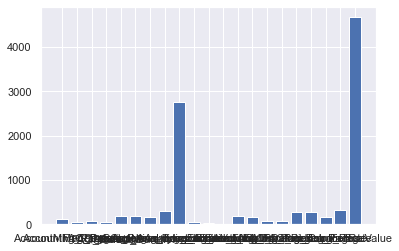

In [96]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in metric_feat], fs.scores_,)
pyplot.show()

<hr>
<a class="anchor" id="wrapper">
    
## Wrapper Methods
    
</a>

<hr>
<a class="anchor" id="RFE">
    
### RFE
    
</a>

Optimal number of features : 12
Max accuracy: 0.9015206372194062


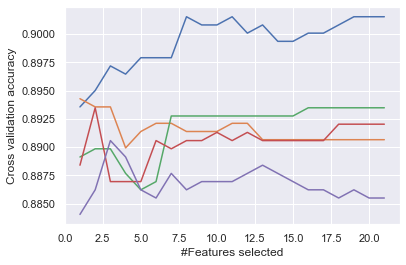

AccountMng_Pages: True
AccountMng_Duration: False
FAQ_Pages: False
FAQ_Duration: False
Product_Pages: True
Product_Duration: True
GoogleAnalytics_BounceRate: True
GoogleAnalytics_ExitRate: True
GoogleAnalytics_PageValue: True
avg_duration_account: True
avg_duration_FAQ: True
avg_duration_product: False
log_AccountMng_Duration: False
log_AccountMng_Pages: False
log_FAQ_Duration: False
log_FAQ_Pages: False
log_Product_Duration: True
log_Product_Pages: False
log_BounceRate: True
log_ExitRate: True
log_PageValue: True


In [96]:
#Doing the same using RFECV and KFold
sns.set_theme(style="white")
min_features_to_select = 1  
rfecv = RFECV(
    estimator=LogisticRegression(),
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select= min_features_to_select
)
rfecv.fit(X_train_eng[metric_feat], y_train_df)

print(f"Optimal number of features : {rfecv.n_features_}")
print(f"Max accuracy: {np.amax(rfecv.grid_scores_)}" )

# Plot features vs validation scores
plt.figure()
plt.xlabel("#Features selected")
plt.ylabel("Cross validation accuracy")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()
# update version
rfecv.grid_scores_
counter = 0
for column in metric_feat:
    print(f"{column}: {rfecv.support_[counter]}")
    counter += 1

plt.savefig(os.path.join('../techscape-ecommerce/figures', 'rfecv'), dpi=200)


In [97]:
X_train_eng[metric_feat+binary_list].columns.to_list()

['AccountMng_Pages',
 'AccountMng_Duration',
 'FAQ_Pages',
 'FAQ_Duration',
 'Product_Pages',
 'Product_Duration',
 'GoogleAnalytics_BounceRate',
 'GoogleAnalytics_ExitRate',
 'GoogleAnalytics_PageValue',
 'avg_duration_account',
 'avg_duration_FAQ',
 'avg_duration_product',
 'log_AccountMng_Duration',
 'log_AccountMng_Pages',
 'log_FAQ_Duration',
 'log_FAQ_Pages',
 'log_Product_Duration',
 'log_Product_Pages',
 'log_BounceRate',
 'log_ExitRate',
 'log_PageValue',
 'browser1',
 'browser2',
 'browser3',
 'browser4',
 'browser5',
 'browser6',
 'browser7',
 'browser8',
 'browser10',
 'browser11',
 'browser12',
 'browser13',
 'x1_Brazil',
 'x1_France',
 'x1_Germany',
 'x1_Italy',
 'x1_Other',
 'x1_Portugal',
 'x1_Spain',
 'x1_Switzerland',
 'x1_United Kingdom',
 'x2_Android',
 'x2_Chrome OS',
 'x2_Fedora',
 'x2_MacOSX',
 'x2_Other',
 'x2_Ubuntu',
 'x2_Windows',
 'x2_iOS',
 'x3_New_Access',
 'x3_Other',
 'x3_Returner',
 'traffic1',
 'traffic2',
 'traffic3',
 'traffic4',
 'traffic5',
 'traff

In [98]:
rfecv.support_

array([ True, False, False, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
        True,  True,  True])

In [99]:
binary_list

['browser1',
 'browser2',
 'browser3',
 'browser4',
 'browser5',
 'browser6',
 'browser7',
 'browser8',
 'browser10',
 'browser11',
 'browser12',
 'browser13',
 'x1_Brazil',
 'x1_France',
 'x1_Germany',
 'x1_Italy',
 'x1_Other',
 'x1_Portugal',
 'x1_Spain',
 'x1_Switzerland',
 'x1_United Kingdom',
 'x2_Android',
 'x2_Chrome OS',
 'x2_Fedora',
 'x2_MacOSX',
 'x2_Other',
 'x2_Ubuntu',
 'x2_Windows',
 'x2_iOS',
 'x3_New_Access',
 'x3_Other',
 'x3_Returner',
 'traffic1',
 'traffic2',
 'traffic3',
 'traffic4',
 'traffic5',
 'traffic6',
 'traffic7',
 'traffic8',
 'traffic9',
 'traffic10',
 'traffic11',
 'traffic12',
 'traffic13',
 'traffic14',
 'traffic15',
 'during_covid',
 'computer',
 'mobile',
 'summer',
 'autumn',
 'winter',
 'spring',
 'Traffic2_and_computer',
 'Returning_and_computer',
 'weekday',
 'weekend']

<hr>
<a class="anchor" id="forward">
    
### Forward Sequential Feature Selection
    
</a>

In [101]:

ridge_forward = Ridge()
sfs = SequentialFeatureSelector(ridge_forward, n_features_to_select=15,direction='forward')
sfs.fit(X_train_eng[metric_feat+binary_list], y_train_df)

sfs.get_support()

teste_forward=sfs.transform(X_train_eng[metric_feat+binary_list])

In [102]:
sfs.support_

array([ True, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
        True, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False])

In [103]:
selected_feat_forward = pd.Series(sfs.get_support(), index = X_train_eng[metric_feat+binary_list].columns)
pd.DataFrame(selected_feat_forward)

,0
AccountMng_Pages,True
AccountMng_Duration,False
FAQ_Pages,False
FAQ_Duration,False
Product_Pages,False
...,...
spring,False
Traffic2_and_computer,False
Returning_and_computer,False
weekday,False


In [104]:
pd.set_option('display.max_rows', 100)

pd.DataFrame(selected_feat_forward)

,0
AccountMng_Pages,True
AccountMng_Duration,False
FAQ_Pages,False
FAQ_Duration,False
Product_Pages,False
Product_Duration,True
GoogleAnalytics_BounceRate,False
GoogleAnalytics_ExitRate,False
GoogleAnalytics_PageValue,True
avg_duration_account,False


<hr>
<a class="anchor" id="forward">
    
### Backward Sequential Feature Selection
    
</a>

In [105]:
# from sklearn.feature_selection import SequentialFeatureSelector
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import Lasso

# logistic_back = Lasso()
# sfs_back = SequentialFeatureSelector(logistic_back, n_features_to_select=8,direction='backward')
# sfs_back.fit(X_train_num_min, y_train_no_out.to_list())

# sfs_back.get_support()

In [106]:
# selected_feat_back = pd.Series(sfs_back.get_support(), index = X_train_num_min.columns)
# selected_feat_back

<hr>
<a class="anchor" id="embedded">
    
## Embedded Methods
    
</a>


<hr>
<a class="anchor" id="ridge">
    
### Ridge Regression    
</a>

In [107]:
ridge = Ridge()
ridge.fit(X_train_eng[metric_feat], y_train_df)

Ridge()

In [108]:
ridge_coefs = pd.Series(ridge.coef_[0], index = X_train_eng[metric_feat].columns)
ridge_coefs

AccountMng_Pages             -0.187473
AccountMng_Duration           0.001831
FAQ_Pages                    -0.107193
FAQ_Duration                  0.185134
Product_Pages                 0.115061
Product_Duration              0.277885
GoogleAnalytics_BounceRate    0.046143
GoogleAnalytics_ExitRate     -0.032439
GoogleAnalytics_PageValue    -0.124620
avg_duration_account          0.145421
avg_duration_FAQ             -0.345882
avg_duration_product         -0.078563
log_AccountMng_Duration      -0.012602
log_AccountMng_Pages          0.044895
log_FAQ_Duration              0.002539
log_FAQ_Pages                 0.043777
log_Product_Duration         -0.123686
log_Product_Pages            -0.088450
log_BounceRate               -0.005764
log_ExitRate                 -0.191718
log_PageValue                 0.953801
dtype: float64

In [109]:
def plot_importance(coef,name):
    sns.set_theme(style="white")
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.savefig(os.path.join('../techscape-ecommerce/figures', 'ridge'), dpi=200)

    plt.show()

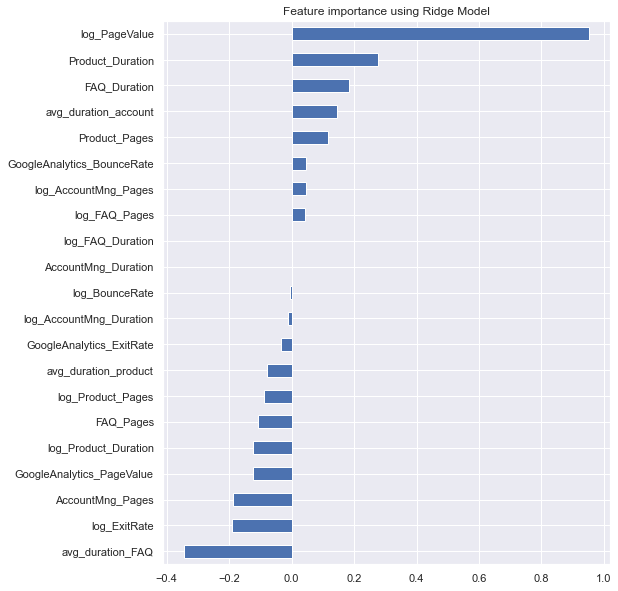

In [110]:
plot_importance(ridge_coefs,'Ridge')

<hr>
<a class="anchor" id="decision_tree_sel_feature">
    
### Decision Tree for feature importance   
</a>

In [111]:
X_train_eng[binary_list].columns

Index(['browser1', 'browser2', 'browser3', 'browser4', 'browser5', 'browser6',
       'browser7', 'browser8', 'browser10', 'browser11', 'browser12',
       'browser13', 'x1_Brazil', 'x1_France', 'x1_Germany', 'x1_Italy',
       'x1_Other', 'x1_Portugal', 'x1_Spain', 'x1_Switzerland',
       'x1_United Kingdom', 'x2_Android', 'x2_Chrome OS', 'x2_Fedora',
       'x2_MacOSX', 'x2_Other', 'x2_Ubuntu', 'x2_Windows', 'x2_iOS',
       'x3_New_Access', 'x3_Other', 'x3_Returner', 'traffic1', 'traffic2',
       'traffic3', 'traffic4', 'traffic5', 'traffic6', 'traffic7', 'traffic8',
       'traffic9', 'traffic10', 'traffic11', 'traffic12', 'traffic13',
       'traffic14', 'traffic15', 'during_covid', 'computer', 'mobile',
       'summer', 'autumn', 'winter', 'spring', 'Traffic2_and_computer',
       'Returning_and_computer', 'weekday', 'weekend'],
      dtype='object')

In [112]:
gini_importance = DecisionTreeClassifier().fit(X_train_eng[metric_feat+binary_list], y_train_df).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train_eng[metric_feat+binary_list], y_train_df).feature_importances_
gini_importance

array([9.62037839e-03, 1.89507364e-02, 1.30740985e-03, 6.95671043e-03,
       1.44243700e-02, 3.86706407e-02, 5.14059889e-02, 3.47962045e-02,
       2.21789526e-02, 2.33917105e-02, 1.45718600e-02, 4.70636110e-02,
       2.59245744e-02, 3.85796438e-02, 6.30136728e-03, 3.35419600e-03,
       3.22295069e-02, 2.26498147e-02, 2.13124294e-02, 2.79125674e-02,
       3.92166012e-01, 1.42747810e-03, 1.80547074e-03, 4.97772089e-04,
       4.23562902e-03, 1.83674725e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.12454587e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.46836013e-05, 3.10167342e-03, 1.51493522e-03,
       4.99436719e-03, 3.48723241e-03, 6.75906946e-03, 7.44503647e-03,
       1.53245562e-03, 1.14183403e-03, 1.42691078e-03, 0.00000000e+00,
       0.00000000e+00, 1.88233059e-03, 0.00000000e+00, 6.58797563e-04,
       2.30545289e-03, 2.00274428e-03, 2.96146219e-03, 0.00000000e+00,
       2.74338581e-03, 1.33542577e-03, 2.10738915e-03, 8.03710140e-03,
      

In [113]:
feat_DT=['GoogleAnalytics_PageValue','log_BounceRate','avg_duration_product','log_AccountMng_Pages']

<AxesSubplot:xlabel='Value', ylabel='Col'>

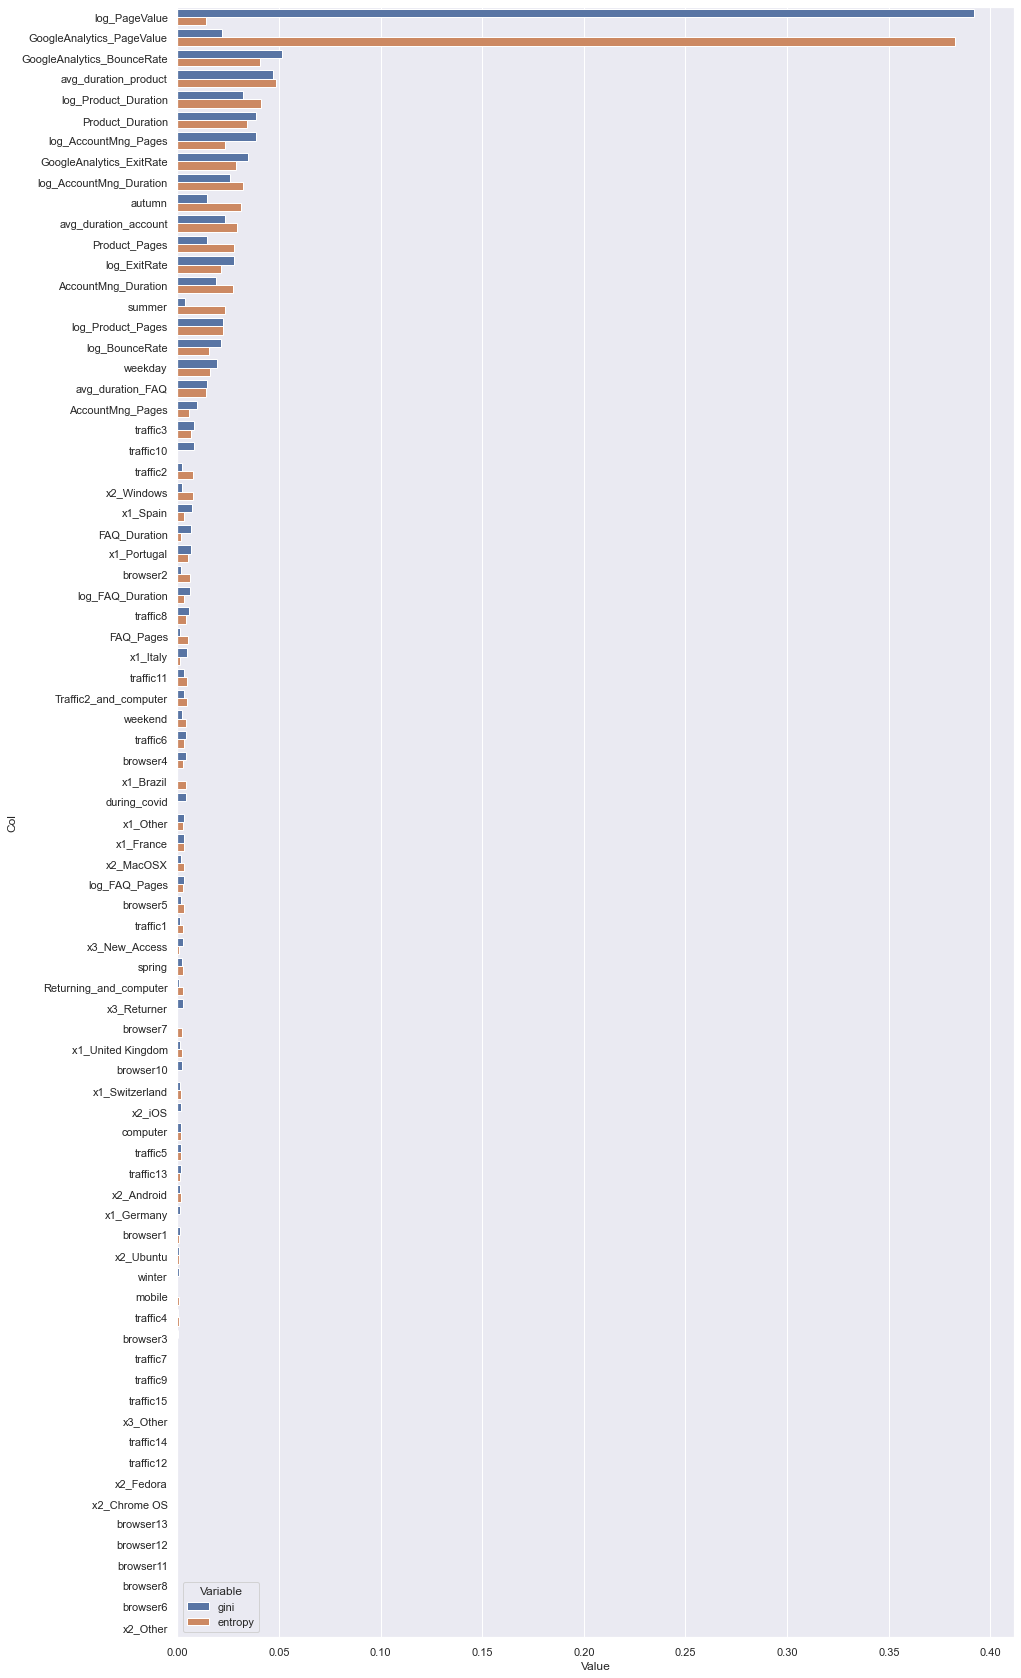

In [114]:
sns.set_theme(style="white")
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train_eng[metric_feat+binary_list].columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,30))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)
plt.savefig(os.path.join('../techscape-ecommerce/figures', 'DT_feat_eng'), dpi=200)


In [116]:
tidy[tidy['Variable'] == 'entropy'].sort_values(['Value'], ascending = False).head(20)

,Col,Variable,Value
87,GoogleAnalytics_PageValue,entropy,0.382726
90,avg_duration_product,entropy,0.048396
95,log_Product_Duration,entropy,0.041011
85,GoogleAnalytics_BounceRate,entropy,0.040442
84,Product_Duration,entropy,0.034472
91,log_AccountMng_Duration,entropy,0.032131
151,autumn,entropy,0.031502
88,avg_duration_account,entropy,0.029462
86,GoogleAnalytics_ExitRate,entropy,0.029084
83,Product_Pages,entropy,0.027940


<hr>
<a class="anchor" id="imbalanced">
    
# Check for an imbalanced dataset
    
</a>

<hr>
<a class="anchor" id="Adaptive">
    
## SMOTENC 
    
</a>

In [97]:
X_train_eng=X_train_eng.drop(non_num_feat+['weekday','month'],axis=1)
X_val_eng=X_val_eng.drop(non_num_feat+['weekday','month'],axis=1)

In [100]:
y_val_df=y_val_df.squeeze().to_list()
y_train_df=y_train_df.squeeze().to_list()

In [101]:
# from imblearn.over_sampling import ADASYN
# adasyn = ADASYN(sampling_strategy='minority', random_state=0, n_neighbors=5)
# X_train_over, y_train_over = adasyn.fit_resample(X_train_eng[metric_feat+binary_list], y_train_df.to_list())

In [102]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy='minority')
# X_train_over, y_train_over = smote.fit_resample(X_train_eng[metric_feat+binary_list], y_train_df.to_list())

## VER NUMERO BINARIAS

In [103]:

smote_nc = SMOTENC(categorical_features=range(21,69), random_state=42)
X_train_over, y_train_over = smote_nc.fit_resample(X_train_eng[metric_feat+binary_list], y_train_df)

In [104]:
# count1=0
# count0=0

# for value in y_train_over:
#     if value==1:
#         count1+=1
#     else: count0+=1
        
# print(count1,count0)

In [109]:
set1=['AccountMng_Pages','Product_Duration','log_PageValue','x3_New_Access','traffic2','during_covid']
set2=['AccountMng_Pages','Product_Duration','log_PageValue','x3_New_Access','traffic2','during_covid','GoogleAnalytics_ExitRate','log_FAQ_Pages']
set3=['AccountMng_Pages','Product_Duration','log_PageValue','x2_MacOSX','x2_Windows','during_covid','GoogleAnalytics_ExitRate','log_FAQ_Pages']

set1_no_bin=['AccountMng_Pages','Product_Duration','log_PageValue','GoogleAnalytics_ExitRate','log_FAQ_Pages']

sets=[set1, set2, set3,set1_no_bin]

large_set_new = ['log_PageValue','log_Product_Duration', 'log_AccountMng_Duration', 'GoogleAnalytics_BounceRate', 
'autumn', 'GoogleAnalytics_ExitRate', 'log_Product_Pages', 'GoogleAnalytics_PageValue', 'summer', 'weekend', 'log_AccountMng_Pages', 'avg_duration_FAQ', 'computer']

In [110]:
new_sets = [metric_feat_2methods, metric_feat_3methods, metric_feat_4methods]
old_new = [set1, set2, set3,set1_no_bin, metric_feat_2methods, metric_feat_3methods, metric_feat_4methods]

set_new1=['AccountMng_Pages','Product_Duration','log_PageValue','GoogleAnalytics_ExitRate','log_FAQ_Pages','summer','Returning_and_computer','weekend']
set_new2=['AccountMng_Pages','Product_Duration','log_PageValue','GoogleAnalytics_ExitRate','log_FAQ_Pages','Traffic2_and_computer','Returning_and_computer','winter']
sets_to_test = [set1,set2,set3,set1_no_bin, large_set_new]
sets_to_test2 = [set1,set2,set3,set1_no_bin,set_new1,set_new2]

X_train_over y_train_over; X_val_eng y_val_df

X_train_eng y_train_df; X_val_eng y_val_df

In [111]:
def metrics1(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print('Confusion Matrix:')
    print(confusion_matrix(y_val, pred_val))
    
    print('F1 Train: '+str(f1_score(y_train, pred_train)))
    print('F1 Val: '+str(f1_score(y_val, pred_val)))
    #print('ROC: '+str(roc_auc_score(y_val, pred_val,average='weighted')))

In [112]:
# def f1_train_val(y_train, pred_train , y_val, pred_val):
#     print('Train: '+str(f1_score(y_train, pred_train)))
#     print('Val: '+str(f1_score(y_val, pred_val)))

## Strafified kfold

In [113]:
# # from sklearn.metrics import roc_curve
# # from sklearn.model_selection import cross_val_predict

# def evaluate_model(model, X, y):
#     # define the evaluation procedure
#     cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#     # evaluate the model and collect the results
#     scores_f1 = cross_val_score(model, X, y, scoring=make_scorer(f1_score, average='binary'), cv=cv, n_jobs=-1)
#     scores_auc = cross_val_score(model, X, y, scoring=make_scorer(roc_auc_score), cv=cv, n_jobs=-1)
#     # log_scores2 = cross_val_predict(model, X, y, cv=cv,method='predict_proba')
#     # fpr, tpr, thresholds = roc_curve(y, log_scores2[:, 1])
#     # roc_auc = auc(fpr, tpr)
#     print('F1 score: %.3f (%.3f)' % (np.mean(scores_f1), np.std(scores_f1)))
#     print('ROC_AUC score: %.3f (%.3f)' % (np.mean(scores_auc), np.std(scores_auc)))
#     return np.mean(scores_f1), np.mean(scores_auc)

In [114]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
def evaluate_model(model, X, y):
    # define the evaluation procedure
    X = X.to_numpy()
    y=np.asarray(y)
    y_=y.astype('float')
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    aucs=[]
    tpr=[]
    roc_auc=[]
    # evaluate the model and collect the results
    for train,test in cv.split(X,y_):
        prediction = model.fit(X[train],y_[train]).predict_proba(X[test])
        fpr, tpr, t = roc_curve(y_[test], prediction[:, 1])
        
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
    scores_f1 = cross_val_score(model, X, y, scoring=make_scorer(f1_score, average='binary'), cv=cv, n_jobs=-1)
    # mean_tpr = np.mean(tprs, axis=0)
    # mean_auc = auc(mean_fpr, mean_tpr)
    #print('F1 score: %.3f (%.3f)' % (np.mean(scores_f1), np.std(scores_f1)))
    print('F1 score: %.3f (%.3f)' % (np.mean(scores_f1), np.std(scores_f1)))
    print('ROC_AUC score:' + str(np.mean(aucs)))
    return np.mean(scores_f1),(np.mean(aucs))

In [125]:
# from sklearn.metrics import roc_curve
# from sklearn.metrics import auc,precision_recall_curve
# def evaluate_model_PR(model, X, y):
#     # define the evaluation procedure
#     X = X.to_numpy()
#     y=np.asarray(y)
#     y_=y.astype('float')
#     cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#     aucs=[]
#     tprs=[]
#     tpr=[]
#     mean_tpr=[]
#     roc_auc=[]
#     aucs = []
#     mean_recall = np.linspace(0, 1, 100)
#     i = 0
#     # evaluate the model and collect the results

#     y_real = []
#     y_proba = []
#     for i, (train_index, test_index) in enumerate(cv.split(X,y_)):
#         Xtrain, Xtest = X[train_index], X[test_index]
#         ytrain, ytest = y[train_index], y[test_index]
#         model.fit(Xtrain, ytrain)
#         pred_proba = model.predict_proba(Xtest)
#         precision, recall, _ = precision_recall_curve(ytest, pred_proba[:,1])
#         lab = 'Fold %d AUC=%.4f' % (i+1, auc(recall, precision))
#         #axes[1].step(recall, precision, label=lab)
#         y_real.append(ytest)
#         y_proba.append(pred_proba[:,1])

#     y_real = np.concatenate(y_real)
#     y_proba = np.concatenate(y_proba)
#     precision, recall, _ = precision_recall_curve(y_real, y_proba)
        
    
#     scores_f1 = cross_val_score(model, X, y, scoring=make_scorer(f1_score, average='binary'), cv=cv, n_jobs=-1)
#     # mean_tpr = np.mean(tprs, axis=0)
#     # mean_auc = auc(mean_fpr, mean_tpr)
#     #print('F1 score: %.3f (%.3f)' % (np.mean(scores_f1), np.std(scores_f1)))
#     print('F1 score: %.3f (%.3f)' % (np.mean(scores_f1), np.std(scores_f1)))
#     print('ROC_PR score:' + str(auc(recall, precision)))
#     return np.mean(scores_f1),auc(recall, precision)



<hr>
<a class="anchor" id="DT">
    
## Decision Tree
    
</a>

#### DT WITHOUT OVERSAMPLING

#### Dataset with outliers for DT

In [115]:
#min_samples_split=[200,300,350,400,450,500,550,600]

for i in sets_to_test2:
    print('set: '+str(i))
    dt_out = DecisionTreeClassifier(splitter = 'random',class_weight='balanced', min_samples_split=500, criterion='gini').fit(X_train_out_robust[i], y_train_out)
    metrics1(y_train_out, dt_out.predict(X_train_out_robust[i]), y_val_out, dt_out.predict(X_val_out_robust[i]))


set: ['AccountMng_Pages', 'Product_Duration', 'log_PageValue', 'x3_New_Access', 'traffic2', 'during_covid']
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5913
           1       0.56      0.81      0.66      1086

    accuracy                           0.87      6999
   macro avg       0.76      0.85      0.79      6999
weighted avg       0.90      0.87      0.88      6999

Confusion Matrix:
[[5234  679]
 [ 208  878]]
___________________________________________________________________________________________________________
                                                VALIDATION                              

In [116]:
print('Scores with New_sets list')
for i in range(len(new_sets)):
    print('set: '+str(i))
    dt_out = DecisionTreeClassifier(splitter = 'random',class_weight='balanced', min_samples_split=500, criterion='gini').fit(X_train_out_robust[new_sets[i]], y_train_out)
    metrics1(y_train_out, dt_out.predict(X_train_out_robust[new_sets[i]]), y_val_out, dt_out.predict(X_val_out_robust[new_sets[i]]))

Scores with New_sets list
set: 0
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      5913
           1       0.55      0.82      0.66      1086

    accuracy                           0.87      6999
   macro avg       0.76      0.85      0.79      6999
weighted avg       0.90      0.87      0.88      6999

Confusion Matrix:
[[5180  733]
 [ 196  890]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-------------------------------------------------------

In [117]:
dt_out = DecisionTreeClassifier(splitter = 'random', min_samples_split=500,class_weight='balanced', criterion='gini',random_state=4).fit(X_train_out_robust[set1], y_train_out)

In [118]:
metrics1(y_train_out, dt_out.predict(X_train_out_robust[set1]) , y_val_out, dt_out.predict(X_val_out_robust[set1]))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5913
           1       0.57      0.81      0.67      1086

    accuracy                           0.87      6999
   macro avg       0.76      0.85      0.79      6999
weighted avg       0.90      0.87      0.88      6999

Confusion Matrix:
[[5247  666]
 [ 210  876]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [110]:
f1_dt_out,auc_dt_out=evaluate_model(DecisionTreeClassifier(splitter = 'random', min_samples_split=500, class_weight='balanced', criterion='gini',random_state=4), X_train_out[set1], y_train_out)

F1 score: 0.645 (0.037)
ROC_AUC score:0.8980586940623801


#### dataset without outliers

In [119]:
min_samples_split=[200,300,350,400,450,500,550,600]
for i in sets_to_test2:
    print('set: '+str(i))
    dt = DecisionTreeClassifier(splitter = 'random', class_weight='balanced', min_samples_split=450, criterion='gini',random_state=42).fit(X_train_eng[i], y_train_df)
    metrics1(y_train_df, dt.predict(X_train_eng[i]) , y_val_df, dt.predict(X_val_eng[i]))

set: ['AccountMng_Pages', 'Product_Duration', 'log_PageValue', 'x3_New_Access', 'traffic2', 'during_covid']
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      5849
           1       0.54      0.83      0.65      1053

    accuracy                           0.86      6902
   macro avg       0.75      0.85      0.78      6902
weighted avg       0.90      0.86      0.87      6902

Confusion Matrix:
[[5094  755]
 [ 184  869]]
___________________________________________________________________________________________________________
                                                VALIDATION                              

In [120]:
dt = DecisionTreeClassifier(splitter = 'random', min_samples_split=450,class_weight='balanced', criterion='gini',random_state=4).fit(X_train_eng[set1_no_bin], y_train_df)
model_DT=DecisionTreeClassifier(splitter = 'random', min_samples_split=450,class_weight='balanced', criterion='gini',random_state=4)

In [121]:
metrics1(y_train_df, dt.predict(X_train_eng[set1_no_bin]) , y_val_df, dt.predict(X_val_eng[set1_no_bin]))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5849
           1       0.57      0.80      0.66      1053

    accuracy                           0.88      6902
   macro avg       0.77      0.85      0.79      6902
weighted avg       0.90      0.88      0.89      6902

Confusion Matrix:
[[5211  638]
 [ 211  842]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [122]:
#k-fold
f1_DT,auc_dt=evaluate_model(DecisionTreeClassifier(splitter = 'random', min_samples_split=450, class_weight='balanced', criterion='gini',random_state=4), X_train_eng[set1_no_bin], y_train_df)

F1 score: 0.653 (0.028)
ROC_AUC score:0.8957540066195512


In [147]:
labels_DT = dt.predict(X_test_eng[set1_no_bin])
labels_DT_df = pd.DataFrame(labels_DT)
kaggle_DT = pd.DataFrame(X_test_eng.index)
kaggle_DT

,Access_ID
0,798519314
1,798663101
2,798663221
3,798760918
4,798856982
...,...
2295,962042726
2296,962063064
2297,962147749
2298,962182167


In [148]:
kaggle_DT = pd.concat([kaggle_DT["Access_ID"], labels_DT_df[0]],axis=1)
kaggle_DT["Buy"] = kaggle_DT[0]
kaggle_DT = kaggle_DT.drop(columns=[0])
kaggle_DT.set_index('Access_ID',inplace=True,drop=True)
kaggle_DT.value_counts()

Buy
0      1813
1       487
dtype: int64

In [149]:
kaggle_DT=kaggle_DT.astype(int)

In [150]:
file_name = 'kagGleDT.csv'
  
# saving the excel
kaggle_DT.to_csv(file_name)

#### DT WITH OVERSAMPLING

In [132]:
for i in min_samples_split:
    print('set: '+str(i))
    dt_over = DecisionTreeClassifier(splitter = 'random', min_samples_split=i, criterion='gini').fit(X_train_over[set1_no_bin], y_train_over)
    metrics1(y_train_over, dt_over.predict(X_train_over[set1_no_bin]) , y_val_df, dt_over.predict(X_val_eng[set1_no_bin]))

set: 200
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      5849
           1       0.89      0.90      0.89      5849

    accuracy                           0.89     11698
   macro avg       0.89      0.89      0.89     11698
weighted avg       0.89      0.89      0.89     11698

Confusion Matrix:
[[5202  647]
 [ 593 5256]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-------------------------------------------------------------------------------

In [133]:
dt_over = DecisionTreeClassifier(splitter = 'random',criterion='gini',min_samples_split=400,random_state=42).fit(X_train_over[set1_no_bin], y_train_over)

In [134]:
metrics1(y_train_over, dt_over.predict(X_train_over[set1_no_bin]) , y_val_df, dt_over.predict(X_val_eng[set1_no_bin]))
# it is overfitting

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5849
           1       0.89      0.88      0.89      5849

    accuracy                           0.89     11698
   macro avg       0.89      0.89      0.89     11698
weighted avg       0.89      0.89      0.89     11698

Confusion Matrix:
[[5203  646]
 [ 675 5174]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

<hr>
<a class="anchor" id="NN">
    
## Neural Network
    
</a>

In [328]:
len(X_train_eng.columns)


80

In [136]:
for i in range(len(sets_to_test2)):
    
    print(f'Scores using Set {i+1}')

    neural_network = MLPClassifier(max_iter=100).fit(X_train_eng[sets_to_test2[i]], y_train_df)
    
    predictions_train = neural_network.predict(X_train_eng[sets_to_test2[i]])
    predictions_val = neural_network.predict(X_val_eng[sets_to_test2[i]])
    
    metrics1(y_train_df, predictions_train , y_val_df, predictions_val)

Scores using Set 1
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5849
           1       0.70      0.56      0.62      1053

    accuracy                           0.90      6902
   macro avg       0.81      0.76      0.78      6902
weighted avg       0.89      0.90      0.89      6902

Confusion Matrix:
[[5598  251]
 [ 467  586]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

KeyError: "['weekday'] not in index"

### Oversampling

In [155]:
# for i in range(len(sets)):
    
#     print(f'Scores using Set {i+1}')

#     neural_network = MLPClassifier(hidden_layer_sizes = 2).fit(X_train_over[sets[i]], y_train_over)
    
#     predictions_train_over = neural_network.predict(X_train_over[sets[i]])
#     predictions_val_over = neural_network.predict(X_val_eng[sets[i]])

#     metrics1(y_train_over, predictions_train_over , y_val_df, predictions_val_over)

In [156]:
# neural_network = MLPClassifier(max_iter = 1000).fit(X_train_over[set2], y_train_over)

In [157]:
# metrics1(y_train_over, neural_network.predict(X_train_over[set3]), y_val_df, neural_network.predict(X_val_eng[set3]))

In [158]:
#for i in range(len(sets)):
    
    # print(f'Scores using Set {i+1}')

     #neural_network = MLPClassifier(hidden_layer_sizes = (10,10)).fit(X_train_eng[sets[i]], y_train_df)
    
     #predictions_train = neural_network.predict(X_train_eng[sets[i]])
     #predictions_val = neural_network.predict(X_val_eng[sets[i]])

     #metrics1(y_train_df, predictions_train , y_val_df, predictions_val)

### No oversampling

Neural networks gridsearch for imbalanced dataset

In [159]:
mlp = MLPClassifier(random_state = 42)

In [330]:
 parameter_space = {
     'hidden_layer_sizes': [(12,12), (12,12,12), (10,10,10), (10,10),(5,5),(5,5,5)],
     'activation': ['tanh', 'relu', 'logistic'],
     'solver': ['adam', 'lbfgs', 'sgd'],
     'alpha': [0.1, 0.001, 0.01, 0.0001,0.005],
     'learning_rate': ['adaptive', 'invscaling'],
     'max_iter' : [100,250,500,750]
 }

In [331]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3,scoring=make_scorer(f1_score, average='binary'))
clf.fit(X_train_eng[large_set_new], y_train_df)
clf.predict(X_train_eng[large_set_new])
clf.predict(X_val_eng[large_set_new])

array([0, 1, 0, ..., 0, 0, 0])

In [333]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

print('---------------------------------------------------------------------------------------------------------------------')
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'adam'}
---------------------------------------------------------------------------------------------------------------------
0.627 (+/-0.011) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}
0.626 (+/-0.015) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'lbfgs'}
0.576 (+/-0.062) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'sgd'}
0.626 (+/-0.012) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'adam'}
0.624 (+/-0.035) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (12, 12), 'learning

In [ ]:
# DANIEL
neural_network_reg = MLPClassifier(random_state = 42, activation = 'logistic', alpha = 0.001, hidden_layer_sizes = (12,12,12), learning_rate = 'adaptive', solver = 'adam', max_iter = 500).fit(X_train_eng[set3], y_train_df)

In [ ]:
neural_network_nobin = MLPClassifier(random_state = 42, activation = 'logistic', alpha = 0.001, hidden_layer_sizes = (10, 10, 10), learning_rate = 'adaptive', max_iter = 500, solver = 'adam').fit(X_train_eng[set1_no_bin], y_train_df)

In [ ]:
neural_network_large_set = MLPClassifier(random_state = 42, activation = 'logistic', alpha = 0.001, hidden_layer_sizes=(12,12,12), learning_rate='adaptive', max_iter = 500, solver = 'adam').fit(X_train_eng[large_set_new], y_train_df)

In [ ]:
f1_nn, auc_nn = evaluate_model(neural_network_reg, X_train_eng[set3], y_train_df)

F1 score: 0.649 (0.041)
ROC_AUC score:0.8998176328727289


In [ ]:
f1_nn_nb, auc_nn_nb = evaluate_model(neural_network_nobin, X_train_eng[set1_no_bin], y_train_df)

F1 score: 0.654 (0.038)
ROC_AUC score:0.8863077076398994


In [ ]:
f1_nn_ld, auc_nn_ld = evaluate_model(neural_network_large_set, X_train_eng[large_set_new], y_train_df)

F1 score: 0.648 (0.047)
ROC_AUC score:0.9140412026022219


In [479]:
# DANIEL
neural_network_reg = MLPClassifier(random_state = 42, activation = 'logistic', alpha = 0.001, hidden_layer_sizes = (12,12,12), learning_rate = 'adaptive', solver = 'adam', max_iter = 500).fit(X_train_eng[set3], y_train_df)

In [480]:
f1_nn, auc_nn = evaluate_model(neural_network_reg, X_train_eng[set3], y_train_df)

F1 score: 0.651 (0.039)
ROC_AUC score:0.8860430875520046


In [336]:
labels_NN_reg = neural_network_reg.predict(X_test_eng[large_set_new])

labels_NN_df_reg = pd.DataFrame(labels_NN_reg)

kaggle_NN_reg = pd.DataFrame(X_test_eng.index)

kaggle_NN_reg = pd.concat([kaggle_NN_reg["Access_ID"], labels_NN_df_reg[0]],axis=1)
kaggle_NN_reg["Buy"] = kaggle_NN_reg[0]
kaggle_NN_reg = kaggle_NN_reg.drop(columns=[0])

kaggle_NN_reg.set_index('Access_ID',inplace=True,drop=True)

kaggle_NN_reg.value_counts()

kaggle_NN_reg = kaggle_NN_reg.astype(int)

file_name = 'kagGleNN_reg.csv'
  
# saving the excel
kaggle_NN_reg.to_csv(file_name)

In [166]:
#neural_network_reg1 = MLPClassifier(random_state = 42, activation = 'logistic', alpha = 0.001, hidden_layer_sizes = (10,10,10), learning_rate = 'adaptive', solver = 'adam', max_iter = 500).fit(X_train_eng[set2], y_train_df)

In [167]:
#metrics1(y_train_df, neural_network_reg1.predict(X_train_eng[set2]), y_val_df, neural_network_reg1.predict(X_val_eng[set2]))

In [168]:
# labels_NN_reg1 = neural_network_reg1.predict(X_test_eng[set1])

# labels_NN_df_reg1 = pd.DataFrame(labels_NN_reg1)

# kaggle_NN_reg1 = pd.DataFrame(X_test_eng.index)

# kaggle_NN_reg1 = pd.concat([kaggle_NN_reg1["Access_ID"], labels_NN_df_reg1[0]],axis=1)
# kaggle_NN_reg1["Buy"] = kaggle_NN_reg1[0]
# kaggle_NN_reg1 = kaggle_NN_reg1.drop(columns=[0])

# kaggle_NN_reg1.set_index('Access_ID',inplace=True,drop=True)

# kaggle_NN_reg1.value_counts()

# kaggle_NN_reg1 = kaggle_NN_reg1.astype(int)

# file_name = 'kagGleNN_reg1.csv'
  
# # saving the excel
# kaggle_NN_reg1.to_csv(file_name)

Neural network gridsearch oversampling

In [169]:
#mlp_over = MLPClassifier(random_state = 42)

In [170]:
# parameter_space = {
#     'hidden_layer_sizes': [(12,12), (12,12,12), (15,12,12), (12,15,12)],
#     'activation': ['tanh', 'relu', 'logistic'],
#     'solver': ['adam', 'lbfgs', 'sgd'],
#     'alpha': [0.0001, 0.001, 0.00001],
#     'learning_rate': ['adaptive', 'invscaling'],
# }

In [171]:
#clf = GridSearchCV(mlp_over, parameter_space, n_jobs=-1, cv=3)
#clf.fit(X_train_over[set2], y_train_over)
#clf.predict(X_train_over[set2])
#clf.predict(X_val_eng[set2])

In [172]:
## Best parameter set
#print('Best parameters found:\n', clf.best_params_)

#print('---------------------------------------------------------------------------------------------------------------------')
## All results
#means = clf.cv_results_['mean_test_score']
#stds = clf.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [173]:
#neural_network_over = MLPClassifier(random_state = 42, activation= 'tanh', alpha= 1e-05, hidden_layer_sizes= (12, 12), learning_rate= 'adaptive', solver= 'lbfgs').fit(X_train_over[set2], y_train_over)

### Neural Network Outliers 

In [ ]:
mlp_out = MLPClassifier(random_state = 42)

In [ ]:
 parameter_space = {
     'hidden_layer_sizes': [(12,12), (12,12,12), (10,10,10), (10,10),(5,5),(5,5,5)],
     'activation': ['tanh', 'relu', 'logistic'],
     'solver': ['adam', 'lbfgs', 'sgd'],
     'alpha': [0.1, 0.001, 0.01, 0.0001,0.005],
     'learning_rate': ['adaptive', 'invscaling'],
     'max_iter' : [100,250,500,750]
 }

In [ ]:
clf_out = GridSearchCV(mlp_out, parameter_space, n_jobs=-1, cv=3,scoring=make_scorer(f1_score, average='binary'))
clf_out.fit(X_train_out_robust[large_set_new], y_train_out)
clf_out.predict(X_train_out_robust[large_set_new])
clf_out.predict(X_val_out_robust[large_set_new])

KeyboardInterrupt: 

In [ ]:
# Best parameter set
print('Best parameters found:\n', clf_out.best_params_)

print('---------------------------------------------------------------------------------------------------------------------')
# All results
means = clf_out.cv_results_['mean_test_score']
stds = clf_out.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_out.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}
---------------------------------------------------------------------------------------------------------------------
0.647 (+/-0.023) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}
0.628 (+/-0.034) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'lbfgs'}
0.633 (+/-0.014) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'sgd'}
0.639 (+/-0.031) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'adam'}
0.584 (+/-0.034) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (12, 12), 'learning

In [ ]:
neural_network_out = MLPClassifier(random_state = 42, activation = 'logistic', alpha = 0.001, hidden_layer_sizes=(10,10,10), learning_rate = 'adaptive', max_iter = 100, solver = 'adam').fit(X_train_out_robust[large_set_new], y_train_out)

In [ ]:
labels_NN_out = neural_network_out.predict(X_test_robust[large_set_new])

labels_NN_df_out = pd.DataFrame(labels_NN_out)

kaggle_NN_out = pd.DataFrame(X_test_robust.index)

kaggle_NN_out = pd.concat([kaggle_NN_out["Access_ID"], labels_NN_df_out[0]],axis=1)
kaggle_NN_out["Buy"] = kaggle_NN_out[0]
kaggle_NN_out = kaggle_NN_out.drop(columns=[0])

kaggle_NN_out.set_index('Access_ID',inplace=True,drop=True)

kaggle_NN_out.value_counts()

kaggle_NN_out = kaggle_NN_out.astype(int)

file_name = 'kagGleNN_out.csv'
  
# saving the excel
kaggle_NN_out.to_csv(file_name)

<hr>
<a class="anchor" id="LR">
    
## Logistic Regression
    
</a>

### Without oversampling

In [124]:
print('Scores with Sets list')
for i in range(len(sets_to_test2)):
    
    print(f'Scores using Set {i+1}')

    logistic_regression = LogisticRegression(class_weight='balanced').fit(X_train_eng[sets_to_test2[i]], y_train_df)
    
    predict_train_log = logistic_regression.predict(X_train_eng[sets_to_test2[i]])
    predict_val_log = logistic_regression.predict(X_val_eng[sets_to_test2[i]])
    
    
    metrics1(y_train_df, predict_train_log , y_val_df, predict_val_log)

Scores with Sets list
Scores using Set 1
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5849
           1       0.56      0.78      0.65      1053

    accuracy                           0.87      6902
   macro avg       0.76      0.84      0.79      6902
weighted avg       0.90      0.87      0.88      6902

Confusion Matrix:
[[5214  635]
 [ 233  820]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------

In [127]:
logistic_regression = LogisticRegression(class_weight='balanced').fit(X_train_eng[set_new2], y_train_df)
    
predict_train_log = logistic_regression.predict(X_train_eng[set_new2])
predict_val_log = logistic_regression.predict(X_val_eng[set_new2])
    
    
metrics1(y_train_df, predict_train_log , y_val_df, predict_val_log)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5849
           1       0.57      0.78      0.66      1053

    accuracy                           0.88      6902
   macro avg       0.76      0.84      0.79      6902
weighted avg       0.90      0.88      0.88      6902

Confusion Matrix:
[[5222  627]
 [ 232  821]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [129]:
evaluate_model(LogisticRegression(class_weight='balanced'), X_train_eng[set_new2], y_train_df)

F1 score: 0.658 (0.025)
ROC_AUC score:0.901367693212722


#### Grid Search

In [130]:
model = LogisticRegression(class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

In [131]:
search = GridSearchCV(model, space, scoring = make_scorer(f1_score, average='binary'), n_jobs=-1, cv=cv)
result = search.fit(X_train_eng[set_new2], y_train_df)
# summarize result
print('Best Score: %s' % result.best_score_)
print('----------------------------------------------')
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6640667416840748
----------------------------------------------
Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


#### Logistic Regression with Optimized Hyperparameters

In [132]:
log_reg_gs = LogisticRegression(C = 0.01, penalty = 'l1', solver = 'liblinear', class_weight='balanced').fit(X_train_eng[set_new2], y_train_df)
    
pred_train_log_gs = log_reg_gs.predict(X_train_eng[set_new2])
pred_val_log_gs = log_reg_gs.predict(X_val_eng[set_new2])
    
    
metrics1(y_train_df, pred_train_log_gs , y_val_df, pred_val_log_gs)


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      5849
           1       0.58      0.77      0.66      1053

    accuracy                           0.88      6902
   macro avg       0.77      0.84      0.80      6902
weighted avg       0.90      0.88      0.89      6902

Confusion Matrix:
[[5264  585]
 [ 238  815]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

#### Changing the threshold

F1-score with 0.0 threshold: 0.2647391577624135
F1-score with 0.01 threshold: 0.2647391577624135
F1-score with 0.02 threshold: 0.2647391577624135
F1-score with 0.03 threshold: 0.2647391577624135
F1-score with 0.04 threshold: 0.2647391577624135
F1-score with 0.05 threshold: 0.2647391577624135
F1-score with 0.06 threshold: 0.2647391577624135
F1-score with 0.07 threshold: 0.2647391577624135
F1-score with 0.08 threshold: 0.2647391577624135
F1-score with 0.09 threshold: 0.2647391577624135
F1-score with 0.1 threshold: 0.2647391577624135
F1-score with 0.11 threshold: 0.2647391577624135
F1-score with 0.12 threshold: 0.2647391577624135
F1-score with 0.13 threshold: 0.2647391577624135
F1-score with 0.14 threshold: 0.2647391577624135
F1-score with 0.15 threshold: 0.2647391577624135
F1-score with 0.16 threshold: 0.2647391577624135
F1-score with 0.17 threshold: 0.2647391577624135
F1-score with 0.18 threshold: 0.2647391577624135
F1-score with 0.19 threshold: 0.26702168124762266
F1-score with 0.2 thr

Text(0, 0.5, 'F1-score')

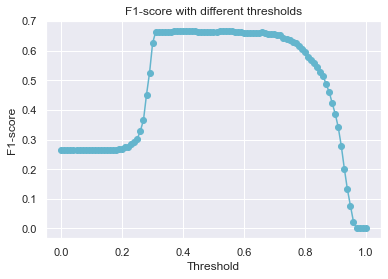

In [133]:
clf = LogisticRegression(C = 0.01, penalty = 'l1', solver = 'liblinear', class_weight='balanced')
clf.fit(X_train_eng[set_new2], y_train_df)

f1_scores = []
max_f1 = 0
best_threshold = 0
for i in arange(0, 1.01, 0.01):
      preds = np.where(clf.predict_proba(X_train_eng[set_new2])[:,1] > i, 1, 0)
      f1_scores.append(f1_score(y_train_df, preds))
      print(f'F1-score with {i} threshold: {f1_score(y_train_df, preds)}')
      if f1_score(y_train_df, preds) > max_f1:
            max_f1 = f1_score(y_train_df, preds)
            best_threshold = i

print(f'Best F1-score: {max_f1} (with {best_threshold} threshold)')
plt.plot(arange(0,1.01,0.01), f1_scores, color ='c', marker='o')
plt.title('F1-score with different thresholds')
plt.xlabel('Threshold')
plt.ylabel('F1-score')


In [135]:
clf = LogisticRegression(C = 0.01, penalty = 'l1', solver = 'liblinear', class_weight={0:1,1:5.6})
clf.fit(X_train_eng[set_new2], y_train_df)
THRESHOLD = 0.55
preds = np.where(clf.predict_proba(X_test_eng[set_new2])[:,1] > THRESHOLD, 1, 0)

In [136]:
preds_train = np.where(clf.predict_proba(X_train_eng[set_new2])[:,1] > THRESHOLD, 1, 0)
preds_val = np.where(clf.predict_proba(X_val_eng[set_new2])[:,1] > THRESHOLD, 1, 0)

metrics1(y_train_df, preds_train , y_val_df, preds_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      5849
           1       0.59      0.76      0.66      1053

    accuracy                           0.88      6902
   macro avg       0.77      0.83      0.80      6902
weighted avg       0.90      0.88      0.89      6902

Confusion Matrix:
[[5289  560]
 [ 253  800]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [138]:
df_threshold = pd.DataFrame(preds)
df_threshold

,0
0,0
1,0
2,0
3,0
4,0
...,...
2295,0
2296,0
2297,1
2298,0


In [139]:
df_threshold.value_counts()

0    1848
1     452
dtype: int64

In [140]:
kaggle_log_threshold = pd.DataFrame(X_test_eng.index)
kaggle_log_threshold

,Access_ID
0,798519314
1,798663101
2,798663221
3,798760918
4,798856982
...,...
2295,962042726
2296,962063064
2297,962147749
2298,962182167


In [141]:
kaggle_log_threshold = pd.concat([kaggle_log_threshold["Access_ID"], df_threshold[0]],axis = 1)
kaggle_log_threshold["Buy"] = kaggle_log_threshold[0]
kaggle_log_threshold = kaggle_log_threshold.drop(columns = [0])
kaggle_log_threshold.set_index('Access_ID', inplace = True,drop = True)
kaggle_log_threshold

,Buy
Access_ID,
798519314,0
798663101,0
798663221,0
798760918,0
798856982,0
...,...
962042726,0
962063064,0
962147749,1


In [142]:
kaggle_log_threshold = kaggle_log_threshold.astype(int)
file_name = 'kaggle_logistic_threshold_gs.csv'
  
# saving the excel
kaggle_log_threshold.to_csv(file_name)

#### Dataset with outliers

GridSearch

In [143]:
model = LogisticRegression(class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

In [144]:
search = GridSearchCV(model, space, scoring = make_scorer(f1_score, average='binary'), n_jobs=-1, cv=cv)
result = search.fit(X_train_out_robust[set_new2], y_train_out)
# summarize result
print('Best Score: %s' % result.best_score_)
print('----------------------------------------------')
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6641610770738733
----------------------------------------------
Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


#### Logistic Regression with Optimized Hyperparameters

Best threshold:

F1-score with 0.0 threshold: 0.2686456400742115
F1-score with 0.01 threshold: 0.2686456400742115
F1-score with 0.02 threshold: 0.2686456400742115
F1-score with 0.03 threshold: 0.2686456400742115
F1-score with 0.04 threshold: 0.2686456400742115
F1-score with 0.05 threshold: 0.2826597131681878
F1-score with 0.06 threshold: 0.2830656743700222
F1-score with 0.07 threshold: 0.28395546823837586
F1-score with 0.08 threshold: 0.28530069746019215
F1-score with 0.09 threshold: 0.2869242985706723
F1-score with 0.1 threshold: 0.288031914893617
F1-score with 0.11 threshold: 0.2891888280101564
F1-score with 0.12 threshold: 0.29015821936175923
F1-score with 0.13 threshold: 0.2960328317373462
F1-score with 0.14 threshold: 0.2995704586393238
F1-score with 0.15 threshold: 0.3018867924528301
F1-score with 0.16 threshold: 0.3044826614040034
F1-score with 0.17 threshold: 0.309062185839437
F1-score with 0.18 threshold: 0.313028271640921
F1-score with 0.19 threshold: 0.31642941874258596
F1-score with 0.2 thr

Text(0, 0.5, 'F1-score')

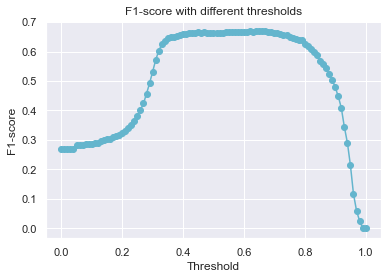

In [145]:
clf = LogisticRegression(C = 0.01, penalty = 'l1', solver = 'liblinear', class_weight='balanced')
clf.fit(X_train_out_robust[set_new2], y_train_out)

f1_scores = []
max_f1 = 0
best_threshold = 0
for i in arange(0, 1.01, 0.01):
      preds = np.where(clf.predict_proba(X_train_out_robust[set_new2])[:,1] > i, 1, 0)
      f1_scores.append(f1_score(y_train_out, preds))
      print(f'F1-score with {i} threshold: {f1_score(y_train_out, preds)}')
      if f1_score(y_train_out, preds) > max_f1:
            max_f1 = f1_score(y_train_out, preds)
            best_threshold = i

print(f'Best F1-score: {max_f1} (with {best_threshold} threshold)')
plt.plot(arange(0,1.01,0.01), f1_scores, color ='c', marker='o')
plt.title('F1-score with different thresholds')
plt.xlabel('Threshold')
plt.ylabel('F1-score')


In [146]:
clf = LogisticRegression(C = 0.01, penalty = 'l1', solver = 'liblinear', class_weight='balanced')
clf.fit(X_train_out_robust[set_new2], y_train_out)
THRESHOLD = 0.66
preds = np.where(clf.predict_proba(X_test_robust[set_new2])[:,1] > THRESHOLD, 1, 0)

In [147]:
preds_train_out = np.where(clf.predict_proba(X_train_out_robust[set_new2])[:,1] > THRESHOLD, 1, 0)
preds_val_out = np.where(clf.predict_proba(X_val_out_robust[set_new2])[:,1] > THRESHOLD, 1, 0)

metrics1(y_train_out, preds_train_out , y_val_out, preds_val_out)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      5913
           1       0.61      0.75      0.67      1086

    accuracy                           0.89      6999
   macro avg       0.78      0.83      0.80      6999
weighted avg       0.90      0.89      0.89      6999

Confusion Matrix:
[[5391  522]
 [ 275  811]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [375]:
df_threshold = pd.DataFrame(preds)
df_threshold

,0
0,0
1,0
2,0
3,0
4,0
...,...
2295,0
2296,0
2297,1
2298,0


In [376]:
df_threshold.value_counts()

0    1836
1     464
dtype: int64

In [377]:
kaggle_log_out = pd.DataFrame(X_test_robust.index)
kaggle_log_out = pd.concat([kaggle_log_out["Access_ID"], df_threshold[0]],axis = 1)
kaggle_log_out["Buy"] = kaggle_log_out[0]
kaggle_log_out = kaggle_log_out.drop(columns = [0])
kaggle_log_out.set_index('Access_ID', inplace = True,drop = True)
kaggle_log_out

,Buy
Access_ID,
798519314,0
798663101,0
798663221,0
798760918,0
798856982,0
...,...
962042726,0
962063064,0
962147749,1


In [378]:
kaggle_log_out = kaggle_log_out.astype(int)
file_name = 'kaggle_logistic_out2.csv'
  
# saving the excel
kaggle_log_out.to_csv(file_name)

<hr>
<a class="anchor" id="KNN">
    
## KNN 
    
</a>

In [150]:
#Dropping unnecessary variables
# knn_features = set3

# knn_features.remove("during_covid")
# knn_features.remove("during_covid")
# knn_features.remove("during_covid")

#Oversampled X alteration       
X_train_over_knn = X_train_over[set1_no_bin]
X_val_eng_knn = X_val_eng[set1_no_bin]

#Non-oversampled X alteration
X_train_eng_knn = X_train_eng[set1_no_bin]
X_val_eng_knn = X_val_eng[set1_no_bin]

In [153]:
#GridSearch for oversampled data

f1 = make_scorer(f1_score, average='binary')

grid_params = {
    "n_neighbors": np.arange(1,16,2),
    "weights": ["uniform", "distance"],
    "algorithm": ["kd_tree", "brute", "ball_tree"],
    "metric": ["euclidean", "manhattan"],
    "leaf_size": [1,2,3,4,5,6,7,8]
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv = 5,
    n_jobs= -1,
    scoring = f1,
)

gs_results = gs.fit(X_train_over_knn, y_train_over)

print("****************************************************")
print(f"Best Score:{gs_results.best_score_}")
print("****************************************************")
print(f"Best Results:{gs_results.best_params_}")
print("****************************************************")
print(f"Scorer:{gs_results.scorer_}")

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


KeyboardInterrupt: 

In [382]:
#GridSearch for non_oversampled data

from sklearn.model_selection import GridSearchCV

f1 = make_scorer(f1_score , average='binary')

grid_params = {
    "n_neighbors": np.arange(1,16,2),
    "weights": ["uniform", "distance"],
    "algorithm": ["kd_tree", "brute", "ball_tree"],
    "metric": ["euclidean", "manhattan"],
    "leaf_size": [1,2,3,4,5,6,7,8]
}

gs_1 = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv = 5,
    n_jobs= -1,
    scoring = f1
)

gs_1_results = gs_1.fit(X_train_eng_knn, y_train_df)

print("****************************************************")
print(f"Best Score:{gs_1_results.best_score_}")
print("****************************************************")
print(f"Best Results:{gs_1_results.best_params_}")
print("****************************************************")
print(f"Scorer:{gs_1_results.scorer_}")

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
****************************************************
Best Score:0.6329022513661029
****************************************************
Best Results:{'algorithm': 'kd_tree', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
****************************************************
Scorer:make_scorer(f1_score, average=binary)


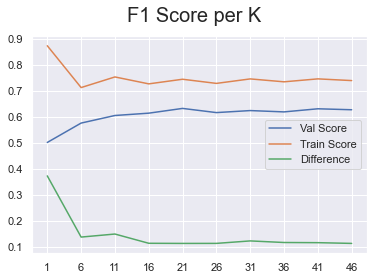

In [157]:
#Creating model based on results from GridSearch

nKrange = np.arange(1,50,5)

val_score_list = []
train_score_list = []
difference_list = []

for k in nKrange:
    # instantiate the model
    knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size=1, metric='manhattan',n_neighbors=k, weights="uniform")

    # fit the model to the training set
    knn.fit(X_train_eng_knn, y_train_df)

    #Predicting values
    y_pred_val = knn.predict(X_val_eng_knn)
    y_pred_train = knn.predict(X_train_over_knn)

    #F1 Scores 
    val_score = f1_score(y_val_df, y_pred_val)
    train_score = f1_score(y_train_over, y_pred_train)
    difference = train_score - val_score

    #Appending to lists
    val_score_list.append(val_score)
    train_score_list.append(train_score)
    difference_list.append(difference)

fig = plt.figure()
fig.suptitle('F1 Score per K', fontsize=20)
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(nKrange, val_score_list, label = 'Val Score')
plt.plot(nKrange, train_score_list, label = 'Train Score')
plt.plot(nKrange, difference_list, label = "Difference")
plt.xticks(nKrange)
plt.legend()
plt.show()

In [165]:
#Instantiating final model
final_knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size=1, metric='manhattan',n_neighbors=46)

#Fitting model
final_knn.fit(X_train_eng_knn, y_train_df)

#Creating prediction on validation set
y_pred_11 = final_knn.predict(X_val_eng_knn)


In [166]:
#Changing threshold

predict_train_KNN_threshold = (final_knn.predict_proba(X_train_eng_knn)[:,1] >= 0.35).astype(int)
predict_val_KNN_threshold = (final_knn.predict_proba(X_val_eng_knn)[:,1] >= 0.35).astype(int)

metrics1(y_train_df, predict_train_KNN_threshold , y_val_df, predict_val_KNN_threshold)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      5849
           1       0.63      0.72      0.67      1053

    accuracy                           0.89      6902
   macro avg       0.79      0.82      0.80      6902
weighted avg       0.90      0.89      0.90      6902

Confusion Matrix:
[[5412  437]
 [ 298  755]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [167]:
#Making predictions on the Test Data

labels_KNN = (final_knn.predict_proba(X_test_eng[set1_no_bin])[:,1] >= 0.35).astype(int)
labels_KNN

ValueError: X has 5 features, but KNeighborsClassifier is expecting 7 features as input.

In [168]:
f1_KNN, roc_KNN = evaluate_model(final_knn, X_train_eng_knn, y_train_df)

F1 score: 0.623 (0.037)
ROC_AUC score:0.8934058923986229


In [164]:
labels_KNN_df = pd.DataFrame(labels_KNN)
labels_KNN_df

NameError: name 'labels_KNN' is not defined

In [391]:
kaggle_KNN = pd.DataFrame(X_test_eng.index)
kaggle_KNN

,Access_ID
0,798519314
1,798663101
2,798663221
3,798760918
4,798856982
...,...
2295,962042726
2296,962063064
2297,962147749
2298,962182167


In [392]:
kaggle_KNN = pd.concat([kaggle_KNN["Access_ID"], labels_KNN_df[0]],axis=1)
kaggle_KNN["Buy"] = kaggle_KNN[0]
kaggle_KNN = kaggle_KNN.drop(columns=[0])

In [393]:
kaggle_KNN.set_index('Access_ID',inplace=True,drop=True)

In [394]:
kaggle_KNN=kaggle_KNN.astype(int)
kaggle_KNN

,Buy
Access_ID,
798519314,0
798663101,0
798663221,0
798760918,0
798856982,0
...,...
962042726,0
962063064,0
962147749,1


In [395]:
kaggle_KNN.to_csv("kaggleKNN.csv")

<hr>
<a class="anchor" id="SVM">
    
## Support Vector Machines 
    
</a>

In [170]:
print('Scores with Sets list')
for i in range(len(sets_to_test2)):
        
    print(f'Scores using Set {i+1}')

    svm_no_over = SVC(kernel = 'rbf',class_weight='balanced').fit(X_train_eng[sets_to_test2[i]], y_train_df)
    
    predict_train_svm = svm_no_over.predict(X_train_eng[sets_to_test2[i]])
    predict_val_svm = svm_no_over.predict(X_val_eng[sets_to_test2[i]])
    
    
    metrics1(y_train_df, predict_train_svm , y_val_df, predict_val_svm)

Scores with Sets list
Scores using Set 1
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5849
           1       0.57      0.80      0.66      1053

    accuracy                           0.88      6902
   macro avg       0.76      0.85      0.79      6902
weighted avg       0.90      0.88      0.88      6902

Confusion Matrix:
[[5207  642]
 [ 209  844]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------

#### Grid search for dataset with outliers

In [171]:
param_grid = {'C': [1, 10,20,30,40,50], 'gamma': [0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(class_weight='balanced'),param_grid,refit=True,verbose=2,scoring=make_scorer(f1_score, average='binary'))

grid_result_out = grid.fit(X_train_out_robust[set_new2], y_train_out)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result_out.best_score_, grid_result_out.best_params_))
# summarize all scores that were evaluated
means = grid_result_out.cv_results_['mean_test_score']
stds = grid_result_out.cv_results_['std_test_score']
params = grid_result_out.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   4.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   2.7s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   2.7s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   5.9s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   5.7s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   6.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   4.4s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   3.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.6s
[CV] END .....................C=1, gamma=0.1, k

In [173]:
svm_out = SVC(class_weight='balanced',C= 20, gamma= 0.001, kernel='sigmoid',random_state=42,probability=True).fit(X_train_out_robust[set_new2], y_train_out)
metrics1(y_train_out, svm_out.predict(X_train_out_robust[set_new2]) , y_val_out, svm_out.predict(X_val_out_robust[set_new2]))
evaluate_model(svm_out,X_train_out_robust[set_new2],y_train_out)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      5913
           1       0.58      0.78      0.66      1086

    accuracy                           0.88      6999
   macro avg       0.77      0.84      0.80      6999
weighted avg       0.90      0.88      0.89      6999

Confusion Matrix:
[[5304  609]
 [ 242  844]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

KeyboardInterrupt: 

#### Grid search for dataset without outliers

In [415]:
param_grid = {'C': [1,3,4,5,6,7,8,10,20,25,30], 'gamma': [0.2,0.15,0.1,0.01,0.05,0.001,0.005],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(class_weight='balanced'),param_grid,refit=True,verbose=2,scoring=make_scorer(f1_score, average='binary'))

grid_result = grid.fit(X_train_eng[set_new2], y_train_df)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 231 candidates, totalling 1155 fits
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.8s
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.8s
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.8s
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.8s
[CV] END .........................C=1, gamma=0.2, kernel=rbf; total time=   0.8s
[CV] END ........................C=1, gamma=0.2, kernel=poly; total time=   1.0s


KeyboardInterrupt: 

In [416]:
svm = SVC(class_weight='balanced',C= 5, gamma= 0.1, kernel='rbf',random_state=42).fit(X_train_eng[set_new2], y_train_df)
metrics1(y_train_df, svm.predict(X_train_eng[set_new2]) , y_val_df, svm.predict(X_val_eng[set_new2]))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      5849
           1       0.58      0.79      0.67      1053

    accuracy                           0.88      6902
   macro avg       0.77      0.84      0.80      6902
weighted avg       0.90      0.88      0.89      6902

Confusion Matrix:
[[5237  612]
 [ 219  834]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [417]:
labels_svm_gs = svm.predict(X_test_eng[set_new2])
df_svm_gs = pd.DataFrame(labels_svm_gs)
df_svm_gs

,0
0,0
1,0
2,0
3,0
4,0
...,...
2295,0
2296,0
2297,1
2298,0


In [418]:
model_SVM=SVC(class_weight='balanced',C= 5, gamma= 0.1, kernel='rbf',random_state=42)

In [477]:
f1_SVM,auc_SVM=evaluate_model(svm,X_train_eng,y_train_df)

AttributeError: predict_proba is not available when  probability=False

In [420]:
df_svm_gs.value_counts()

0    1817
1     483
dtype: int64

In [421]:
kaggle_svm_gs = pd.DataFrame(X_test_eng.index)
kaggle_svm_gs

,Access_ID
0,798519314
1,798663101
2,798663221
3,798760918
4,798856982
...,...
2295,962042726
2296,962063064
2297,962147749
2298,962182167


In [422]:
kaggle_svm_gs = pd.concat([kaggle_svm_gs["Access_ID"], df_svm_gs[0]],axis = 1)
kaggle_svm_gs["Buy"] = kaggle_svm_gs[0]
kaggle_svm_gs = kaggle_svm_gs.drop(columns = [0])
kaggle_svm_gs.set_index('Access_ID', inplace = True,drop = True)
kaggle_svm_gs

,Buy
Access_ID,
798519314,0
798663101,0
798663221,0
798760918,0
798856982,0
...,...
962042726,0
962063064,0
962147749,1


In [423]:
kaggle_svm_gs = kaggle_svm_gs.astype(int)
file_name = 'kaggle_svm_no_over_gs.csv'

# saving the excel
kaggle_svm_gs.to_csv(file_name)

<hr>
<a class="anchor" id="ENSEMBLE">
    
## Ensemble models 
    
</a>

<hr>
<a class="anchor" id="RF">
    
### Random Forest
    
</a>

In [153]:
sets_RF=list(set(X_train_eng.columns.to_list()) & set(X_val_eng.columns.to_list()) & set(metric_feat+binary_list))
#sets_RF1=set(metric_feat) | set(set1) |set(set2)|set(set3)
sets_RF1= set(set1) |set(set2)|set(set3)

In [154]:
sets_RF1=set(set_new1) |set(set_new2)

{'AccountMng_Pages',
 'GoogleAnalytics_ExitRate',
 'Product_Duration',
 'during_covid',
 'log_FAQ_Pages',
 'log_PageValue',
 'traffic2',
 'x2_MacOSX',
 'x2_Windows',
 'x3_New_Access'}

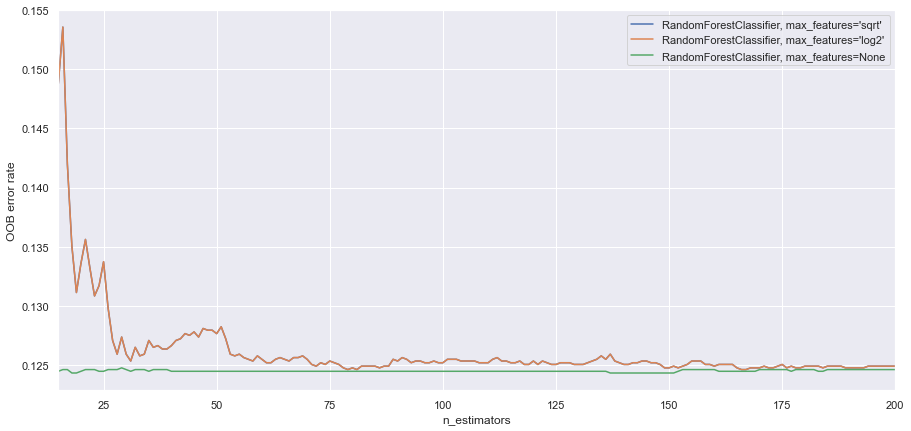

In [426]:
# adapted from https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html 

RANDOM_STATE = 42

ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
            min_samples_leaf=500,
            class_weight='balanced_subsample',
            max_samples=0.6
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
            min_samples_leaf=500,
            class_weight='balanced_subsample',
            max_samples=0.6
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
            min_samples_leaf=500,
            class_weight='balanced_subsample',
            max_samples=0.6
            
        ),
    ),
]

error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 15
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train_eng[sets_RF1], y_train_df)
        
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))


for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [427]:
error_rate

OrderedDict([("RandomForestClassifier, max_features='sqrt'",
              [(15, 0.14879745001448852),
               (16, 0.15357867284844973),
               (17, 0.14198782961460443),
               (18, 0.13503332367429732),
               (19, 0.13112141408287448),
               (20, 0.13358446827006665),
               (21, 0.13561286583598953),
               (22, 0.13314981164879747),
               (23, 0.13083164300202843),
               (24, 0.1317009562445668),
               (25, 0.13372935381048967),
               (26, 0.12981744421906694),
               (27, 0.12706461895102872),
               (28, 0.1259055346276442),
               (29, 0.12735439003187476),
               (30, 0.1259055346276442),
               (31, 0.12532599246595189),
               (32, 0.1264850767893364),
               (33, 0.12576064908722107),
               (34, 0.1259055346276442),
               (35, 0.12706461895102872),
               (36, 0.1264850767893364),
               (37, 0

In [428]:
def return_f1score(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    n_scores = cross_val_score(model, X, y, scoring = make_scorer(f1_score), cv = cv)
    return n_scores
def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X_train_eng[sets_RF1], y_train_df)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

>400 0.662 (0.023)
>450 0.662 (0.023)
>500 0.662 (0.023)
>550 0.662 (0.023)
>600 0.662 (0.023)


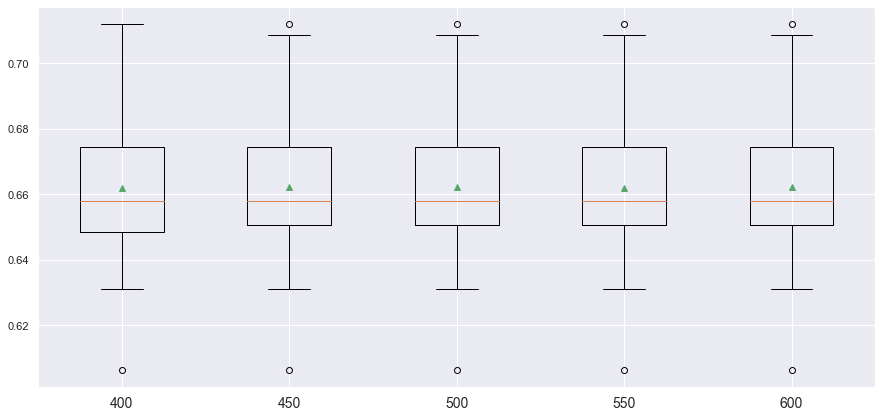

In [429]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(min_samples_leaf = value, n_estimators=20,class_weight='balanced_subsample',criterion="gini", max_features=None,random_state=42)      
    return models

models = get_models([400,450,500,550,600])
return_results(models)

>0.2 0.356 (0.019)
>0.4 0.365 (0.022)
>0.6 0.663 (0.022)
>0.8 0.662 (0.023)
>0.85 0.662 (0.023)
>0.9 0.662 (0.023)
>0.95 0.662 (0.023)
>None 0.662 (0.023)


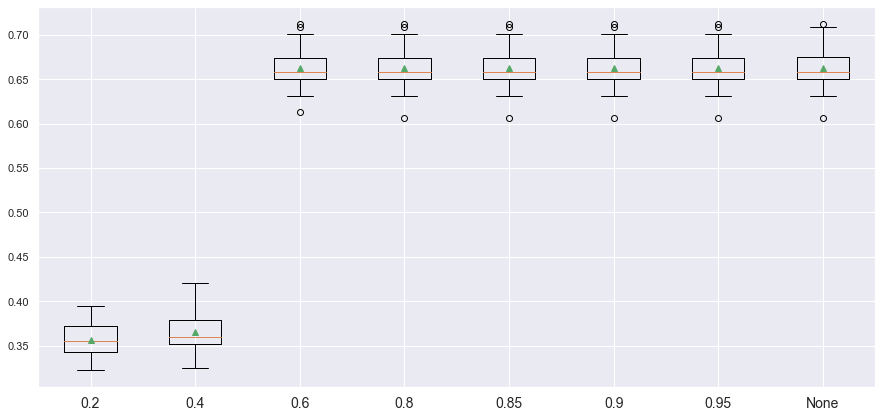

In [430]:

def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(max_samples = value, n_estimators=20,class_weight='balanced_subsample',criterion="gini", max_features=None, min_samples_leaf=500,random_state=42)      
    return models

models = get_models([0.2,0.4,0.6,0.8,0.85,0.90,0.95,None])
return_results(models)

In [431]:
clf=RandomForestClassifier(n_estimators=37,class_weight='balanced_subsample',criterion="gini",  max_samples=0.6,max_features='log2', min_samples_leaf=500,random_state=42).fit(X_train_eng[sets_RF1], y_train_df)
model_RF=RandomForestClassifier(n_estimators=37,class_weight='balanced_subsample',criterion="gini",  max_samples=0.6,max_features='log2', min_samples_leaf=500,random_state=42)
# kaggle=0.65

In [432]:
metrics1(y_train_df, clf.predict(X_train_eng[sets_RF1]) , y_val_df, clf.predict(X_val_eng[sets_RF1]))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5849
           1       0.56      0.79      0.66      1053

    accuracy                           0.88      6902
   macro avg       0.76      0.84      0.79      6902
weighted avg       0.90      0.88      0.88      6902

Confusion Matrix:
[[5206  643]
 [ 218  835]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [433]:
roc_RF=roc_auc_score(y_val_df, clf.predict(X_val_eng[sets_RF1]))
roc_RF

0.8390710373258448

In [434]:
#k-fold
f1_RF,auc_RF=evaluate_model(RandomForestClassifier(n_estimators=37,class_weight='balanced_subsample',criterion="gini",  max_samples=0.6,max_features='log2', min_samples_leaf=500,random_state=42), X_train_eng[sets_RF1], y_train_df)

F1 score: 0.652 (0.025)
ROC_AUC score:0.8700354964570416


In [435]:
labels_RF = clf.predict(X_test_eng[sets_RF1])

In [436]:
labels_RF_df = pd.DataFrame(labels_RF)
kaggle_RF = pd.DataFrame(X_test_eng.index)
kaggle_RF

,Access_ID
0,798519314
1,798663101
2,798663221
3,798760918
4,798856982
...,...
2295,962042726
2296,962063064
2297,962147749
2298,962182167


In [437]:
kaggle_RF = pd.concat([kaggle_RF["Access_ID"], labels_RF_df[0]],axis=1)
kaggle_RF["Buy"] = kaggle_RF[0]
kaggle_RF = kaggle_RF.drop(columns=[0])

In [438]:
kaggle_RF.set_index('Access_ID',inplace=True,drop=True)
kaggle_RF.value_counts()

Buy
0      1820
1       480
dtype: int64

In [439]:
kaggle_RF=kaggle_RF.astype(int)

In [440]:
file_name = 'kagGleRF.csv'
  
# saving the excel
kaggle_RF.to_csv(file_name)

#### Random forests for outliers

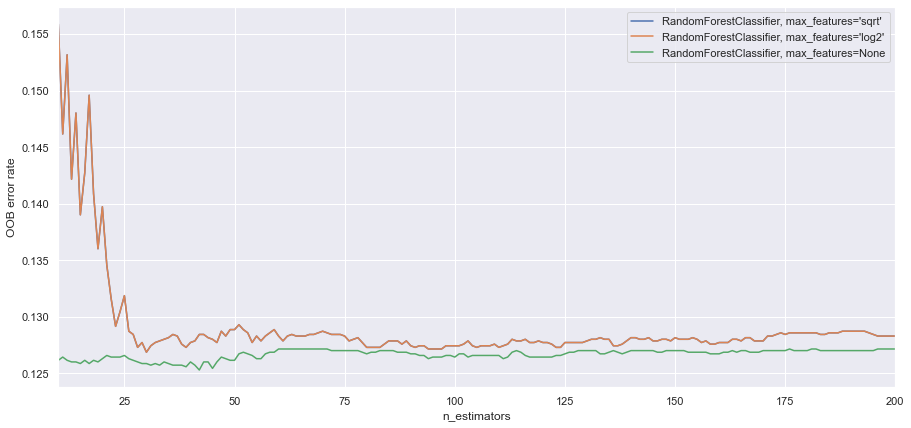

In [441]:

# adapted from https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html 

RANDOM_STATE = 42

ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
            min_samples_leaf=500,
            class_weight='balanced_subsample',
            max_samples=0.6
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
            min_samples_leaf=500,
            class_weight='balanced_subsample',
            max_samples=0.6
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
            min_samples_leaf=500,
            class_weight='balanced_subsample',
            max_samples=0.6
            
        ),
    ),
]
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 10
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train_out_robust[sets_RF1], y_train_out)
        
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))


for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [442]:
clf_out=RandomForestClassifier(n_estimators=37,class_weight='balanced_subsample',criterion="gini",  max_samples=0.6,max_features=None, min_samples_leaf=500,random_state=42).fit(X_train_out_robust[sets_RF1], y_train_out)

In [443]:
metrics1(y_train_out, clf_out.predict(X_train_out_robust[sets_RF1]) , y_val_out, clf_out.predict(X_val_out_robust[sets_RF1]))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5913
           1       0.57      0.80      0.67      1086

    accuracy                           0.88      6999
   macro avg       0.77      0.85      0.79      6999
weighted avg       0.90      0.88      0.88      6999

Confusion Matrix:
[[5254  659]
 [ 214  872]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [444]:
#k-fold
f1_RF,auc_RF=evaluate_model(RandomForestClassifier(n_estimators=37,class_weight='balanced_subsample',criterion="gini",  max_samples=0.6,max_features=None, min_samples_leaf=500,random_state=42), X_train_out_robust[sets_RF1], y_train_out)

F1 score: 0.664 (0.023)
ROC_AUC score:0.8818382224996539


<hr>
<a class="anchor" id="Adaboost">
    
### Adaboost 
    
</a>

In [175]:
print('Scores with Sets list')
for i in range(len(sets_to_test2)):
        
    print(f'Scores using Set {i+1}')

    adaboost_no_over = AdaBoostClassifier(n_estimators=50,learning_rate=0.6).fit(X_train_eng[sets_to_test2[i]], y_train_df)
    
    predict_train_adaboost = adaboost_no_over.predict(X_train_eng[sets_to_test2[i]])
    predict_val_adaboost = adaboost_no_over.predict(X_val_eng[sets_to_test2[i]])
    
    
    metrics1(y_train_df, predict_train_adaboost , y_val_df, predict_val_adaboost)


Scores with Sets list
Scores using Set 1
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5849
           1       0.65      0.60      0.62      1053

    accuracy                           0.89      6902
   macro avg       0.79      0.77      0.78      6902
weighted avg       0.89      0.89      0.89      6902

Confusion Matrix:
[[5507  342]
 [ 423  630]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------

In [176]:
adaboost_no_over = AdaBoostClassifier(n_estimators=50, learning_rate=0.6).fit(X_train_eng[set_new1], y_train_df)
predict_train_adaboost = adaboost_no_over.predict(X_train_eng[set_new1])
predict_val_adaboost = adaboost_no_over.predict(X_val_eng[set_new1])

metrics1(y_train_df, predict_train_adaboost , y_val_df, predict_val_adaboost)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5849
           1       0.67      0.64      0.65      1053

    accuracy                           0.90      6902
   macro avg       0.80      0.79      0.80      6902
weighted avg       0.89      0.90      0.90      6902

Confusion Matrix:
[[5518  331]
 [ 382  671]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

#### Exploring the number of trees in Adaboost (n_estimates)

In [177]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(n_estimators=n)
	return models

# define dataset

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train_eng[set_new1], y_train_df)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

F1 score: 0.624 (0.032)
ROC_AUC score:0.8857184615140914
>10 0.755 (0.131)
F1 score: 0.612 (0.032)
ROC_AUC score:0.8890129210312612
>50 0.751 (0.138)


KeyboardInterrupt: 

n_estimates = 50 seems to be the optimal

#### Exploring the weak learner in Adaboost (base_estimator)

>1 0.595 (0.047)
>2 0.588 (0.055)
>3 0.572 (0.043)
>4 0.561 (0.036)
>5 0.534 (0.043)
>6 0.544 (0.051)
>7 0.568 (0.045)
>8 0.571 (0.046)
>9 0.579 (0.037)
>10 0.577 (0.046)


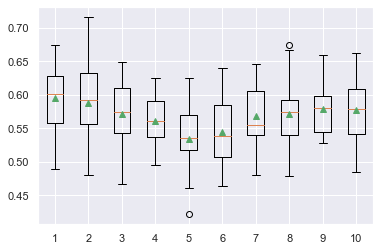

In [ ]:
def get_models():
	models = dict()
	# explore depths from 1 to 10
	for i in range(1,11):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring=make_scorer(f1_score, average='binary'), cv=cv, n_jobs=-1)
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train_eng[set_new1], y_train_df)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

base_estimator = 2 seems to be optimal

#### Exploring the Learning Rate in Adaboost (learning_rate)

>0.100 0.888 (0.012)
>0.200 0.888 (0.012)
>0.300 0.888 (0.013)
>0.400 0.887 (0.014)
>0.500 0.887 (0.013)
>0.600 0.889 (0.013)
>0.700 0.887 (0.013)
>0.800 0.885 (0.012)
>0.900 0.886 (0.014)
>1.000 0.885 (0.014)
>1.100 0.886 (0.013)
>1.200 0.885 (0.014)
>1.300 0.886 (0.014)
>1.400 0.885 (0.015)
>1.500 0.886 (0.013)
>1.600 0.887 (0.012)
>1.700 0.885 (0.012)
>1.800 0.885 (0.013)
>1.900 0.883 (0.012)
>2.000 0.124 (0.015)


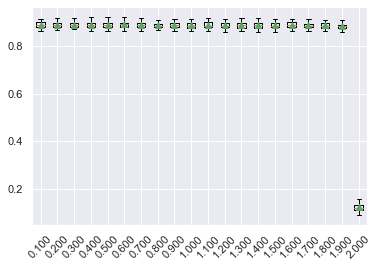

In [ ]:
def get_models():
	models = dict()
	# explore learning rates from 0.1 to 2 in 0.1 increments
	for i in arange(0.1, 2.1, 0.1):
		key = '%.3f' % i
		models[key] = AdaBoostClassifier(learning_rate=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring=make_scorer(f1_score, average='binary'), cv=cv, n_jobs=-1)
	return scores
 
# define dataset

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train_eng[set_new1], y_train_df)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

learning_rate = 0.6 seems to be optimal

#### Explore Alternate Algorithm (base_estimator)

In [ ]:
model = AdaBoostClassifier(base_estimator=LogisticRegression(class_weight='balanced_subsample'))
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train_eng[set2], y_train_df, scoring=make_scorer(f1_score, average='binary'), cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.877 (0.007)


#### GridSearch

In [455]:
model = AdaBoostClassifier(algorithm='SAMME.R', random_state = 42)
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [50, 100, 200]
grid['learning_rate'] = [0.001, 0.01, 0.1, 0.5, 0.6, 0.8]
grid['base_estimator'] = [SVC(class_weight='balanced',C= 10, gamma= 0.001, kernel='rbf'), DecisionTreeClassifier(splitter = 'random', min_samples_split=450,class_weight={0:1,1:5.6}, criterion='gini'), RandomForestClassifier(n_estimators=20,class_weight='balanced_subsample',criterion="gini", max_features=None, min_samples_leaf=500)]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=make_scorer(f1_score, average='binary'))
# execute the grid search
grid_result = grid_search.fit(X_train_eng[set1_no_bin], y_train_df)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 

In [456]:
adaboost_test = AdaBoostClassifier(base_estimator = RandomForestClassifier(class_weight='balanced_subsample', max_features=None,
                       min_samples_leaf=500, n_estimators=20), learning_rate = 0.1, n_estimators = 50).fit(X_train_eng[set1_no_bin], y_train_df)
predict_train_adaboost1 = adaboost_test.predict(X_train_eng[set1_no_bin])
predict_val_adaboost1 = adaboost_test.predict(X_val_eng[set1_no_bin])

metrics1(y_train_df, predict_train_adaboost1 , y_val_df, predict_val_adaboost1)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      5849
           1       0.57      0.80      0.67      1053

    accuracy                           0.88      6902
   macro avg       0.77      0.85      0.80      6902
weighted avg       0.90      0.88      0.89      6902

Confusion Matrix:
[[5220  629]
 [ 209  844]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [457]:
f1_adaboost, auc_adaboost = evaluate_model(adaboost_test,X_train_eng[set1_no_bin],y_train_df)

F1 score: 0.666 (0.023)
ROC_AUC score:0.9054542440303188


In [458]:
labels_adaboost_gs = adaboost_test.predict(X_test_eng[set1_no_bin])
df_adaboost_gs = pd.DataFrame(labels_adaboost_gs)
df_adaboost_gs

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
2295,0.0
2296,0.0
2297,1.0
2298,0.0


In [459]:
df_adaboost_gs.value_counts()

0.0    1810
1.0     490
dtype: int64

In [460]:
kaggle_adaboost_gs = pd.DataFrame(X_test_eng.index)
kaggle_adaboost_gs

,Access_ID
0,798519314
1,798663101
2,798663221
3,798760918
4,798856982
...,...
2295,962042726
2296,962063064
2297,962147749
2298,962182167


In [461]:
kaggle_adaboost_gs = pd.concat([kaggle_adaboost_gs["Access_ID"], df_adaboost_gs[0]],axis = 1)
kaggle_adaboost_gs["Buy"] = kaggle_adaboost_gs[0]
kaggle_adaboost_gs = kaggle_adaboost_gs.drop(columns = [0])
kaggle_adaboost_gs.set_index('Access_ID', inplace = True,drop = True)
kaggle_adaboost_gs

,Buy
Access_ID,
798519314,0.0
798663101,0.0
798663221,0.0
798760918,0.0
798856982,1.0
...,...
962042726,0.0
962063064,0.0
962147749,1.0


In [462]:
kaggle_adaboost_gs = kaggle_adaboost_gs.astype(int)
file_name = 'kaggle_adaboost_better.csv'

# saving the excel
kaggle_adaboost_gs.to_csv(file_name)

## ADABOOST RETRY

In [178]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = cv)
    return n_scores

In [179]:
def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X_train_eng[set_new1], y_train_df)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

#### base_estimator: max_depth

>1 0.612 (0.032)
>2 0.591 (0.043)
>3 0.575 (0.035)
>4 0.555 (0.046)
>5 0.533 (0.039)
>6 0.541 (0.042)
>7 0.562 (0.033)
>8 0.566 (0.042)
>9 0.569 (0.035)
>10 0.574 (0.035)
>11 0.578 (0.046)
>12 0.579 (0.038)


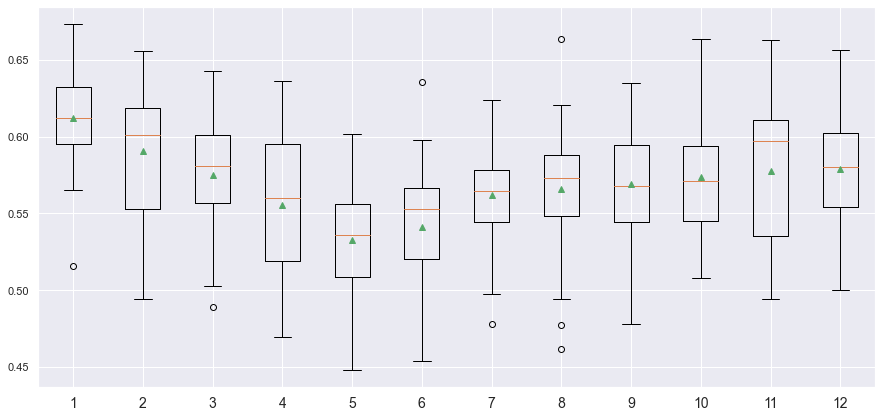

In [180]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=value), random_state = 15)      
    return models

models = get_models([1,2,3,4,5,6,7,8,9,10,11,12])
return_results(models)

#### base_estimator: changing the algorithm

>ad_LR 0.417 (0.054)
>ad_def 0.612 (0.032)


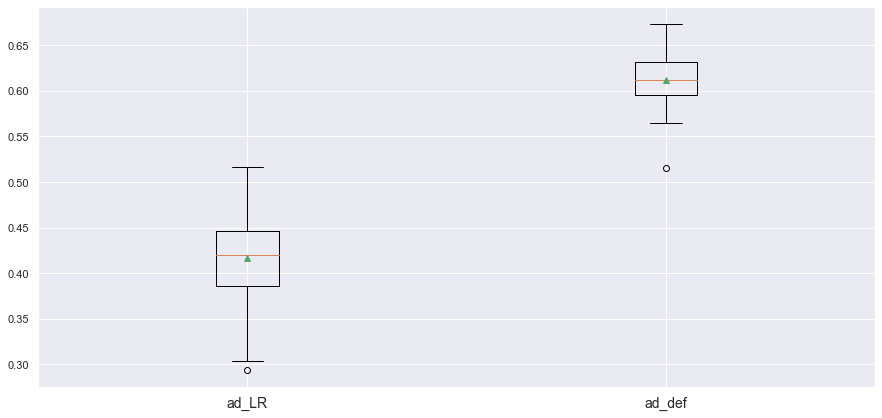

In [181]:
def get_models():
    models = dict()
    models['ad_LR'] = AdaBoostClassifier(base_estimator = LogisticRegression(max_iter=500), random_state = 15)  
    models['ad_def'] = AdaBoostClassifier(random_state = 15)  
    return models

models = get_models()
return_results(models)

#### Learning Rate

>0.1 0.613 (0.039)
>0.2 0.613 (0.037)
>0.3 0.616 (0.034)
>0.4 0.622 (0.032)
>0.5 0.627 (0.038)
>0.6 0.625 (0.035)
>0.7 0.624 (0.036)
>0.8 0.609 (0.035)
>0.9 0.622 (0.037)
>1.0 0.612 (0.032)


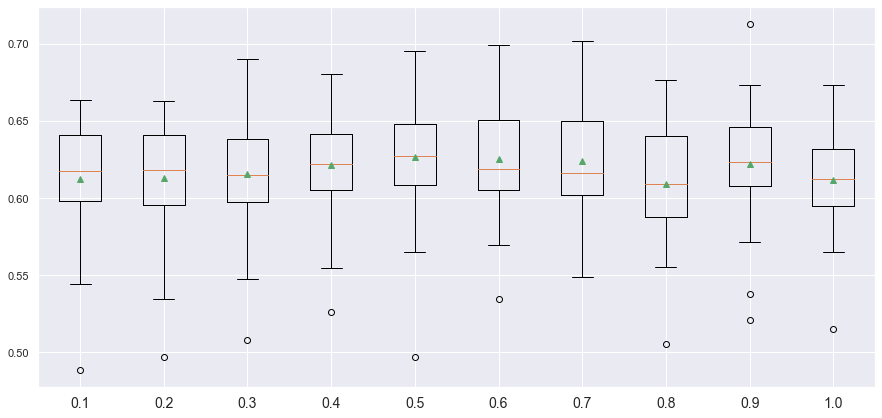

In [182]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(learning_rate = value, random_state = 15)      
    return models

models = get_models([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
return_results(models)

Testing the learning rate again but with a different number of estimators

In [183]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(learning_rate = value, n_estimators = 20, random_state = 15)      
    return models

models = get_models([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
return_results(models)

KeyboardInterrupt: 

#### Number of estimators

>10 0.624 (0.032)
>20 0.611 (0.036)
>30 0.616 (0.031)
>50 0.612 (0.032)


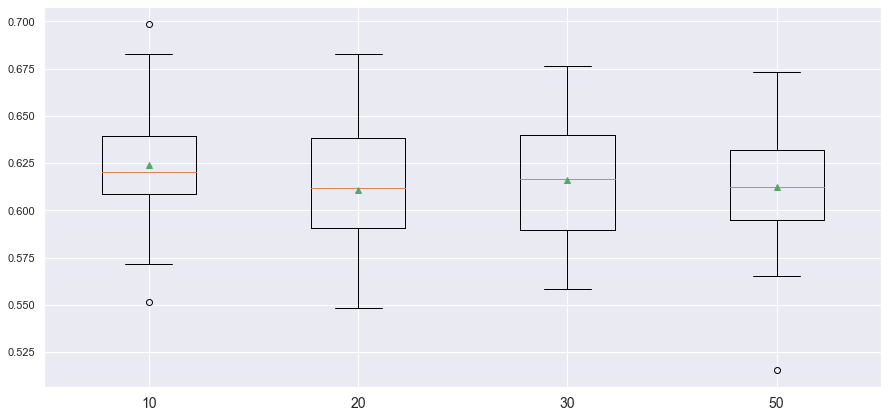

In [185]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(n_estimators = value, random_state = 15)      
    return models

models = get_models([10, 20,30,50])
return_results(models)


#### Algorithm

>SAMME 0.628 (0.033)
>SAMME.R 0.612 (0.032)


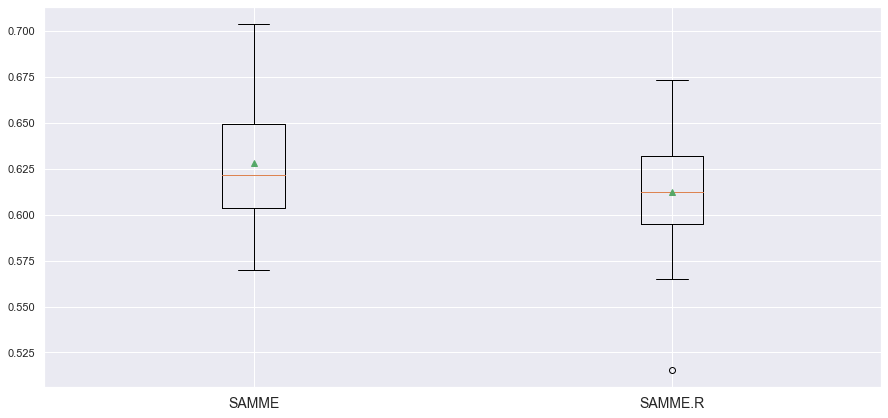

In [186]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(algorithm = value, random_state = 15)      
    return models

models = get_models(["SAMME","SAMME.R"])
return_results(models)

In [187]:
adaboost_try = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1, class_weight='balanced'), learning_rate = 0.5, algorithm = 'SAMME', n_estimators = 10, random_state = 15).fit(X_train_eng[set_new1], y_train_df)

predict_train_adaboost = adaboost_try.predict(X_train_eng[set_new1])
predict_val_adaboost = adaboost_try.predict(X_val_eng[set_new1])

metrics1(y_train_df, predict_train_adaboost , y_val_df, predict_val_adaboost)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5849
           1       0.57      0.80      0.66      1053

    accuracy                           0.88      6902
   macro avg       0.76      0.85      0.79      6902
weighted avg       0.90      0.88      0.88      6902

Confusion Matrix:
[[5200  649]
 [ 207  846]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [188]:
evaluate_model(adaboost_try,X_train_eng[set1_no_bin],y_train_df)

F1 score: 0.662 (0.023)
ROC_AUC score:0.8530306526674235


(0.6621976506842849, 0.8530306526674235)

### Gridsearch

In [190]:
model = AdaBoostClassifier(algorithm='SAMME', random_state = 42)
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [5, 7, 9, 10, 12]
grid['learning_rate'] = [0.2,0.3,0.35,0.4,0.5, 0.55, 0.6, 0.65]
grid['base_estimator'] = [DecisionTreeClassifier(max_depth = 1, class_weight='balanced'), LogisticRegression(class_weight='balanced')]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=make_scorer(f1_score, average='binary'))
# execute the grid search
grid_result = grid_search.fit(X_train_eng[set_new1], y_train_df)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print('----------------------------------------')
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.665468 using {'base_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=1), 'learning_rate': 0.3, 'n_estimators': 5}
----------------------------------------
0.664316 (0.029730) with: {'base_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=1), 'learning_rate': 0.2, 'n_estimators': 5}
0.664316 (0.029730) with: {'base_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=1), 'learning_rate': 0.2, 'n_estimators': 7}
0.664316 (0.029730) with: {'base_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=1), 'learning_rate': 0.2, 'n_estimators': 9}
0.664316 (0.029730) with: {'base_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=1), 'learning_rate': 0.2, 'n_estimators': 10}
0.664316 (0.029730) with: {'base_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=1), 'learning_rate': 0.2, 'n_estimators': 12}
0.665468 (0.029570) with: {'base_estimator': DecisionTreeClassifier(class_

In [192]:
adaboost_try = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(class_weight='balanced', max_depth=1), learning_rate = 0.3, algorithm = 'SAMME', n_estimators = 5, random_state = 15).fit(X_train_eng[set_new1], y_train_df)

predict_train_adaboost = adaboost_try.predict(X_train_eng[set_new1])
predict_val_adaboost = adaboost_try.predict(X_val_eng[set_new1])

metrics1(y_train_df, predict_train_adaboost , y_val_df, predict_val_adaboost)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      5849
           1       0.57      0.80      0.67      1053

    accuracy                           0.88      6902
   macro avg       0.77      0.84      0.80      6902
weighted avg       0.90      0.88      0.89      6902

Confusion Matrix:
[[5228  621]
 [ 215  838]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [193]:
evaluate_model(adaboost_try,X_train_eng[set_new1],y_train_df)

F1 score: 0.665 (0.022)
ROC_AUC score:0.8543687411458477


(0.6650265096753821, 0.8543687411458477)

#### END OF RETRY

#### Repeating wiht outliers

In [463]:
model = AdaBoostClassifier(algorithm='SAMME.R', random_state = 42)
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [50, 100, 200]
grid['learning_rate'] = [0.001, 0.01, 0.1, 0.5, 0.6, 0.8]
grid['base_estimator'] = [SVC(class_weight='balanced',C= 10, gamma= 0.001, kernel='rbf'), DecisionTreeClassifier(splitter = 'random', min_samples_split=450,class_weight={0:1,1:5.6}, criterion='gini'), RandomForestClassifier(n_estimators=20,class_weight='balanced_subsample',criterion="gini", max_features=None, min_samples_leaf=500)]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=make_scorer(f1_score, average='binary'))
# execute the grid search
grid_result = grid_search.fit(X_train_out_robust[set1_no_bin], y_train_out)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.667554 using {'base_estimator': RandomForestClassifier(class_weight='balanced_subsample', max_features=None,
                       min_samples_leaf=500, n_estimators=20), 'learning_rate': 0.1, 'n_estimators': 50}
nan (nan) with: {'base_estimator': SVC(C=10, class_weight='balanced', gamma=0.001), 'learning_rate': 0.001, 'n_estimators': 50}
nan (nan) with: {'base_estimator': SVC(C=10, class_weight='balanced', gamma=0.001), 'learning_rate': 0.001, 'n_estimators': 100}
nan (nan) with: {'base_estimator': SVC(C=10, class_weight='balanced', gamma=0.001), 'learning_rate': 0.001, 'n_estimators': 200}
nan (nan) with: {'base_estimator': SVC(C=10, class_weight='balanced', gamma=0.001), 'learning_rate': 0.01, 'n_estimators': 50}
nan (nan) with: {'base_estimator': SVC(C=10, class_weight='balanced', gamma=0.001), 'learning_rate': 0.01, 'n_estimators': 100}
nan (nan) with: {'base_estimator': SVC(C=10, class_weight='balanced', gamma=0.001), 'learning_rate': 0.01, 'n_estimators': 200}
nan (nan)

#### Adaboost with optimized hyperparameters (outliers)

In [464]:
adaboost_outliers = AdaBoostClassifier(base_estimator = RandomForestClassifier(class_weight = 'balanced_subsample', max_features = None,
                       min_samples_leaf = 500, n_estimators = 20), learning_rate = 0.1, n_estimators = 50).fit(X_train_out_robust[set1_no_bin], y_train_out)
predict_train_adaboost_out = adaboost_outliers.predict(X_train_out_robust[set1_no_bin])
predict_val_adaboost_out = adaboost_outliers.predict(X_val_out_robust[set1_no_bin])

metrics1(y_train_out, predict_train_adaboost_out , y_val_out, predict_val_adaboost_out)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5913
           1       0.57      0.80      0.67      1086

    accuracy                           0.88      6999
   macro avg       0.77      0.85      0.80      6999
weighted avg       0.90      0.88      0.88      6999

Confusion Matrix:
[[5262  651]
 [ 214  872]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [465]:
evaluate_model(adaboost_outliers,X_train_out_robust[set1_no_bin],y_train_out)

F1 score: 0.668 (0.023)
ROC_AUC score:0.9051180162027819


(0.6679699548139582, 0.9051180162027819)

In [466]:
labels_adaboost_out = adaboost_outliers.predict(X_test_robust[set1_no_bin])
df_adaboost_out = pd.DataFrame(labels_adaboost_out)
df_adaboost_out

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
2295,0.0
2296,0.0
2297,1.0
2298,0.0


In [467]:
df_adaboost_out.value_counts()

0.0    1813
1.0     487
dtype: int64

In [468]:
kaggle_adaboost_out = pd.DataFrame(X_test_robust.index)
kaggle_adaboost_out = pd.concat([kaggle_adaboost_out["Access_ID"], df_adaboost_out[0]],axis = 1)
kaggle_adaboost_out["Buy"] = kaggle_adaboost_out[0]
kaggle_adaboost_out = kaggle_adaboost_out.drop(columns = [0])
kaggle_adaboost_out.set_index('Access_ID', inplace = True,drop = True)
kaggle_adaboost_out

,Buy
Access_ID,
798519314,0.0
798663101,0.0
798663221,0.0
798760918,0.0
798856982,1.0
...,...
962042726,0.0
962063064,0.0
962147749,1.0


In [469]:
kaggle_adaboost_out = kaggle_adaboost_out.astype(int)
file_name = 'kaggle_adaboost_outlier.csv'

# saving the excel
kaggle_adaboost_out.to_csv(file_name)


<a class="anchor" id="GB">
    
### Gradient Boosting
    
</a>

#### Exploring number of samples

F1 score: 0.612 (0.032)
ROC_AUC score:0.8846197805493919
>0.1 0.748 (0.136)
F1 score: 0.615 (0.036)
ROC_AUC score:0.8954539987456869
>0.2 0.755 (0.140)
F1 score: 0.620 (0.035)
ROC_AUC score:0.8994407552296324
>0.3 0.760 (0.140)
F1 score: 0.622 (0.032)
ROC_AUC score:0.8996914606952515
>0.4 0.761 (0.139)
F1 score: 0.625 (0.037)
ROC_AUC score:0.901944735059461
>0.5 0.763 (0.139)
F1 score: 0.626 (0.033)
ROC_AUC score:0.9028368518644753
>0.6 0.764 (0.139)
F1 score: 0.626 (0.032)
ROC_AUC score:0.9024392163239948
>0.7 0.764 (0.138)
F1 score: 0.628 (0.034)
ROC_AUC score:0.9026467567744597
>0.8 0.765 (0.137)
F1 score: 0.621 (0.041)
ROC_AUC score:0.903433227177304
>0.9 0.762 (0.141)
F1 score: 0.622 (0.038)
ROC_AUC score:0.9038578958622466
>1.0 0.763 (0.141)


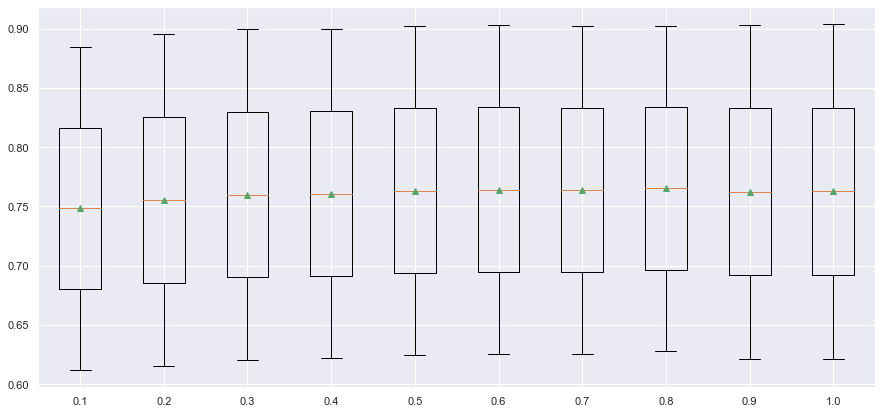

In [ ]:


from sklearn.metrics import accuracy_score




# get a list of models to evaluate
def get_models():
	models = dict()
	# explore sample ratio from 10% to 100% in 10% increments
	for i in np.arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = GradientBoostingClassifier(subsample=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model_GB(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring=make_scorer(f1_score, average='binary'), cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train_eng[gb_set], y_train_df)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [196]:
from sklearn.ensemble import GradientBoostingClassifier
gb_set = set_new1


#### Exploring number of features


1 0.6279 0.0471
2 0.6295 0.0468
3 0.6282 0.0518
4 0.6288 0.0509
5 0.6277 0.0475
6 0.627 0.0493
7 0.6239 0.049
8 0.6232 0.0469
9 0.624 0.051
10 0.6233 0.0485


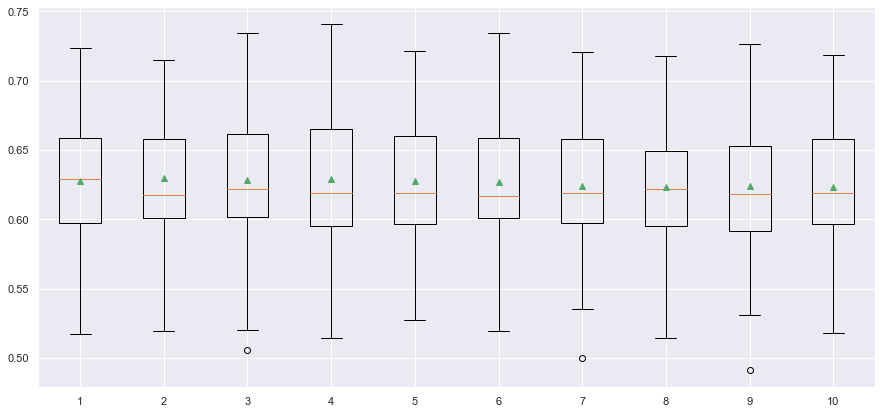

In [ ]:
def get_models(X_data):
    models = dict()
    for i in np.arange(1,len(X_data.columns),1):
        models[str(i)] = GradientBoostingClassifier(max_features=i)
    return models

def evaluator(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats= 5, random_state=42)
    scores = cross_val_score(model,X,y, scoring = make_scorer(f1_score, average='binary'), cv = cv, n_jobs = -1)
    return scores

models = get_models(X_train_eng[gb_set])

results, names = list(), list()

for name, model in models.items():
    scores = evaluator(model, X_train_eng[gb_set], y_train_df)
    results.append(scores)
    names.append(name)

    print(f"{name} {round(mean(scores),4)} {round(std(scores),4)}")

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


#### Exploring Learning Rate


>0.0001 0.000 (0.000)
>0.0010 0.000 (0.000)
>0.0100 0.483 (0.060)
>0.1000 0.620 (0.051)
>1.0000 0.559 (0.063)


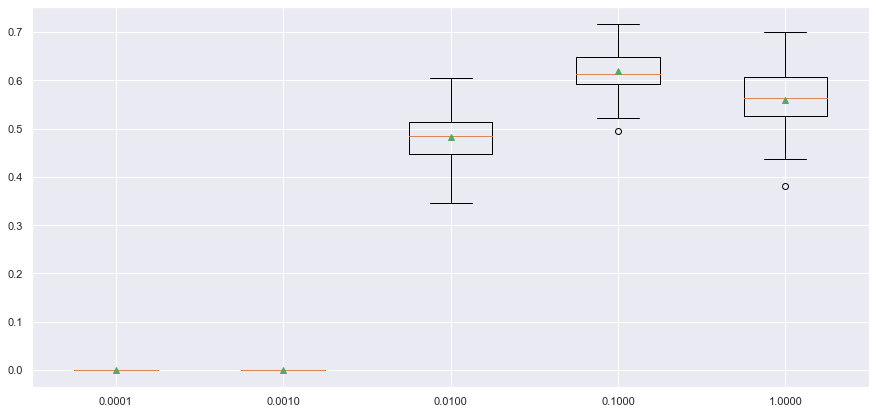

In [ ]:
def get_models():
	models = dict()
	# define learning rates to explore
	for i in [0.0001, 0.001, 0.01, 0.1, 1.0]:
		key = '%.4f' % i
		models[key] = GradientBoostingClassifier(learning_rate=i)
	return models

def evaluate_modelGB(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X_train_eng[gb_set], y_train_df, scoring=make_scorer(f1_score, average='binary'), cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_modelGB(model, X_train_eng[gb_set], y_train_df)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


#### Exploring Max Depth of Trees


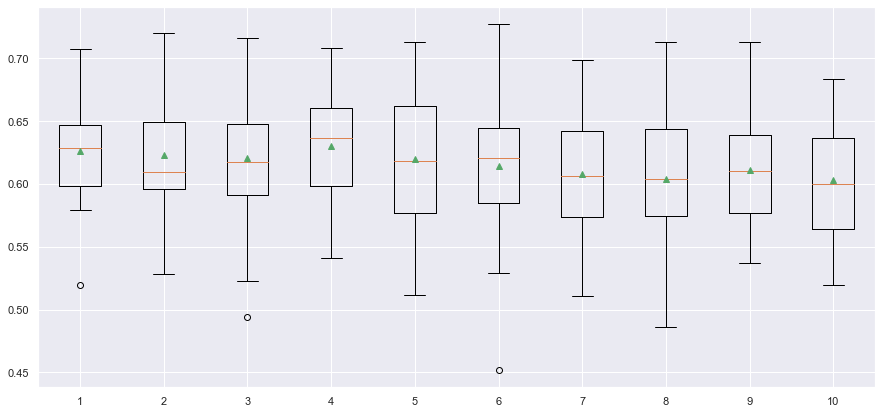

In [ ]:
def get_models():
	models = dict()
	# define max tree depths to explore between 1 and 10
	for i in range(1,11):
		models[str(i)] = GradientBoostingClassifier(max_depth=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_modelGB(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X_train_eng[gb_set], y_train_df, scoring=make_scorer(f1_score, average='binary'), cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_modelGB(model, X_train_eng[gb_set], y_train_df)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	#print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### GridSearch

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [50, 100,200, 500, 750]
grid['learning_rate'] = [0.001, 0.01, 0.1,0.2,0.25,0.3]
grid['subsample'] = [0.4,0.5,0.6, 0.7,0.8, 1.0]
grid['max_depth'] = [1, 3, 5]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=make_scorer(f1_score, average='binary'))
# execute the grid search
grid_result = grid_search.fit(X_train_eng[gb_set], y_train_df)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#### Fitting and Scoring

In [197]:
#Initialising model with optimised parameters

#FILL
gradientbooster = GradientBoostingClassifier(learning_rate=0.3,max_depth=1,n_estimators=50,subsample=0.6)

#Fitting model
gradientbooster.fit(X_train_eng[gb_set],y_train_df)

#print(mean(score), std(score))
predict_train_gradient_boost = gradientbooster.predict(X_train_eng[gb_set])
predict_val_gradient_boost = gradientbooster.predict(X_val_eng[gb_set])

metrics1(y_train_df, predict_train_gradient_boost , y_val_df, predict_val_gradient_boost)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5849
           1       0.70      0.60      0.65      1053

    accuracy                           0.90      6902
   macro avg       0.81      0.78      0.79      6902
weighted avg       0.89      0.90      0.90      6902

Confusion Matrix:
[[5575  274]
 [ 420  633]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [ ]:
# FILL
evaluate_model(GradientBoostingClassifier(learning_rate=0.1,max_depth=1,n_estimators=500,subsample=0.5) , X_train_eng[gb_set], y_train_df)

KeyboardInterrupt: 

#### Gradient Boost Outliers

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [50, 100,200, 500, 750]
grid['learning_rate'] = [0.001, 0.01, 0.1,0.2,0.25,0.3]
grid['subsample'] = [0.4,0.5,0.6, 0.7,0.8, 1.0]
grid['max_depth'] = [1, 3, 5]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=make_scorer(f1_score, average='binary'))
# execute the grid search
grid_result = grid_search.fit(X_train_out_robust[gb_set], y_train_out)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.644377 using {'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 100, 'subsample': 0.7}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'subsample': 0.4}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'subsample': 0.5}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'subsample': 0.6}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'subsample': 0.7}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'subsample': 0.8}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'subsample': 1.0}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100, 'subsample': 0.4}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100, 'subsample': 0.5}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_dep

In [ ]:
#Initialising model with optimised parameters
#FILL
gradientbooster_out = GradientBoostingClassifier(learning_rate=0.3,max_depth=1,n_estimators=100,subsample=0.7)

#Fitting model
gradientbooster_out.fit(X_train_out_robust[gb_set],y_train_out)

predict_train_gradient_boost_out = gradientbooster_out.predict(X_train_out_robust[gb_set])
predict_val_gradient_boost_out = gradientbooster_out.predict(X_val_out_robust[gb_set])

metrics1(y_train_out, predict_train_gradient_boost_out , y_val_out, predict_val_gradient_boost_out)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5351
           1       0.70      0.62      0.66      1034

    accuracy                           0.90      6385
   macro avg       0.82      0.79      0.80      6385
weighted avg       0.89      0.90      0.89      6385

Confusion Matrix:
[[5080  271]
 [ 389  645]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [ ]:
#FILL
evaluate_model(GradientBoostingClassifier(learning_rate=0.25,max_depth=1,n_estimators=100,subsample=0.8) , X_train_out_robust[gb_set], y_train_out)

F1 score: 0.642 (0.029)
ROC_AUC score: 0.776 (0.021)


(0.641675030963445, 0.7764128809530482)

#### Gradient Boost OverSampling

In [ ]:
model = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [50, 100,200, 500, 750]
grid['learning_rate'] = [0.001, 0.01, 0.1,0.2,0.25,0.3]
grid['subsample'] = [0.4,0.5,0.6, 0.7,0.8, 1.0]
grid['max_depth'] = [1, 3, 5]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=make_scorer(f1_score, average='binary'))
# execute the grid search
grid_result = grid_search.fit(X_train_over[gb_set], y_train_over)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.898646 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}
0.852143 (0.011004) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'subsample': 0.4}
0.852218 (0.010983) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'subsample': 0.5}
0.852256 (0.010949) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'subsample': 0.6}
0.852256 (0.010949) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'subsample': 0.7}
0.852256 (0.010949) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'subsample': 0.8}
0.852256 (0.010949) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'subsample': 1.0}
0.852143 (0.011004) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100, 'subsample': 0.4}
0.852256 (0.010949) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100, 'subsample': 0.5}
0.852256 (0.010949) with: {'learning_rate': 0.001, 'max_dep

#### Fitting and Scoring

#### Predicting and Scoring

In [ ]:
#Initialising model with optimised parameters
#FILL
gradientbooster_over = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=500,subsample=0.8)

#Fitting model
gradientbooster_over.fit(X_train_over[gb_set],y_train_over)

predict_train_gradient_boost_over = gradientbooster_over.predict(X_train_over[gb_set])
predict_val_gradient_boost_over = gradientbooster_over.predict(X_val_eng[gb_set])

metrics1(y_train_over, predict_train_gradient_boost_over , y_val_df, predict_val_gradient_boost_over)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5286
           1       0.99      0.96      0.97      5286

    accuracy                           0.97     10572
   macro avg       0.97      0.97      0.97     10572
weighted avg       0.97      0.97      0.97     10572

Confusion Matrix:
[[5225   61]
 [ 233 5053]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [ ]:
evaluate_model(GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=500,subsample=0.8) , X_train_over[gb_set], y_train_over)

F1 score: 0.898 (0.008)
ROC_AUC score: 0.898 (0.009)


(0.8975468999601396, 0.8984762559431746)

In [ ]:
#Changing threshold

predict_train_gradient_boost_threshold = (gradientbooster_out.predict_proba(X_train_out[gb_set])[:,1] >= 0.3).astype(int)
predict_val_gradient_boost_threshold = (gradientbooster_out.predict_proba(X_val_out[gb_set])[:,1] >= 0.3).astype(int)

metrics1(y_train_out, predict_train_gradient_boost_threshold , y_val_out, predict_val_gradient_boost_threshold)


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      5351
           1       0.62      0.78      0.69      1034

    accuracy                           0.89      6385
   macro avg       0.79      0.84      0.81      6385
weighted avg       0.90      0.89      0.89      6385

Confusion Matrix:
[[4856  495]
 [ 232  802]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [ ]:
#Preparing for kaggle

labels_Gradient_Boost = (gradientbooster_out.predict_proba(X_test_eng[gb_set])[:,1] >= 0.3).astype(int)
labels_Gradient_Boost_df = pd.DataFrame(labels_Gradient_Boost)
kaggle_gradient_boost = pd.DataFrame(X_test_eng.index)
kaggle_gradient_boost = pd.concat([kaggle_gradient_boost["Access_ID"], labels_Gradient_Boost_df[0]],axis = 1)
kaggle_gradient_boost["Buy"] = kaggle_gradient_boost[0]
kaggle_gradient_boost = kaggle_gradient_boost.drop(columns = [0])
kaggle_gradient_boost.set_index("Access_ID", inplace = True, drop = True)
kaggle_gradient_boost = kaggle_gradient_boost.astype(int)
kaggle_gradient_boost
#Saving to csv
kaggle_gradient_boost.to_csv("gradient_boost.csv")

<hr>
<a class="anchor" id="VC">
    
## Voting Classifier
    
</a>

In [ ]:
# set2_new=set2.copy()
# set2_new.remove('traffic2')
# set2_new.remove('x3_New_Access')

In [ ]:
# # from set2 remove binary variables

# estimators = [('dt', DecisionTreeClassifier(splitter = 'random',class_weight={0:1,1:5.6},min_samples_split=350, criterion='gini',random_state=2)), 
#               ('dt1', DecisionTreeClassifier(splitter = 'random',min_samples_split=200, criterion='gini',random_state=2)), 
#               ('dt2', DecisionTreeClassifier(splitter = 'random',min_samples_split=300, criterion='gini',random_state=2)),
#               ('dt3', DecisionTreeClassifier(splitter = 'random',min_samples_split=350, criterion='gini',random_state=2)),
             
#               ('knn1',KNeighborsClassifier(n_neighbors=5)),
#               ('knn3',KNeighborsClassifier(n_neighbors=4)),
#               ('knn4',KNeighborsClassifier(n_neighbors=3))]


# vot_hard = VotingClassifier(estimators = estimators, voting ='hard') 
# vot_hard = vot_hard.fit(X_train_eng[set2_new], y_train_df) 
# metrics1(y_train_df, vot_hard.predict(X_train_eng[set2_new]) , y_val_df, vot_hard.predict(X_val_eng[set2_new]))

In [ ]:
# vot_soft = VotingClassifier(estimators = estimators, voting ='soft') 
# vot_soft = vot_soft.fit(X_train_eng[set2_new], y_train_df) 
# metrics1(y_train_df, vot_soft.predict(X_train_eng[set2_new]) , y_val_df, vot_hard.predict(X_val_eng[set2_new]))


In [ ]:
roc_auc_score(y_val_df, vot_hard.predict(X_val_eng[set2_new]))

0.766767784518968

In [ ]:
#k-fold
f1_RF,auc_RF=evaluate_model(VotingClassifier(estimators = estimators, voting ='hard') , X_train_eng[], y_train_df)

0.7818812920861391

In [ ]:
labels_VC=vot_soft.predict(X_test_eng[set1])

In [ ]:
labels_VC = pd.DataFrame(labels_VC)
kaggle_VC = pd.DataFrame(X_test_eng.index)
kaggle_VC

In [ ]:
kaggle_VC = pd.concat([kaggle_VC["Access_ID"], labels_VC[0]],axis=1)
kaggle_VC["Buy"] = kaggle_VC[0]
kaggle_VC = kaggle_VC.drop(columns=[0])

In [ ]:
kaggle_VC.set_index('Access_ID',inplace=True,drop=True)

In [ ]:
kaggle_VC.value_counts()

Buy
0      2114
1       186
dtype: int64

In [ ]:
kaggle_VC=kaggle_VC.astype(int)

In [ ]:
file_name = 'kagGleVC.csv'
  
# saving the excel
kaggle_VC.to_csv(file_name)

<hr>
<a class="anchor" id="Stacking">
    
# Stacking Classifier
    
</a>

In [ ]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
import itertools

Using set1_no_bin

In [ ]:
lr = LogisticRegression(C = 0.01, penalty = 'l2', solver = 'newton-cg', class_weight='balanced').fit(X_train_over[set1_no_bin], y_train_over)

kn = KNeighborsClassifier().fit(X_train_over[set1_no_bin], y_train_over)

dt = DecisionTreeClassifier(splitter = 'random', min_samples_split=450,class_weight={0:1,1:5.6}, criterion='gini',random_state=42).fit(X_train_over[set1_no_bin], y_train_over)

nn = MLPClassifier(random_state = 42, activation = 'logistic', alpha = 0.001, hidden_layer_sizes = (10, 10, 10), learning_rate = 'adaptive', max_iter = 500, solver = 'adam').fit(X_train_over[set1_no_bin], y_train_over)

ab = AdaBoostClassifier(base_estimator = RandomForestClassifier(class_weight='balanced_subsample', max_features=None,
                       min_samples_leaf=500, n_estimators=20), learning_rate = 0.1, n_estimators = 50).fit(X_train_over[set1_no_bin], y_train_over)

rf = RandomForestClassifier(n_estimators=20,class_weight='balanced_subsample',criterion="gini", max_features=None, min_samples_leaf=450,random_state=42).fit(X_train_over[set1_no_bin], y_train_over)

gb = GradientBoostingClassifier(random_state = 10).fit(X_train_over[set1_no_bin], y_train_over)

<BarContainer object of 7 artists>

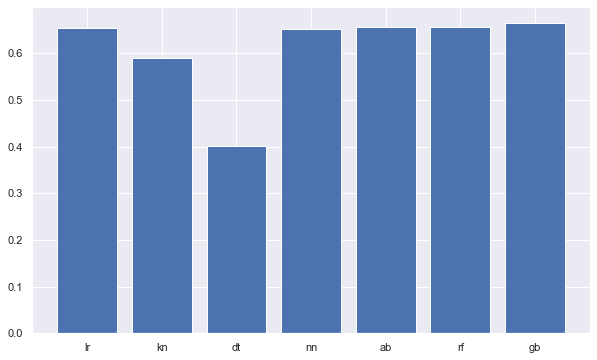

In [ ]:
models = [lr, kn, dt, nn, ab, rf, gb]
model_names = ['lr', 'kn', 'dt', 'nn', 'ab', 'rf', 'gb']
model_scores = []

for model in models:
    model_scores.append(f1_score(y_val_df, model.predict(X_val_eng[set1_no_bin])))

plt.figure(figsize=(10,6))
plt.bar(x = model_names, height = model_scores)

In [ ]:
estimators = [('nn', nn),
              ('lr', lr),
              ('dt', dt),
              ('kn', kn),
              ('ab', ab),
              ('rf', rf),
              ('gb', gb)]

<BarContainer object of 8 artists>

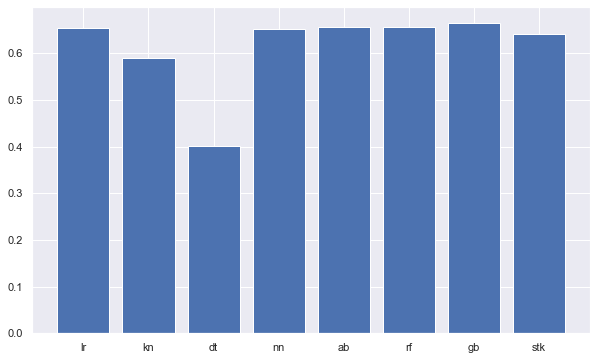

In [ ]:
stk = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression(random_state = 42)).fit(X_train_eng[set1_no_bin], y_train_df)

models = [lr, kn, dt, nn, ab, rf, gb, stk]
model_names = ['lr', 'kn', 'dt', 'nn', 'ab', 'rf', 'gb', 'stk']
model_scores = []

for model in models:
    model_scores.append(f1_score(y_val_df, model.predict(X_val_eng[set1_no_bin])))

plt.figure(figsize=(10,6))
plt.bar(x = model_names, height = model_scores)

Using set3

In [ ]:
lr = LogisticRegression(C = 0.01, penalty = 'l2', solver = 'newton-cg', class_weight='balanced').fit(X_train_over[set3], y_train_over)

kn = KNeighborsClassifier().fit(X_train_over[set3], y_train_over)

dt = DecisionTreeClassifier(splitter = 'random', min_samples_split=450,class_weight={0:1,1:5.6}, criterion='gini',random_state=42).fit(X_train_over[set3], y_train_over)

nn = MLPClassifier(random_state = 42, activation = 'logistic', alpha = 0.001, hidden_layer_sizes = (12,12,12), learning_rate = 'adaptive', solver = 'adam', max_iter = 500).fit(X_train_over[set3], y_train_over)

ab = AdaBoostClassifier(base_estimator = RandomForestClassifier(class_weight='balanced_subsample', max_features=None,
                       min_samples_leaf=500, n_estimators=20), learning_rate = 0.1, n_estimators = 50).fit(X_train_over[set3], y_train_over)

rf = RandomForestClassifier(n_estimators=20,class_weight='balanced_subsample',criterion="gini", max_features=None, min_samples_leaf=450,random_state=42).fit(X_train_over[set3], y_train_over)

gb = GradientBoostingClassifier(random_state = 10).fit(X_train_over[set3], y_train_over)

<BarContainer object of 7 artists>

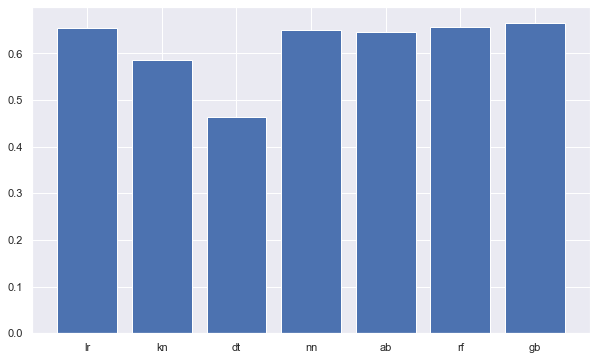

In [ ]:
models = [lr, kn, dt, nn, ab, rf, gb]
model_names = ['lr', 'kn', 'dt', 'nn', 'ab', 'rf', 'gb']
model_scores = []

for model in models:
    model_scores.append(f1_score(y_val_df, model.predict(X_val_eng[set3])))

plt.figure(figsize=(10,6))
plt.bar(x = model_names, height = model_scores)

In [ ]:
estimators = [('nn', nn),
              ('lr', lr),
              ('dt', dt),
              ('kn', kn),
              ('ab', ab),
              ('rf', rf),
              ('gb', gb)]

<BarContainer object of 8 artists>

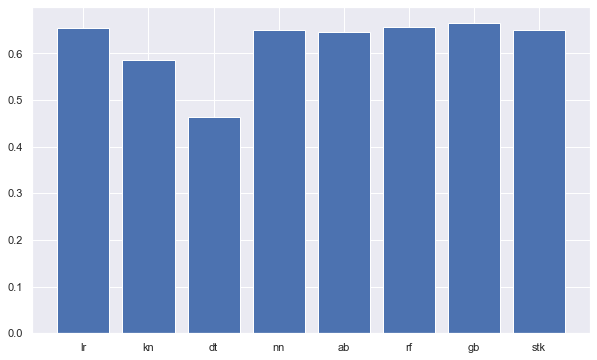

In [ ]:
stk = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression(random_state = 42)).fit(X_train_eng[set3], y_train_df)

models = [lr, kn, dt, nn, ab, rf, gb, stk]
model_names = ['lr', 'kn', 'dt', 'nn', 'ab', 'rf', 'gb', 'stk']
model_scores = []

for model in models:
    model_scores.append(f1_score(y_val_df, model.predict(X_val_eng[set3])))

plt.figure(figsize=(10,6))
plt.bar(x = model_names, height = model_scores)

Using large_set_new

In [ ]:
lr = LogisticRegression(C = 0.01, penalty = 'l2', solver = 'newton-cg', class_weight='balanced').fit(X_train_over[large_set_new], y_train_over)

kn = KNeighborsClassifier().fit(X_train_over[large_set_new], y_train_over)

dt = DecisionTreeClassifier(splitter = 'random', min_samples_split=450,class_weight={0:1,1:5.6}, criterion='gini',random_state=42).fit(X_train_over[large_set_new], y_train_over)

nn = MLPClassifier(random_state = 42, activation = 'logistic', alpha = 0.001, hidden_layer_sizes=(12,12,12), learning_rate='adaptive', max_iter = 500, solver = 'adam').fit(X_train_over[large_set_new], y_train_over)

ab = AdaBoostClassifier(base_estimator = RandomForestClassifier(class_weight='balanced_subsample', max_features=None,
                       min_samples_leaf=500, n_estimators=20), learning_rate = 0.1, n_estimators = 50).fit(X_train_over[large_set_new], y_train_over)

rf = RandomForestClassifier(n_estimators=20,class_weight='balanced_subsample',criterion="gini", max_features=None, min_samples_leaf=450,random_state=42).fit(X_train_over[large_set_new], y_train_over)

gb = GradientBoostingClassifier(random_state = 10).fit(X_train_over[large_set_new], y_train_over)

<BarContainer object of 7 artists>

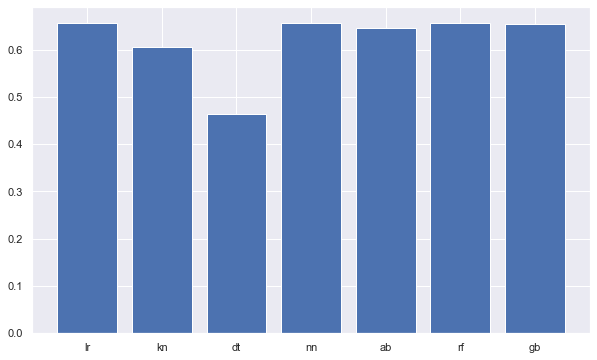

In [ ]:
models = [lr, kn, dt, nn, ab, rf, gb]
model_names = ['lr', 'kn', 'dt', 'nn', 'ab', 'rf', 'gb']
model_scores = []

for model in models:
    model_scores.append(f1_score(y_val_df, model.predict(X_val_eng[large_set_new])))

plt.figure(figsize=(10,6))
plt.bar(x = model_names, height = model_scores)

In [ ]:
estimators = [('nn', nn),
              ('lr', lr),
              ('dt', dt),
              ('kn', kn),
              ('ab', ab),
              ('rf', rf),
              ('gb', gb)]

<BarContainer object of 8 artists>

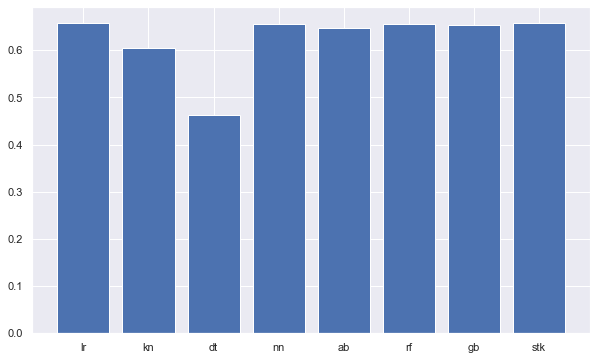

In [ ]:
stk = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression(random_state = 42)).fit(X_train_eng[large_set_new], y_train_df)

models = [lr, kn, dt, nn, ab, rf, gb, stk]
model_names = ['lr', 'kn', 'dt', 'nn', 'ab', 'rf', 'gb', 'stk']
model_scores = []

for model in models:
    model_scores.append(f1_score(y_val_df, model.predict(X_val_eng[large_set_new])))

plt.figure(figsize=(10,6))
plt.bar(x = model_names, height = model_scores)

In [ ]:
evaluate_model(stk, X_train_eng[large_set_new], y_train_df)

In [ ]:
labels_stk = stk.predict(X_test_eng[large_set_new])

labels_stk_df = pd.DataFrame(labels_stk)

kaggle_stk = pd.DataFrame(X_test_eng.index)

kaggle_stk = pd.concat([kaggle_stk["Access_ID"], labels_stk_df[0]],axis=1)
kaggle_stk["Buy"] = kaggle_stk[0]
kaggle_stk = kaggle_stk.drop(columns=[0])

kaggle_stk.set_index('Access_ID',inplace=True,drop=True)

kaggle_stk.value_counts()

kaggle_stk = kaggle_stk.astype(int)

file_name = 'kagGlestk.csv'
  
# saving the excel
kaggle_stk.to_csv(file_name)

In [ ]:
# all_models = [('lr', lr), ('kn', kn), ('dt', dt), ('nn', nn), ('ab', ab), ('rf', rf), ('gb', gb)]
# model_combos = list(itertools.combinations(all_models, 3))

In [ ]:
# for i in model_combos:
#     print(type(i))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [ ]:
# results = pd.DataFrame(['combo'], ['f1'], ['roc'])

# for i in model_combos:
#     stk = StackingClassifier(estimators = list(i), final_estimator = LogisticRegression(random_state = 10)).fit(X_train_eng[set1_no_bin], y_train)
#     f1_stk, roc_auc_stk = evaluate_model(stk)
#     results.append(pd.DataFrame([i], [f1_stk], [roc_auc_stk]))

ValueError: Unknown label type: 'unknown'

<hr>
<a class="anchor" id="Model_comparison">
    
# Model Comparison
    
</a>

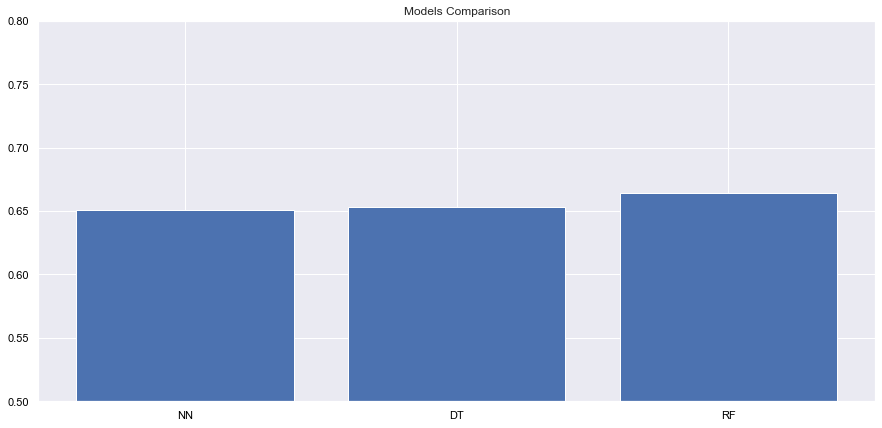

In [481]:
f1_values = [f1_DT,f1_RF, f1_SVM]#,f1_SVM]    
models = ["DT","RF", 'SVM']#,"SVM"
data_tuples = list(zip(models, f1_values))
model_compare = pd.DataFrame(data_tuples)
model_compare = model_compare.sort_values(1)
plt.figure(figsize=(15,7))
plt.bar(model_compare[0], model_compare[1])
plt.xticks(rotation=0)
plt.xticks(color='black')
plt.yticks(color='black')
plt.ylim(0.5, 0.8)
plt.title('Models Comparison')
plt.show()

In [223]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [227]:
 ###########NEW################
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from scipy import interp
 # Run classifier with cross-validation and plot ROC curves

def roc_table1(X_,y_,classifiers,feat,table):
    
    X_ = X_[feat].to_numpy()
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    aucs=[]
    tprs=[]
     
    mean_fpr=[]
     
    mean_tpr=[]

    y_=y_.to_numpy()
    y_=y_.astype('float')
    mean_auc=[]
   
     # #############################################################################
     # Classification and ROC analysis
     
     # Run classifier with cross-validation and plot ROC curves
    
    for classifier in classifiers:
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
        mean_tpr=[]
   
        # evaluate the model and collect the results
        for train,test in cv.split(X_,y_):
            
            prediction = classifier.fit(X_[train],y_[train]).predict_proba(X_[test])
            fpr, tpr, t = roc_curve(y_[test], prediction[:, 1])
            tprs.append(interp(mean_fpr, fpr, tpr))
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
            
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        table=table.append({'classifiers':classifier.__class__.__name__,
                                        'fpr':mean_fpr, 
                                        'tpr':mean_tpr, 
                                        'auc':mean_auc}, ignore_index=True)
    
        
    return table

In [228]:
result_table=roc_table1(X_train_eng, y_roc,[model_DT,model_DT],set1_no_bin,result_table)
result_table

Empty DataFrame
Columns: [classifiers, fpr, tpr, auc]
Index: []


,classifiers,fpr,tpr,auc
0,DecisionTreeClassifier,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0009523809523809524, 0.2088950254631821, 0....",0.89556
1,DecisionTreeClassifier,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0009523809523809524, 0.2088950254631821, 0....",0.89556


In [229]:
result_table.set_index('classifiers', inplace=True)

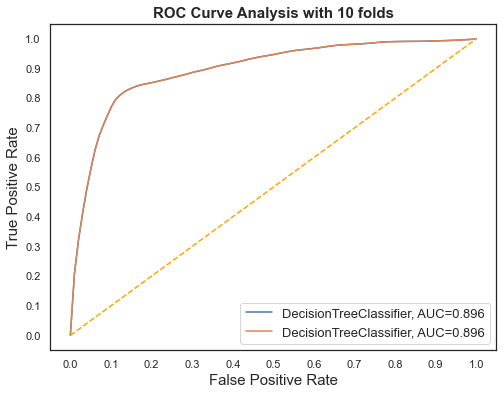

In [232]:
sns.set_theme(style="white")
fig = plt.figure(figsize=(8,6))

for i in range(0,2):
    plt.plot(result_table.iloc[i]['fpr'], 
             result_table.iloc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(result_table.index[i], result_table.iloc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis with 10 folds', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()